# Biologically Inspired Computation (F20BC/F21BC), Coursework I 

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import math
import time

np.random.seed(3) # seed is set so that the random values give similar values at each run.

## Getting a Glimpse of the Data

In [2]:
df = pd.read_csv("data.csv") # reading the data from the csv file

In [3]:
df.columns # to see the columns in the dataframe

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
df.head() # to see the first five rows/instances/samples

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [5]:
df.info() # to see detailed information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.duplicated().sum() # to check for duplicate rows

0

In [7]:
df.isna().sum() # to see the number of null values in each of the columns

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

#### From the above output, we can infer that there are no duplicates and null values in the data (except for the Unnamed column)

In [8]:
df['diagnosis'].value_counts() # to see the different values of the 'diagnosis' column

B    357
M    212
Name: diagnosis, dtype: int64

## Data Pre-processing

In [9]:
# droping the unnamed and id features in the same dataframe
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
X = df.drop('diagnosis', axis=1) # dropping the class/target attribute
y = df.diagnosis # y set is the diagnosis column (class/target attribute)

In [10]:
y = np.array(y.map(lambda x: 1 if x=='M' else 0)) # encoding all Ms to 1s and Bs to 0s
y = y.reshape(569,1) # to reshape y into a size compatible with the X set (number of rows=569, number of features=1)

In [11]:
# Splitting the X and y datasets into train and test sets for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
# normalizing the X training and testing sets with min-max where the minimum value of a feature is made a 0 and the maximum value is made a 1, all other value become floats betwween 0 and 1
X_train = (X_train - X_train.min())/(X_train.max() - X_train.min()) 
X_test = (X_test - X_test.min())/(X_test.max() - X_test.min())

### Dimensions of the final X and y training and testing datasets
The output of .shape gives the dimensions in the following order- (number of rows, number of columns)

In [13]:
X.shape

(569, 30)

In [14]:
y.shape

(569, 1)

In [15]:
X_train.shape

(426, 30)

In [16]:
X_test.shape

(143, 30)

In [17]:
y_train.shape

(426, 1)

In [18]:
y_test.shape

(143, 1)

## Building the Neural Network

### Initializing the values of the hyperparamters

In [19]:
n_inputs = X.shape[1] # the number of features
n_hidden_layers = 2 # default number of hidden layers
n_hidden = [] # list to contain the number of nodes in each hidden layer
activations = [] # list to contain the names of the activation functions selected for each layer
lr = 0.1 # learning rate 
decay_rate = 0 # decay rate of the learning rate
lr_decay = 'n' # if there should be a learning rate decay
loss = 'c' # default loss type as cross entropy loss
gradient_alg = 'b' # default gradient desecent algorithm as batch gradient descent
n_outputs = 1 # number of output nodes
dimensions = [] # to store the number of nodes in the input and all the layers

### Inputting the values of the hyperparamters

In [20]:
while True: # to loop until a valid number is given
    print("Please enter the number of input nodes/features (default = ",X.shape[1],")")
    n_inputs = int(input())
    if n_inputs <= X_train.shape[1]:
        break
    else:
        print("Try a smaller number less than or equal to " + X_train.shape[1])

# Taking the number of input features as requested
X_train = X_train.iloc[:,:n_inputs]
X_test = X_test.iloc[:,:n_inputs]

print("Please enter the number of hidden layers")
n_hidden_layers = int(input())

for i in range(n_hidden_layers):
    print("For layer " + str(i + 1) + ":")
    print(
        "Please enter the number of hidden neurons in this layer (same as the size of this hidden layer) "
    )
    n_hidden.append(int(input()))

for i in range(n_hidden_layers + 1):
    print("For layer " + str(i + 1) + ":")
    valid1 = False
    while (valid1 == False): # to loop until a valid function is given
        print(
            "Please choose an activation function (type one of- sigmoid/relu/tanh/softmax)"
        )
        inp_a = input()
        if (inp_a == "sigmoid" or inp_a == "relu" or inp_a == "tanh"):
            valid1 = True
            activations.append(inp_a)
            
        elif (inp_a == "softmax"):
            valid1 = True
            activations.append(inp_a)
            n_outputs = 2

        else:
            print("Try Again")

print("Please enter the number of epochs(1-20000)")
epochs = int(input())

while True: # to loop until a valid number is given
    print("Please enter a learning rate <= 1")
    lr = float(input())
    if lr <= 1:
        break

print("Should the learning rate decay with each layer? (type y/n)")
lr_decay = input()

valid2 = False
while (valid2 == False): # to loop until a valid function is given
    print(
        "Please choose a loss function (cross entropy loss (type c)/ hinge loss (type h)/ squared hinge loss(type s))"
    )
    loss = input()

    if (loss == "c" or loss == "h" or loss == "s"):
        valid2 = True

    else:
        print("Try Again")

valid3 = False
while (valid3 == False): # to loop until a valid algorithm is given
    print(
        "Please choose a gradient descent algorithm (batch gradient descent (type b)/ stochastic gradient descent (type s)/ and mini-batch gradient descent (type m))"
    )
    gradient_alg = input()

    # for mini batch gradient descent
    if (gradient_alg == "m"):
        valid3 = True
        print("Please enter the number of batches")
        batch_size = int(input())
    
    # for batch gradient descent
    elif (gradient_alg == "b"): # batch size of a mini batch would be the same as the number of data samples/rows
        valid3 = True
        batch_size = X.shape[0] #X_train

    # for stochatic gradient descent
    elif (gradient_alg == "s"): # batch size of a mini batch would be the 1 as costs are cmomputed for each of the samples
        valid3 = True
        batch_size = 1
        
    else:
        print("Try Again")
        

Please enter the number of input nodes/features (default =  30 )
30
Please enter the number of hidden layers
3
For layer 1:
Please enter the number of hidden neurons in this layer (same as the size of this hidden layer) 
20
For layer 2:
Please enter the number of hidden neurons in this layer (same as the size of this hidden layer) 
21
For layer 3:
Please enter the number of hidden neurons in this layer (same as the size of this hidden layer) 
25
For layer 1:
Please choose an activation function (type one of- sigmoid/relu/tanh/softmax)
relu
For layer 2:
Please choose an activation function (type one of- sigmoid/relu/tanh/softmax)
relu
For layer 3:
Please choose an activation function (type one of- sigmoid/relu/tanh/softmax)
relu
For layer 4:
Please choose an activation function (type one of- sigmoid/relu/tanh/softmax)
sigmoid
Please enter the number of epochs(1-20000)
150
Please enter a learning rate <= 1
0.01
Should the learning rate decay with each layer? (type y/n)
n
Please choose a 

In [21]:
# to append the number of input festures into the dimensions list
dimensions.append(n_inputs)
# to add the number of nodes in each of the hidden layers from n_hidden into the dimensions list
dimensions.extend(n_hidden)
# to append the number of output nodes into the dimensions list
dimensions.append(n_outputs)

# to convert all elements in dimensions to numpy ints
dimensions = np.array(dimensions, dtype=np.int64)

### Intializing Parameters

In [22]:
def initialize_parameters(dimensions):
    
    """
    To initialize all the weights and biases
    
        Parameters:
            dimensions - list with the input features and number of nodes in all the layers of the network

        Returns:
            parameters - dictionary with the values of the weights and biases where 'W' is the prefix for weights and 'b' for the bias
    """
    
    parameters = {}
    for i in range (len(dimensions)-1):
        parameters["W"+str(i+1)] = np.random.randn(dimensions[i+1],dimensions[i]) / np.sqrt(dimensions[i]) # giving random values with the specified dimensions
        parameters["b"+str(i+1)] = np.zeros((dimensions[i+1],1)) # setting the bias to zero vector with the specified dimensions
    
    return parameters

### Forward Propagation

In [23]:
# Sigmoid function
def sigmoid(Z):
    """
    To compute the value of the activation or the output of the layer with sigmoid activation function.
    
        Parameters:
            Z - linear activation value- 

        Returns:
            
            A - node output
    """
    A = 1 / (1 + np.exp(-Z))
    return A

# ReLU (rectified linear unit)
def relu(Z):
    """
    To compute the value of the activation or the output of the layer with ReLU activation function.
    
        Parameters:
            Z - linear activation value- 

        Returns:
            
            A - node output
    """
    A = np.maximum(0, Z)
    return A

# Hyperbolic tangent
def tanh(Z):
    """
    To compute the value of the activation or the output of the layer with the tanh function.
    
        Parameters:
            Z - linear activation value- 

        Returns:
            
            A - node output
    """
    A = np.tanh(Z)
    return A

# Softmax function
def softmax(Z):
    """
    To compute the value of the activation or the output of the layer with softmax funxtion.
    
        Parameters:
            Z - linear activation value- 

        Returns:
            
            A - node output
    """
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

In [24]:
def z_comput(W, b, prev_A):
    
    """
    To compute the value of the linear activation
    
        Parameters:
            W - weight matrix of the layer
            b - bias matrix of the layer
            prev_A - previous activation values from the previous layer

        Returns:
            Z - linear activation value
            cache - tuple with the previous activations, weight matrix, and bias matrix
    """
    
    Z = np.dot(W,prev_A)+b # calculating the value of the linear activation
    lcache = (prev_A, W, b) # storing the values involved in this calculation in a tuple- linear cache

    return Z, lcache

In [25]:
def forward_prop(W, b, prev_A, activation):
    
    """
    To compute the value of the activation/ layer output
    
        Parameters:
            W - weight matrix of the layer
            b - bias matrix of the layer
            prev_A - previous activation values from the previous layer
            activation - activation function for the given layer

        Returns:
            A - node output
            cache - tuple with the previous activations, weight matrix, bias matrix, and linear activation (Z)
    """
    
    A = np.zeros((W.shape[0], prev_A.shape[1])) # initializing A
    cache = ()

    # computing the value of the output based on the activation function     
    if activation == "relu":
        Z, lcache = z_comput(W, b, prev_A) # obtaining the value of Z and weight, bias, previous activations
        A = relu(Z)
        zcache = Z
        cache = (lcache, zcache) # combined caches with previous activations, weights, bias, Z- linear activation value

    elif activation == 'sigmoid':
        Z, lcache = z_comput(W, b, prev_A)
        A = sigmoid(Z)
        zcache = Z
        cache = (lcache, zcache)

    elif activation == 'tanh':
        Z, lcache = z_comput(W, b, prev_A)
        A = tanh(Z)
        zcache = Z
        cache = (lcache, zcache)

    elif activation == 'softmax':
        Z, lcache = z_comput(W, b, prev_A)
        A = softmax(Z)
        zcache = Z
        cache = (lcache, zcache) 

    return A, cache

In [26]:
def forward_prop_layers(X, parameters, activations):
    """
    To compute the value of the activation for all the layers
    
        Parameters:
            X - X dataset without class attribute
            parameters - weight matrix and bias matrix of all the layers
            activations - names of the activation functions of all the layers

        Returns:
            A - activation value of all layers- of the forward pass
            cache - tuple with the previous activations, weight matrices, bias matrices and linear activations (Z)
    """
    A = X # the previous activation matrix is initialized with the X matrix for the calculation of the next activation value
    caches = []
    l = len(parameters)//2 # number of layers is half the size of the parameters dictionary (= number of weight/bias matrices)
    for i in range (l): # computing the activations for all layers and compiling all the caches
        prev_A = A # represents the previous activation value computed
        A, cache = forward_prop(parameters["W"+str(i+1)],parameters["b"+str(i+1)], prev_A, activations[i])
        caches.append(cache)
        
    return A, caches

### Computing the cost/loss

In [27]:
def compute_cost(A, Y, loss):
    """
    To compute the cost/loss
    
        Parameters:
            Y - actual values of the target class attribute
            A - activation values or predicted values
            loss- loss function to use

        Returns:
            cost1 - cost calculated using the specified loss function
    """
    n = Y.shape[1] # number of samples
    if loss == "c": # for cross entropy loss
        cost = (1./n) * (-np.dot(Y,np.log(A+1e-15).T) - np.dot(1-Y, np.log(1-A+1e-15).T))
    elif loss == "h": # for hinge loss
        cost = np.mean(np.maximum(0, 1 - Y * A))
    elif loss == "s": # for squared hinge loss
        cost = np.mean(np.maximum(0, 1 - Y * A))**2

    cost1 = np.squeeze(cost) # removing one-dimensional elements or extracting the cost value from the numpy array
    return cost1

### Backward Propagation

In [28]:
def derivative_compute(dZ, lcache):
    """
    To compute the derivatives/gradients of the weights, biases, and activation value
    
        Parameters:
            dZ - gradient of cost with respect to Z (linear activation)
            lcache - linear cache with the values of weights, biases and activations

        Returns:
            dprev_A - previous activation value
            dW - derivative of the weights of that layer
            db - derivate of the weights of that layer
    """
    
    prev_A, W, b = lcache # extracting each of the values in the lcache
    n = prev_A.shape[1] # number of samples
    
    # averaging the values over the nodes of the layers
    dW = 1./n * np.dot(dZ, prev_A.T)
    db = 1./n * np.sum(dZ, axis = 1, keepdims = True)
    
    dprev_A = np.dot(W.T, dZ)
    
    return dprev_A, dW, db

In [29]:
def backward_prop(dA, activation, cache):
    """
    To compute the value of derivatives for a layer
    
        Parameters:
            dA - derivative of the activation value
            activation- activation function to use
            cache - weights, biases, alinear activations and layer outputs

        Returns:
            dprev_A - previous activation value
            dW - derivative of the weights of that layer
            db - derivate of the weights of that layer
    """
    
    lcache, zcache = cache
    Z = zcache # the value of Z from zcache
    
    if activation == "relu":
        dZ = np.array(dA, copy=True) # dz is made into a numpy array for computations
        dZ[Z <= 0] = 0 # dz is set to 0 if Z is greater than or equal to 0 
        dprev_A, dW, db = derivative_compute(dZ, lcache) # to get the derivatives using the derivative_compute function
        
    elif activation == "sigmoid":
        s = 1/(1+np.exp(-Z))
        dZ = dA * s * (1-s)
        dprev_A, dW, db = derivative_compute(dZ, lcache)
        
    elif activation == "tanh":
        dZ = np.multiply(dA,
                         (1- ((np.tanh(Z))*(np.tanh(Z)))))
        dprev_A, dW, db = derivative_compute(dZ, lcache)
        
    elif activation == "softmax":
        dZ = np.multiply(dA, np.exp(Z) / sum(np.exp(Z)) * (1. - np.exp(Z) / sum(np.exp(Z))))
        dprev_A, dW, db = derivative_compute(dZ, lcache)

    return dprev_A, dW, db


In [30]:
def backward_prop_layers(last_A, Y, caches, activations):
    """
    To compute the value of derivatives for a layer
    
        Parameters:
            dA - gradient of the activation value
            activation- activation function to use
            cache - weights, biases, alinear activations and layer outputs

        Returns:
            cost1 - cost calculated using the specified loss function
    """

    gradient_dict = {} # dictionary to store the gradients
    l = len(caches) # number of layers = length of the caches
    
    Y = Y.reshape(last_A.shape) # reshping or chanding the dimensions of Y for compatibility for computations
    
    current_cache = caches[l - 1] # the last cache is chosen first to proceed backwards from the alast layer
    
    # calculating the first activation gradient
    gradient_dict["dA" + str(l)] = -(np.divide(Y, last_A+1e-15) -
                                     np.divide(1 - Y, 1 - last_A+1e-15))
    
    # the first set of gradients for Aactivations, weights and biases are calculated with the computed derivative of A
    gradient_dict["dA" + str(l - 1)], gradient_dict[
        "dW" + str(l)], gradient_dict["db" + str(l)] = backward_prop(
            gradient_dict["dA" + str(l)], activations[l - 1], current_cache)

    # calculating the gradients of weights, biases and activation values for all layers, starting from the second last layer in this loop
    for i in reversed(range(l - 1)):
        current_cache = caches[i]
        dprev_A, dW, db = backward_prop(gradient_dict["dA" + str(i + 1)],
                                        activations[i], current_cache)
        gradient_dict["dA" + str(i)] = dprev_A
        gradient_dict["dW" + str(i + 1)] = dW
        gradient_dict["db" + str(i + 1)] = db

    return gradient_dict

### Updating Parameters

In [31]:
def update_parameters(parameters, grad_dict, lr):
    """
    To update the parameters (weights and biases)
    
        Parameters:
            parameters - dictionary with weights and biases to update
            grad_dict - dictionary with gradients of weights, biases and activations
            lr- learning rate

        Returns:
            parameters - updated parameters dictionary
    """
    
    l = len(parameters) // 2 # number of layers in the model/network
    
    # for al layers, parameter = original parameter value - learning rate * gradient of the parameter calculation is done
    for i in range(l): 
        parameters["W" + str(i+1)] = parameters["W" + str(i+1)] - lr * grad_dict["dW"+str(i+1)]        
        parameters["b" + str(i+1)] = parameters["b" + str(i+1)] - lr * grad_dict["db"+str(i+1)]

    return parameters

### Generating Mini Batches

In [32]:
def random_mini_batches(X, y, batch_size):
    """
    To create mini batches randomly
    
        Parameters:
        X - input data without the target attribute
        y - target attribute with actual values
        batch_size - size of the mini-batches

        Returns:
        mini_batches - batches of the X and y sets
    """
    

    n = X.shape[1] # number of data samples
    mini_batches = []
    
    # shuffling the data to avoid having the same data together each time
    shuffle = list(np.random.permutation(n))
    X_shuffle = X.iloc[:, shuffle]
    y_shuffle = y[:, shuffle].reshape((1,n))

    num_complete_minibatches = n//batch_size # number of batches to make from the batch size
    
    # loop for making the batches as many as the number of batches calculated
    for i in range(num_complete_minibatches):
        
        mini_batch_X = X_shuffle.iloc[:,i*batch_size:(i+1)*batch_size]
        mini_batch_y = y_shuffle[:,i*batch_size:(i+1)*batch_size]
     
        mini_batch = (mini_batch_X, mini_batch_y)
        mini_batches.append(mini_batch)
    
    # when the number of data samples is lesser than the batch size considered, the last batch will have a size lesser than the batch size considered
    if n % batch_size != 0:
        
        mini_batch_X = X_shuffle.iloc[:,num_complete_minibatches*batch_size:n]
        mini_batch_y = y_shuffle[:,num_complete_minibatches*batch_size:n]
        
        mini_batch = (mini_batch_X, mini_batch_y)
        mini_batches.append(mini_batch)
    
    return mini_batches

### The Model

In [33]:
def ann(X, y, dimensions, lr, lr_decay, batch_size, epochs, loss, activations, gradient_alg):
    """
    Represents the artificial neural network with all components compiled together
    
        Parameters:
            X - input data without the class attribute
            y - actual values of the class attribute
            lr - learning rate
            lr_decay - whether to have a learning rate decay/schedule or not
            batch_size - size of the batches of data to consider
            epochs - number of iterations the computations are to be done for
            loss - loss function to use for the error calculation
            activations - list of the activation functions to use for each layer
            gradient_alg - gradient descent algorithm to use

        Returns:
            parameters1 - list of parameters, dimensions, activations, costs, lr, and batch_size
    """
    start = time.time()
    
    n = X.shape[1] # number of samples
    costs = [] # list of costs in each epoch
    
    # for learning rate decay
    alpha_zero = 0.2 
    bool_decay = False # there is no decay enabled by default 
    if(lr_decay == 'y'):
        bool_decay = True
        lr_decay_rate =  0.01 # decay rate
    
    parameters = initialize_parameters(dimensions) # initial values for the weights and biases
    
    if (gradient_alg == "b"): # the batch size is set as the number of samples, for batch gradient descent
        batch_size = X.shape[1]
    
    for i in range(epochs):
        
        # forming mini batches with the given batch size
        minibatches = random_mini_batches(X, y, batch_size)
        cost_total = 0
        
        # iterating over all the minibatches
        for minibatch in minibatches:
            
            (minibatch_X,minibatch_Y) = minibatch # to get the minibatch
            
            # forward propgation/pass is done and it outputs the activations and caches
            last_A, caches = forward_prop_layers(minibatch_X, parameters, activations) 
            
            # error calculation using the loss function
            cost_total += compute_cost(last_A, minibatch_Y, loss) 
            
            # backward propogation/pass outputs the gradients
            gradients = backward_prop_layers(last_A, minibatch_Y, caches, activations)
            
            # weights and biases are updated using the learning rate and gradients from backward pass
            parameters = update_parameters(parameters, gradients, lr)
            
            #If user has configured 'y' for learning decay, a learning rate schedule is implemeted
            if(bool_decay):
                lr = math.pow(0.5, math.floor((1+i)/10.0))  #Step decay 
                  
            else:
                bool_decay = False
                lr = lr

        # updating the cost by taking its total mean from the costs calculated in the different batches wherever applicable
        if gradient_alg == 'b':
            cost_avg = cost_total
        else: 
            cost_avg = cost_total / n 
            
        # printing the cost for every 10 epochs
        if i %10 == 0:
            print ("Cost/error after epoch %i: %f" %(i, cost_avg))
        costs.append(cost_avg)
          
    end = time.time()
    total_time = end-start # to calculate the total time taken for training the model
    
    print ("Cost/error after all epochs: ",(cost_avg))

    plt.plot(costs)
    plt.ylabel('Computed cost')
    plt.xlabel('Number of epochs')
    plt.title("Learning rate = " + str(lr))
    plt.show()

    # all values to return for later use in visualizations and predictions
    parameters1 = [parameters, dimensions, activations, costs, lr, batch_size, total_time]
    
    return parameters1

### Inference Function

In [34]:
def predict(X, y, parameters, activations):
    """
    To predict the labels after running the forward pass
    
        Arguments:
        X - input data without the class attribute
        y - actual values of the class attribute
        parameters - parameters (weights and biases) of the model after training
        activations - list of the activation functions to use for each layer

        Returns:
        pred -- predictions for the given input data- X
    """
    
    n = X.shape[1] # number of samples
    pred = np.zeros((1,n)) # initializing the predictions
    
    # Forward propagation with the given values
    A, caches = forward_prop_layers(X,parameters,activations)
    
    # for every prediction greater than 0.39, make it a 1 else a 0
    for i in range(0, A.shape[1]):
        if A[0,i] >= 0.39:
            pred[0,i] = 1
        else:
            pred[0,i] = 0
    
    # accuracy is computed by dividing the sum of the number of correct predictions by the total number of samples
    accuracy = np.sum((pred == y)/n)
    
    print("Accuracy: "  + str(accuracy))
        
    return pred, accuracy
    

### Training and Testing with inputted Parameters

Cost/error after epoch 0: 0.615805
Cost/error after epoch 10: 0.095426
Cost/error after epoch 20: 0.063483
Cost/error after epoch 30: 0.060529
Cost/error after epoch 40: 0.063683
Cost/error after epoch 50: 0.044880
Cost/error after epoch 60: 0.040501
Cost/error after epoch 70: 0.045125
Cost/error after epoch 80: 0.044831
Cost/error after epoch 90: 0.028533
Cost/error after epoch 100: 0.036301
Cost/error after epoch 110: 0.032295
Cost/error after epoch 120: 0.015765
Cost/error after epoch 130: 0.025398
Cost/error after epoch 140: 0.024522
Cost/error after all epochs:  0.023843193077636392


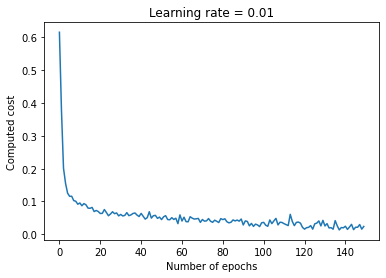

Training Accuracy
Accuracy: 0.9953051643192485
Testing Accuracy
Accuracy: 0.9020979020979021


In [35]:
parameters = ann(X_train.T, y_train.T, dimensions, lr, lr_decay, batch_size, epochs, loss, activations, gradient_alg)
params = parameters[0]
activations1 = parameters[2]

# Accuracy is displayed in the range of 0-1 where 1 is 100%.
print('Training Accuracy')
pred_train, acc = predict(X_train.T, y_train.T, params, activations1)
print('Testing Accuracy')
pred_test, acc = predict(X_test.T, y_test.T, params, activations1)

### Testing the model

Cost/error after epoch 0: 0.695819
Cost/error after epoch 10: 0.686677
Cost/error after epoch 20: 0.680529
Cost/error after epoch 30: 0.675492
Cost/error after epoch 40: 0.671100
Cost/error after epoch 50: 0.667034
Cost/error after epoch 60: 0.663144
Cost/error after epoch 70: 0.659281
Cost/error after epoch 80: 0.655144
Cost/error after epoch 90: 0.650655
Cost/error after epoch 100: 0.645897
Cost/error after epoch 110: 0.640787
Cost/error after epoch 120: 0.634929
Cost/error after epoch 130: 0.628568
Cost/error after epoch 140: 0.621530
Cost/error after epoch 150: 0.613660
Cost/error after epoch 160: 0.605127
Cost/error after epoch 170: 0.595672
Cost/error after epoch 180: 0.585582
Cost/error after epoch 190: 0.574679
Cost/error after epoch 200: 0.562933
Cost/error after epoch 210: 0.550301
Cost/error after epoch 220: 0.536771
Cost/error after epoch 230: 0.522500
Cost/error after epoch 240: 0.507615
Cost/error after epoch 250: 0.492150
Cost/error after epoch 260: 0.476172
Cost/error a

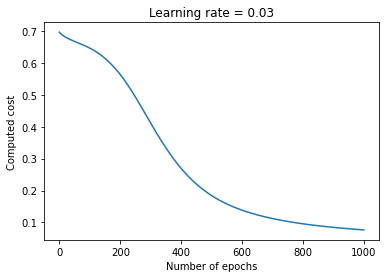

Accuracy: 0.93006993006993


80 10 0 53


In [41]:
# Some of the tested combinations:- traning function call has been followed tby the classification accuracy percentage

# parameters = ann(X_train.T, y_train.T, [30,8,8,8,1], 0.01, "n", 426, 800, "c", ["relu","relu","relu","sigmoid"], "b") #90.9%
# parameters = ann(X_train.T, y_train.T, [30,8,8,8,1], 0.01, "n", 426, 800, "h", ["relu","relu","relu","sigmoid"], "b") #88.9%
# parameters = ann(X_train.T, y_train.T, [30,21,25,59,1], 0.01, "n", 426, 1000, "c", ["relu","relu","relu","sigmoid"], "b") #92.3%
# parameters = ann(X_train.T, y_train.T, [30,20,25,21,59,1], 0.01, "n", 426, 1500, "c", ["relu","relu","relu","relu","sigmoid"], "b") #94.4%
# parameters = ann(X_train.T, y_train.T, [30,20,20,20,20,1], 0.00095, "y", 16, 1000, "c", ["relu","relu","relu","relu","sigmoid"], "m")  #94%
# parameters = ann(X_train.T, y_train.T, [30,20,21,20,25,1], 0.00095, "n", 16, 1500, "c", ["relu","relu","relu","relu","sigmoid"], "m") #92%
# parameters = ann(X_train.T, y_train.T, [30,20,20,20,1], 0.00095, "y", 16, 1500, "c", ["relu","relu","relu","relu","sigmoid"], "m")  #94.4%
# parameters = ann(X_train.T, y_train.T, [30,25,25,21,20,1], 0.01, "n", 1, 150, "c", ["relu","relu","relu","relu","sigmoid"], "s") #87.4%
# parameters = ann(X_train.T, y_train.T, [30,10,20,25,1], 0.01, "n", 1, 200, "c", ["relu","relu","relu","sigmoid"], "s") # 88%
# parameters = ann(X_train.T, y_train.T, [30,10,20,25,1], 0.01, "n", 426, 4500, "c", ["relu","relu","relu","sigmoid"], "b") #93%
# parameters = ann(X_train.T, y_train.T, [30,200,200,200,200,1], 0.00095, "y", 16, 800, "h", ["relu","relu","relu","relu","sigmoid"], "m") #93%
# parameters = ann(X_train.T, y_train.T, [30,21,25,30,1], 0.01, "n", 426, 1000, "c", ["relu","relu","relu","sigmoid"], "b") #90%
# parameters = ann(X_train.T, y_train.T, [30,21,25,30,1], 0.01, "y", 426, 500, "c", ["relu","relu","relu","sigmoid"], "s") #92.3%
# parameters = ann(X_train.T, y_train.T, [30,10,20,25,1], 0.01, "n", 426, 4500, "c", ["relu","relu","relu","sigmoid"], "b") # 92%
# parameters = ann(X_train.T, y_train.T, [30,20,21,25,1], 0.01, "n", 426, 150, "c", ["relu","relu","relu","sigmoid"], "s")# 90.2%

parameters = ann(X_train.T, y_train.T, [30,10,8,8,1], 0.03, "n", 426, 1000, "c", ["relu","tanh","relu","sigmoid"], "b")
params = parameters[0]
activations1 = parameters[2]
pred, acc = predict(X_test.T, y_test.T, params, activations1)

print("\n")

# Confusion matrix where tn-true negative, fp- false positive, fn- false negative, tp- true positive
tn, fp, fn, tp = confusion_matrix(y_test.reshape(1,y_test.shape[0])[0],pred[0]).ravel()
print(tn,fp,fn,tp)

# Visualizations

Cost/error after epoch 0: 0.689166
Cost/error after epoch 10: 0.658916
Cost/error after epoch 20: 0.634099
Cost/error after epoch 30: 0.598617
Cost/error after epoch 40: 0.563439
Cost/error after all epochs:  0.5315683946586187


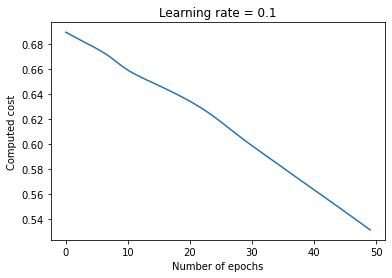

Accuracy
Accuracy: 0.972027972027972
Cost/error after epoch 0: 0.695150
Cost/error after epoch 10: 0.693746
Cost/error after epoch 20: 0.692439
Cost/error after epoch 30: 0.691200
Cost/error after epoch 40: 0.690030
Cost/error after all epochs:  0.6890216139213111


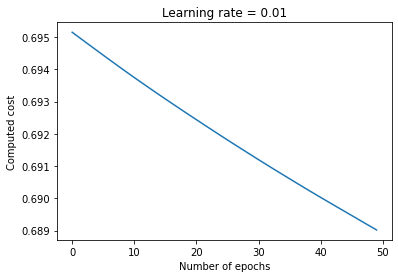

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.667796
Cost/error after epoch 10: 0.655272
Cost/error after epoch 20: 0.644447
Cost/error after epoch 30: 0.634409
Cost/error after epoch 40: 0.624591
Cost/error after all epochs:  0.6158153430792159


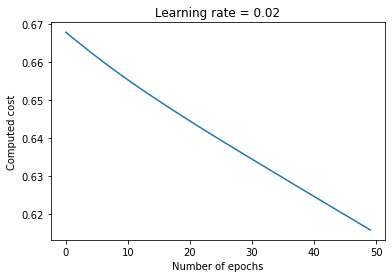

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.682561
Cost/error after epoch 10: 0.666496
Cost/error after epoch 20: 0.654542
Cost/error after epoch 30: 0.642414
Cost/error after epoch 40: 0.627139
Cost/error after all epochs:  0.6130019023389705


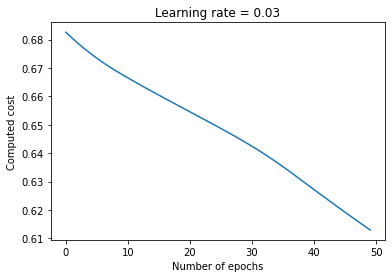

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.689332
Cost/error after epoch 10: 0.671557
Cost/error after epoch 20: 0.657311
Cost/error after epoch 30: 0.644060
Cost/error after epoch 40: 0.630289
Cost/error after all epochs:  0.6165743444958446


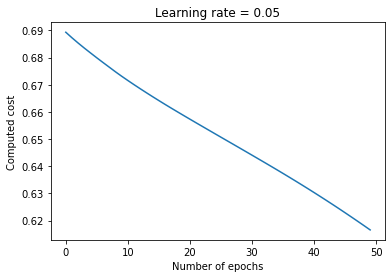

Accuracy
Accuracy: 0.8041958041958042
Cost/error after epoch 0: 0.691872
Cost/error after epoch 10: 0.670998
Cost/error after epoch 20: 0.651439
Cost/error after epoch 30: 0.632386
Cost/error after epoch 40: 0.612245
Cost/error after all epochs:  0.5924992267691503


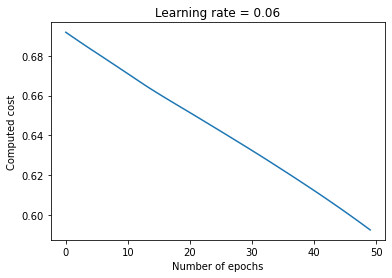

Accuracy
Accuracy: 0.7342657342657343
Cost/error after epoch 0: 0.695669
Cost/error after epoch 10: 0.658408
Cost/error after epoch 20: 0.638274
Cost/error after epoch 30: 0.615403
Cost/error after epoch 40: 0.585642
Cost/error after all epochs:  0.5511508265591096


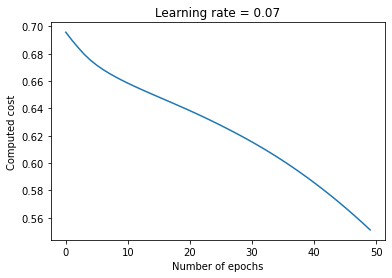

Accuracy
Accuracy: 0.7342657342657343
Cost/error after epoch 0: 0.704355
Cost/error after epoch 10: 0.656504
Cost/error after epoch 20: 0.618250
Cost/error after epoch 30: 0.585911
Cost/error after epoch 40: 0.549497
Cost/error after all epochs:  0.5117717269911395


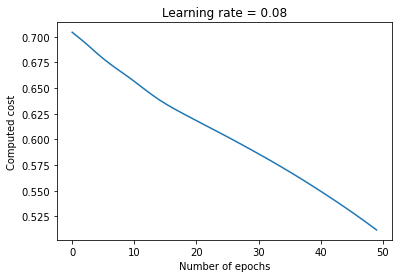

Accuracy
Accuracy: 0.8181818181818181
Cost/error after epoch 0: 0.687651
Cost/error after epoch 10: 0.657609
Cost/error after epoch 20: 0.626528
Cost/error after epoch 30: 0.589638
Cost/error after epoch 40: 0.543422
Cost/error after all epochs:  0.49371372223679205


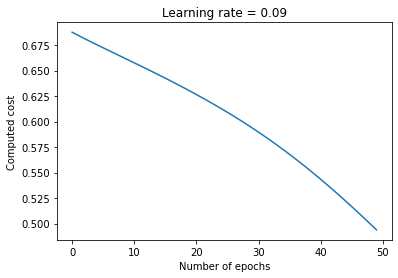

Accuracy
Accuracy: 0.8251748251748251
Cost/error after epoch 0: 0.721930
Cost/error after epoch 10: 0.720034
Cost/error after epoch 20: 0.718193
Cost/error after epoch 30: 0.716401
Cost/error after epoch 40: 0.714655
Cost/error after all epochs:  0.7131197665882387


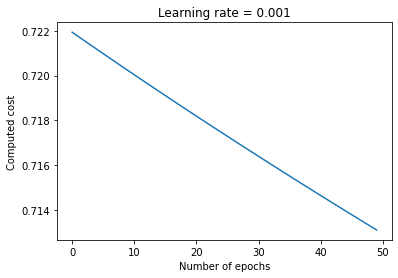

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.693407
Cost/error after epoch 10: 0.692858
Cost/error after epoch 20: 0.692313
Cost/error after epoch 30: 0.691765
Cost/error after epoch 40: 0.691218
Cost/error after all epochs:  0.6907266053615027


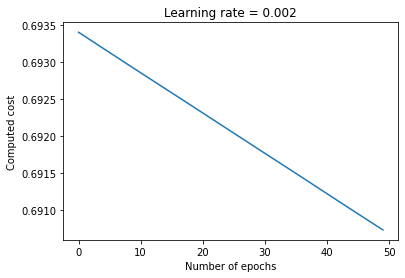

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.692677
Cost/error after epoch 10: 0.691995
Cost/error after epoch 20: 0.691327
Cost/error after epoch 30: 0.690675
Cost/error after epoch 40: 0.690024
Cost/error after all epochs:  0.6894469542709936


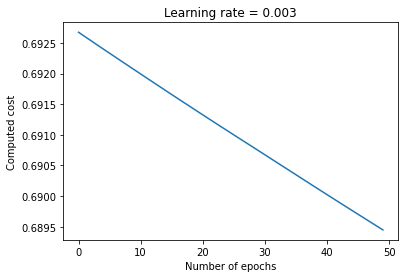

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.687960
Cost/error after epoch 10: 0.686012
Cost/error after epoch 20: 0.684097
Cost/error after epoch 30: 0.682227
Cost/error after epoch 40: 0.680419
Cost/error after all epochs:  0.6788115990502159


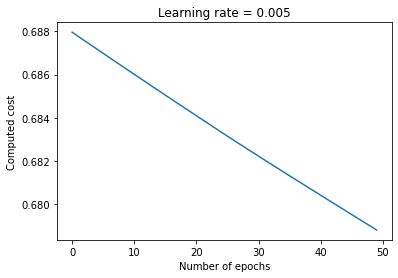

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.700022
Cost/error after epoch 10: 0.697229
Cost/error after epoch 20: 0.694716
Cost/error after epoch 30: 0.692455
Cost/error after epoch 40: 0.690491
Cost/error after all epochs:  0.6888522586111829


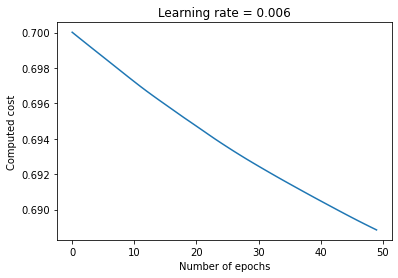

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.693843
Cost/error after epoch 10: 0.692459
Cost/error after epoch 20: 0.691161
Cost/error after epoch 30: 0.689942
Cost/error after epoch 40: 0.688784
Cost/error after all epochs:  0.6877926921748257


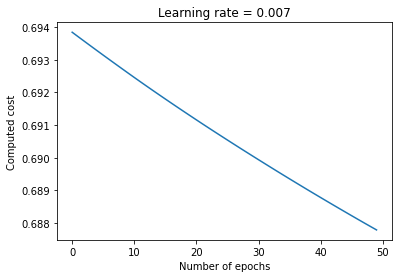

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.693164
Cost/error after epoch 10: 0.690050
Cost/error after epoch 20: 0.687122
Cost/error after epoch 30: 0.684346
Cost/error after epoch 40: 0.681666
Cost/error after all epochs:  0.6793691568703515


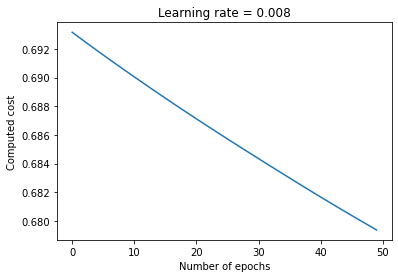

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.706612
Cost/error after epoch 10: 0.703383
Cost/error after epoch 20: 0.700264
Cost/error after epoch 30: 0.697275
Cost/error after epoch 40: 0.694409
Cost/error after all epochs:  0.6918856495529752


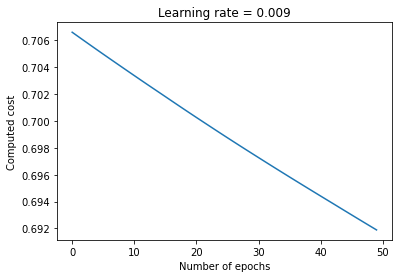

Accuracy
Accuracy: 0.30069930069930073
Cost/error after epoch 0: 0.685816
Cost/error after epoch 10: 0.621932
Cost/error after epoch 20: 0.545374
Cost/error after epoch 30: 0.465023
Cost/error after epoch 40: 0.384847
Cost/error after epoch 50: 0.315304
Cost/error after all epochs:  0.2669708371214195


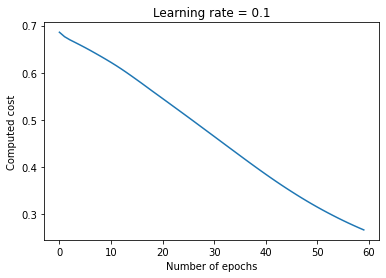

Accuracy
Accuracy: 0.881118881118881
Cost/error after epoch 0: 0.694486
Cost/error after epoch 10: 0.686960
Cost/error after epoch 20: 0.681625
Cost/error after epoch 30: 0.677337
Cost/error after epoch 40: 0.673647
Cost/error after epoch 50: 0.670296
Cost/error after all epochs:  0.667484562439121


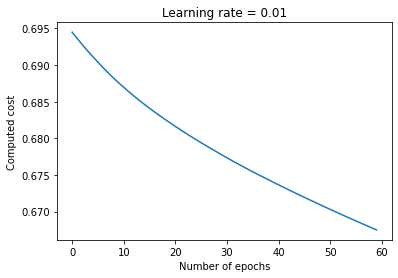

Accuracy
Accuracy: 0.3706293706293706
Cost/error after epoch 0: 0.693263
Cost/error after epoch 10: 0.683285
Cost/error after epoch 20: 0.675486
Cost/error after epoch 30: 0.669510
Cost/error after epoch 40: 0.664404
Cost/error after epoch 50: 0.659748
Cost/error after all epochs:  0.6558827814047474


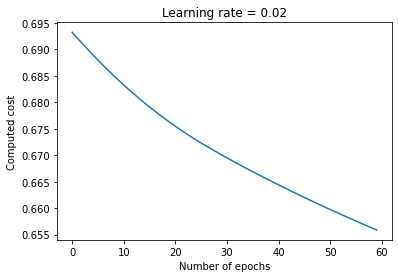

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.691738
Cost/error after epoch 10: 0.676022
Cost/error after epoch 20: 0.663279
Cost/error after epoch 30: 0.652145
Cost/error after epoch 40: 0.641474
Cost/error after epoch 50: 0.630641
Cost/error after all epochs:  0.6205382730150892


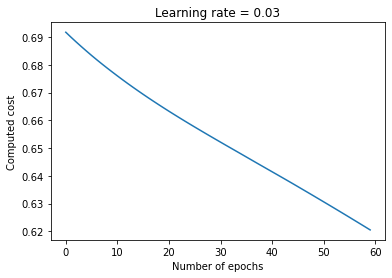

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.690304
Cost/error after epoch 10: 0.680823
Cost/error after epoch 20: 0.673369
Cost/error after epoch 30: 0.667213
Cost/error after epoch 40: 0.661685
Cost/error after epoch 50: 0.656368
Cost/error after all epochs:  0.6515365133241027


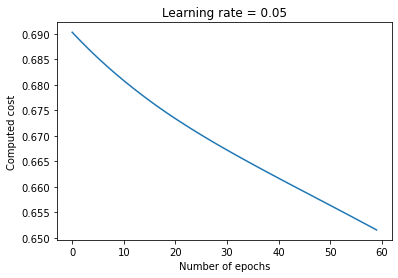

Accuracy
Accuracy: 0.4125874125874126
Cost/error after epoch 0: 0.682925
Cost/error after epoch 10: 0.621155
Cost/error after epoch 20: 0.554794
Cost/error after epoch 30: 0.488986
Cost/error after epoch 40: 0.426959
Cost/error after epoch 50: 0.370643
Cost/error after all epochs:  0.32692008060099925


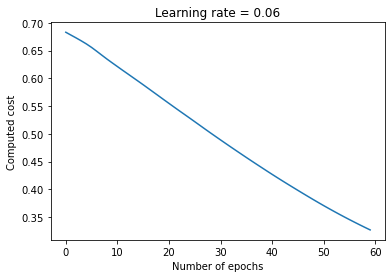

Accuracy
Accuracy: 0.8321678321678321
Cost/error after epoch 0: 0.705035
Cost/error after epoch 10: 0.683149
Cost/error after epoch 20: 0.666458
Cost/error after epoch 30: 0.651258
Cost/error after epoch 40: 0.631898
Cost/error after epoch 50: 0.609302
Cost/error after all epochs:  0.5870931991033017


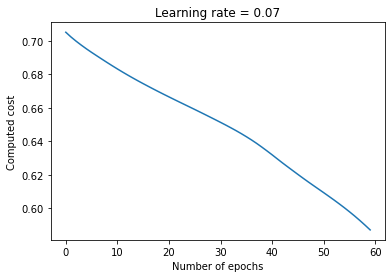

Accuracy
Accuracy: 0.8671328671328672
Cost/error after epoch 0: 0.684314
Cost/error after epoch 10: 0.632375
Cost/error after epoch 20: 0.586360
Cost/error after epoch 30: 0.527946
Cost/error after epoch 40: 0.471052
Cost/error after epoch 50: 0.412314
Cost/error after all epochs:  0.361013392391857


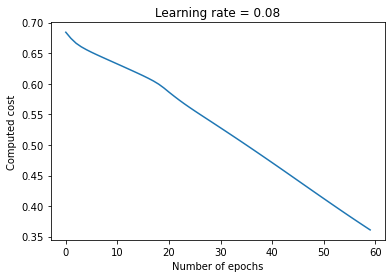

Accuracy
Accuracy: 0.8041958041958042
Cost/error after epoch 0: 0.697330
Cost/error after epoch 10: 0.673836
Cost/error after epoch 20: 0.657901
Cost/error after epoch 30: 0.642973
Cost/error after epoch 40: 0.626408
Cost/error after epoch 50: 0.605870
Cost/error after all epochs:  0.5823424683723061


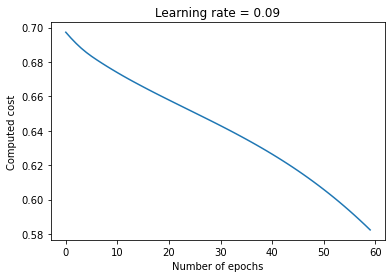

Accuracy
Accuracy: 0.45454545454545453
Cost/error after epoch 0: 0.689101
Cost/error after epoch 10: 0.688827
Cost/error after epoch 20: 0.688553
Cost/error after epoch 30: 0.688279
Cost/error after epoch 40: 0.688006
Cost/error after epoch 50: 0.687729
Cost/error after all epochs:  0.6874806880557016


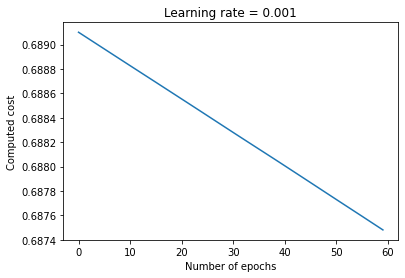

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.690433
Cost/error after epoch 10: 0.688736
Cost/error after epoch 20: 0.687100
Cost/error after epoch 30: 0.685538
Cost/error after epoch 40: 0.684050
Cost/error after epoch 50: 0.682604
Cost/error after all epochs:  0.681354502964337


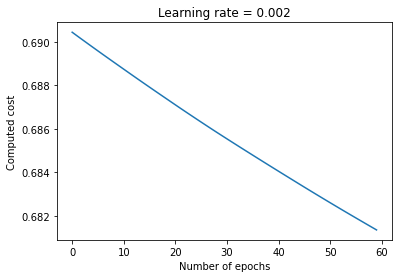

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.702245
Cost/error after epoch 10: 0.700741
Cost/error after epoch 20: 0.699273
Cost/error after epoch 30: 0.697827
Cost/error after epoch 40: 0.696369
Cost/error after epoch 50: 0.694916
Cost/error after all epochs:  0.6936695940650159


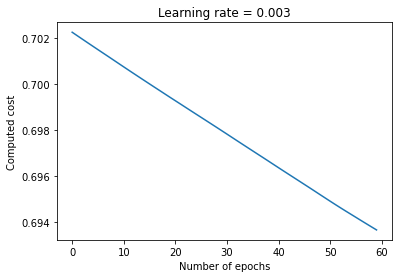

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.693952
Cost/error after epoch 10: 0.692578
Cost/error after epoch 20: 0.691240
Cost/error after epoch 30: 0.689960
Cost/error after epoch 40: 0.688746
Cost/error after epoch 50: 0.687595
Cost/error after all epochs:  0.6865977071296575


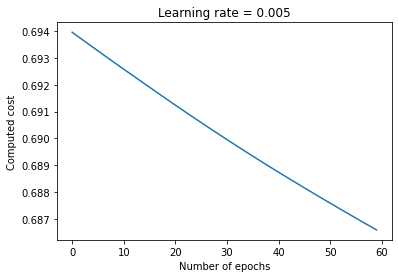

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.693726
Cost/error after epoch 10: 0.691736
Cost/error after epoch 20: 0.689799
Cost/error after epoch 30: 0.687952
Cost/error after epoch 40: 0.686205
Cost/error after epoch 50: 0.684551
Cost/error after all epochs:  0.6831314495311432


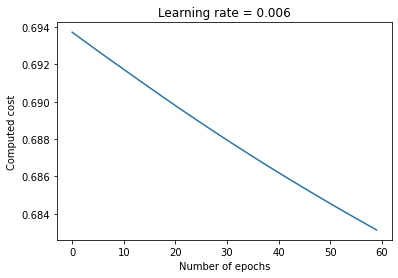

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.694267
Cost/error after epoch 10: 0.692516
Cost/error after epoch 20: 0.691014
Cost/error after epoch 30: 0.689670
Cost/error after epoch 40: 0.688419
Cost/error after epoch 50: 0.687196
Cost/error after all epochs:  0.6861099446022655


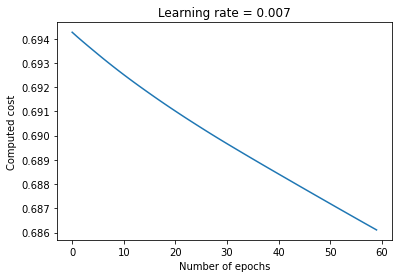

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.690049
Cost/error after epoch 10: 0.688350
Cost/error after epoch 20: 0.686720
Cost/error after epoch 30: 0.685153
Cost/error after epoch 40: 0.683649
Cost/error after epoch 50: 0.682205
Cost/error after all epochs:  0.680956554917174


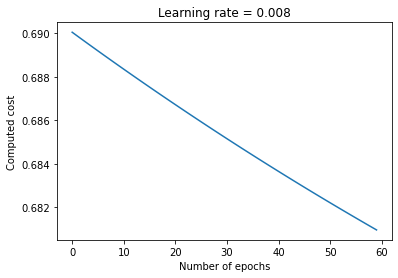

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.708731
Cost/error after epoch 10: 0.666326
Cost/error after epoch 20: 0.640361
Cost/error after epoch 30: 0.625976
Cost/error after epoch 40: 0.616443
Cost/error after epoch 50: 0.608309
Cost/error after all epochs:  0.6015894382724526


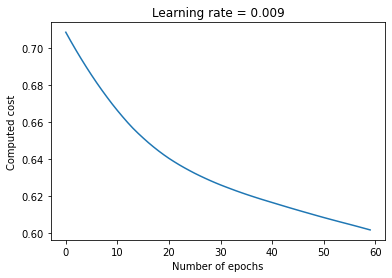

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.695631
Cost/error after epoch 10: 0.677280
Cost/error after epoch 20: 0.668247
Cost/error after epoch 30: 0.663321
Cost/error after epoch 40: 0.659738
Cost/error after epoch 50: 0.656380
Cost/error after epoch 60: 0.652335
Cost/error after epoch 70: 0.646416
Cost/error after all epochs:  0.6388863188492118


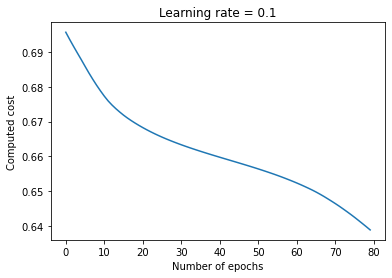

Accuracy
Accuracy: 0.8391608391608391
Cost/error after epoch 0: 0.672405
Cost/error after epoch 10: 0.666775
Cost/error after epoch 20: 0.661361
Cost/error after epoch 30: 0.656119
Cost/error after epoch 40: 0.651040
Cost/error after epoch 50: 0.646019
Cost/error after epoch 60: 0.641056
Cost/error after epoch 70: 0.636116
Cost/error after all epochs:  0.6316738097303114


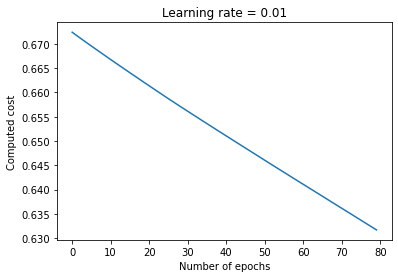

Accuracy
Accuracy: 0.4895104895104895
Cost/error after epoch 0: 0.764652
Cost/error after epoch 10: 0.682312
Cost/error after epoch 20: 0.643294
Cost/error after epoch 30: 0.621994
Cost/error after epoch 40: 0.608057
Cost/error after epoch 50: 0.596865
Cost/error after epoch 60: 0.586630
Cost/error after epoch 70: 0.576684
Cost/error after all epochs:  0.5678864202767223


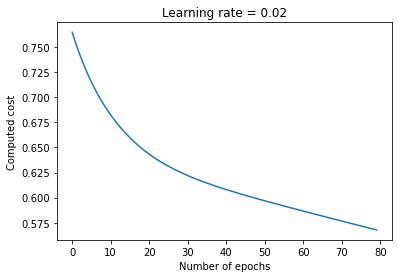

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.684312
Cost/error after epoch 10: 0.672210
Cost/error after epoch 20: 0.663938
Cost/error after epoch 30: 0.657199
Cost/error after epoch 40: 0.651230
Cost/error after epoch 50: 0.645522
Cost/error after epoch 60: 0.639740
Cost/error after epoch 70: 0.633693
Cost/error after all epochs:  0.6278426652473255


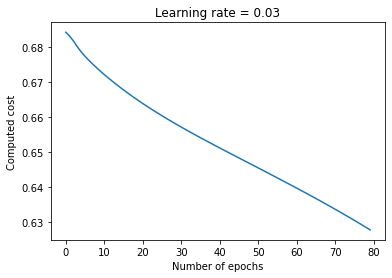

Accuracy
Accuracy: 0.6643356643356644
Cost/error after epoch 0: 0.688766
Cost/error after epoch 10: 0.673729
Cost/error after epoch 20: 0.656483
Cost/error after epoch 30: 0.636744
Cost/error after epoch 40: 0.614329
Cost/error after epoch 50: 0.591561
Cost/error after epoch 60: 0.567716
Cost/error after epoch 70: 0.542483
Cost/error after all epochs:  0.5183904636175619


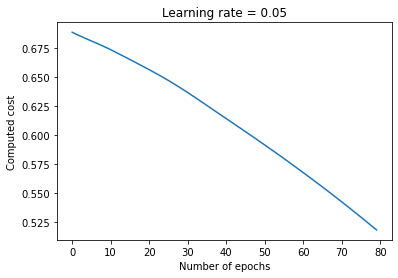

Accuracy
Accuracy: 0.5174825174825175
Cost/error after epoch 0: 0.698054
Cost/error after epoch 10: 0.689525
Cost/error after epoch 20: 0.682618
Cost/error after epoch 30: 0.675369
Cost/error after epoch 40: 0.671118
Cost/error after epoch 50: 0.667587
Cost/error after epoch 60: 0.664388
Cost/error after epoch 70: 0.661281
Cost/error after all epochs:  0.6584105165209428


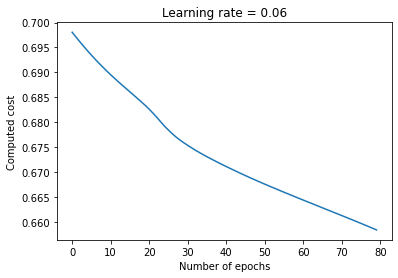

Accuracy
Accuracy: 0.4825174825174825
Cost/error after epoch 0: 0.708678
Cost/error after epoch 10: 0.668700
Cost/error after epoch 20: 0.639270
Cost/error after epoch 30: 0.612625
Cost/error after epoch 40: 0.584349
Cost/error after epoch 50: 0.552324
Cost/error after epoch 60: 0.514568
Cost/error after epoch 70: 0.471144
Cost/error after all epochs:  0.4301034281074486


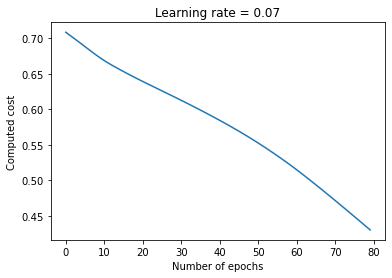

Accuracy
Accuracy: 0.881118881118881
Cost/error after epoch 0: 0.691882
Cost/error after epoch 10: 0.677331
Cost/error after epoch 20: 0.667309
Cost/error after epoch 30: 0.659205
Cost/error after epoch 40: 0.651453
Cost/error after epoch 50: 0.642854
Cost/error after epoch 60: 0.632278
Cost/error after epoch 70: 0.618243
Cost/error after all epochs:  0.6011708171276955


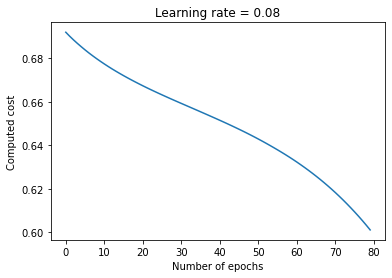

Accuracy
Accuracy: 0.6993006993006992
Cost/error after epoch 0: 0.683055
Cost/error after epoch 10: 0.650608
Cost/error after epoch 20: 0.610197
Cost/error after epoch 30: 0.568601
Cost/error after epoch 40: 0.518968
Cost/error after epoch 50: 0.459378
Cost/error after epoch 60: 0.394336
Cost/error after epoch 70: 0.332080
Cost/error after all epochs:  0.2842868892209694


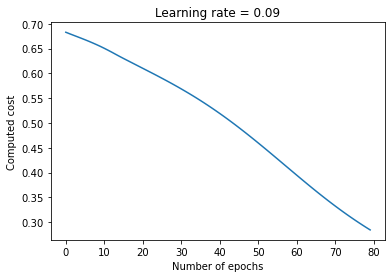

Accuracy
Accuracy: 0.8531468531468531
Cost/error after epoch 0: 0.699788
Cost/error after epoch 10: 0.699577
Cost/error after epoch 20: 0.699366
Cost/error after epoch 30: 0.699155
Cost/error after epoch 40: 0.698946
Cost/error after epoch 50: 0.698738
Cost/error after epoch 60: 0.698531
Cost/error after epoch 70: 0.698324
Cost/error after all epochs:  0.6981385060159528


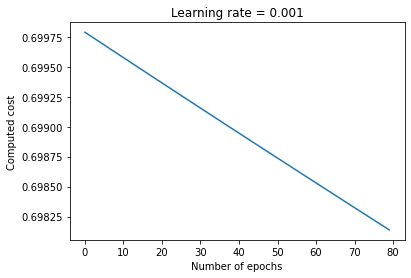

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.681820
Cost/error after epoch 10: 0.680583
Cost/error after epoch 20: 0.679389
Cost/error after epoch 30: 0.678233
Cost/error after epoch 40: 0.677088
Cost/error after epoch 50: 0.676022
Cost/error after epoch 60: 0.675013
Cost/error after epoch 70: 0.674031
Cost/error after all epochs:  0.6731651301529356


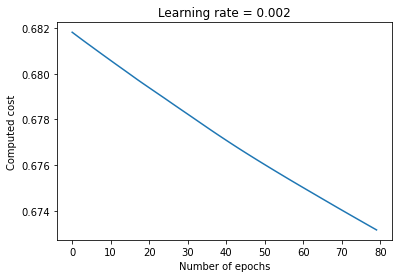

Accuracy
Accuracy: 0.3426573426573427
Cost/error after epoch 0: 0.693730
Cost/error after epoch 10: 0.692587
Cost/error after epoch 20: 0.691469
Cost/error after epoch 30: 0.690380
Cost/error after epoch 40: 0.689315
Cost/error after epoch 50: 0.688262
Cost/error after epoch 60: 0.687234
Cost/error after epoch 70: 0.686221
Cost/error after all epochs:  0.6853220035713943


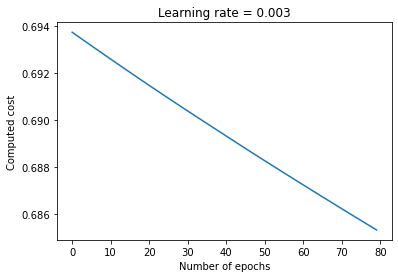

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.684752
Cost/error after epoch 10: 0.683608
Cost/error after epoch 20: 0.682483
Cost/error after epoch 30: 0.681381
Cost/error after epoch 40: 0.680320
Cost/error after epoch 50: 0.679302
Cost/error after epoch 60: 0.678319
Cost/error after epoch 70: 0.677373
Cost/error after all epochs:  0.6765523900720006


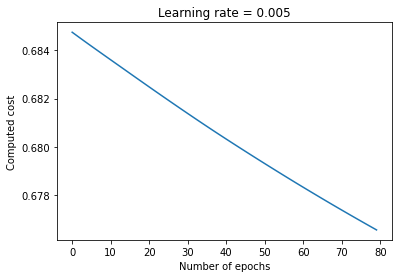

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.699496
Cost/error after epoch 10: 0.696308
Cost/error after epoch 20: 0.693392
Cost/error after epoch 30: 0.690777
Cost/error after epoch 40: 0.688519
Cost/error after epoch 50: 0.686588
Cost/error after epoch 60: 0.684933
Cost/error after epoch 70: 0.683458
Cost/error after all epochs:  0.6822095010447722


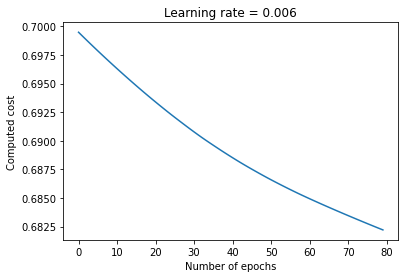

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.693561
Cost/error after epoch 10: 0.691049
Cost/error after epoch 20: 0.688811
Cost/error after epoch 30: 0.686802
Cost/error after epoch 40: 0.685033
Cost/error after epoch 50: 0.683458
Cost/error after epoch 60: 0.682010
Cost/error after epoch 70: 0.680670
Cost/error after all epochs:  0.6795422694051438


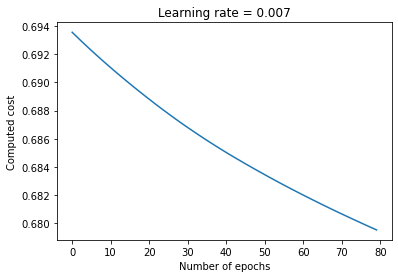

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.699110
Cost/error after epoch 10: 0.693322
Cost/error after epoch 20: 0.688906
Cost/error after epoch 30: 0.685385
Cost/error after epoch 40: 0.682475
Cost/error after epoch 50: 0.679975
Cost/error after epoch 60: 0.677527
Cost/error after epoch 70: 0.675128
Cost/error after all epochs:  0.6730726028213009


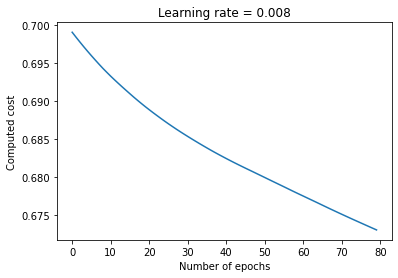

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.694492
Cost/error after epoch 10: 0.692121
Cost/error after epoch 20: 0.689587
Cost/error after epoch 30: 0.686769
Cost/error after epoch 40: 0.683305
Cost/error after epoch 50: 0.679114
Cost/error after epoch 60: 0.674171
Cost/error after epoch 70: 0.668877
Cost/error after all epochs:  0.6635774170997933


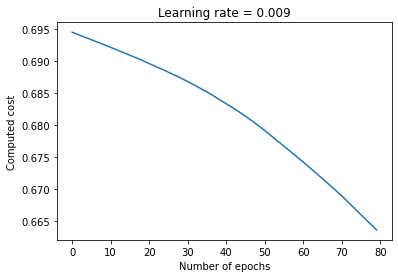

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.708285
Cost/error after epoch 10: 0.640879
Cost/error after epoch 20: 0.609832
Cost/error after epoch 30: 0.576252
Cost/error after epoch 40: 0.533988
Cost/error after epoch 50: 0.469896
Cost/error after epoch 60: 0.411581
Cost/error after epoch 70: 0.355732
Cost/error after epoch 80: 0.304746
Cost/error after epoch 90: 0.260788
Cost/error after all epochs:  0.22777132078623324


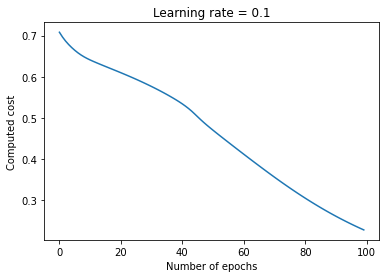

Accuracy
Accuracy: 0.8881118881118881
Cost/error after epoch 0: 0.705765
Cost/error after epoch 10: 0.702229
Cost/error after epoch 20: 0.698998
Cost/error after epoch 30: 0.695860
Cost/error after epoch 40: 0.692730
Cost/error after epoch 50: 0.689518
Cost/error after epoch 60: 0.686147
Cost/error after epoch 70: 0.682849
Cost/error after epoch 80: 0.679873
Cost/error after epoch 90: 0.677158
Cost/error after all epochs:  0.6750458507484437


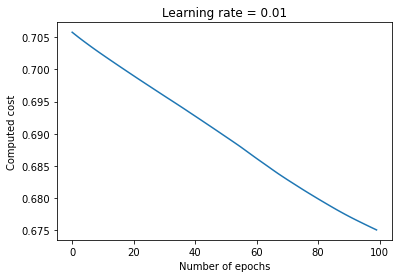

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.697617
Cost/error after epoch 10: 0.689856
Cost/error after epoch 20: 0.683821
Cost/error after epoch 30: 0.677808
Cost/error after epoch 40: 0.671369
Cost/error after epoch 50: 0.664977
Cost/error after epoch 60: 0.658735
Cost/error after epoch 70: 0.652661
Cost/error after epoch 80: 0.646595
Cost/error after epoch 90: 0.640015
Cost/error after all epochs:  0.6339506202886245


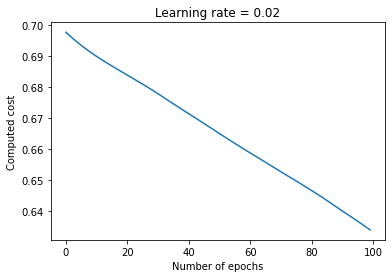

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.699075
Cost/error after epoch 10: 0.690020
Cost/error after epoch 20: 0.682879
Cost/error after epoch 30: 0.677032
Cost/error after epoch 40: 0.671799
Cost/error after epoch 50: 0.667063
Cost/error after epoch 60: 0.662677
Cost/error after epoch 70: 0.658453
Cost/error after epoch 80: 0.654298
Cost/error after epoch 90: 0.650087
Cost/error after all epochs:  0.6461512503331107


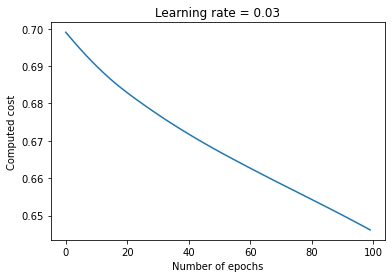

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.688739
Cost/error after epoch 10: 0.671923
Cost/error after epoch 20: 0.656546
Cost/error after epoch 30: 0.641533
Cost/error after epoch 40: 0.626472
Cost/error after epoch 50: 0.611131
Cost/error after epoch 60: 0.594473
Cost/error after epoch 70: 0.575911
Cost/error after epoch 80: 0.555065
Cost/error after epoch 90: 0.531560
Cost/error after all epochs:  0.5079750702889281


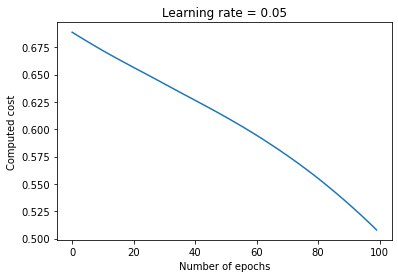

Accuracy
Accuracy: 0.965034965034965
Cost/error after epoch 0: 0.692646
Cost/error after epoch 10: 0.647079
Cost/error after epoch 20: 0.614883
Cost/error after epoch 30: 0.586345
Cost/error after epoch 40: 0.560238
Cost/error after epoch 50: 0.534448
Cost/error after epoch 60: 0.508725
Cost/error after epoch 70: 0.482533
Cost/error after epoch 80: 0.456244
Cost/error after epoch 90: 0.431941
Cost/error after all epochs:  0.41183786849095433


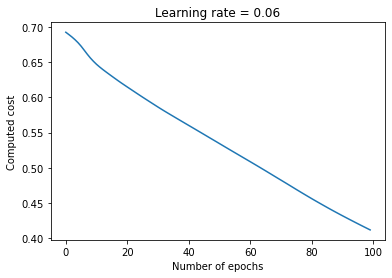

Accuracy
Accuracy: 0.8881118881118881
Cost/error after epoch 0: 0.693465
Cost/error after epoch 10: 0.676137
Cost/error after epoch 20: 0.661480
Cost/error after epoch 30: 0.648409
Cost/error after epoch 40: 0.633768
Cost/error after epoch 50: 0.615801
Cost/error after epoch 60: 0.592684
Cost/error after epoch 70: 0.563101
Cost/error after epoch 80: 0.526998
Cost/error after epoch 90: 0.485342
Cost/error after all epochs:  0.44494520260580356


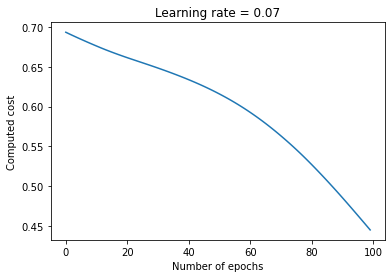

Accuracy
Accuracy: 0.8181818181818181
Cost/error after epoch 0: 0.693347
Cost/error after epoch 10: 0.671512
Cost/error after epoch 20: 0.649918
Cost/error after epoch 30: 0.635982
Cost/error after epoch 40: 0.620585
Cost/error after epoch 50: 0.601909
Cost/error after epoch 60: 0.578479
Cost/error after epoch 70: 0.549172
Cost/error after epoch 80: 0.512954
Cost/error after epoch 90: 0.469542
Cost/error after all epochs:  0.42508109043066544


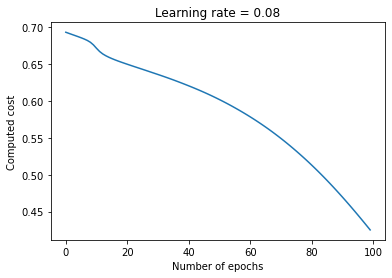

Accuracy
Accuracy: 0.923076923076923
Cost/error after epoch 0: 0.739960
Cost/error after epoch 10: 0.598743
Cost/error after epoch 20: 0.553974
Cost/error after epoch 30: 0.506382
Cost/error after epoch 40: 0.452103
Cost/error after epoch 50: 0.398736
Cost/error after epoch 60: 0.349885
Cost/error after epoch 70: 0.307000
Cost/error after epoch 80: 0.270583
Cost/error after epoch 90: 0.240113
Cost/error after all epochs:  0.21726061776170452


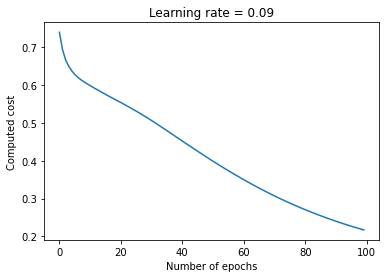

Accuracy
Accuracy: 0.895104895104895
Cost/error after epoch 0: 0.692234
Cost/error after epoch 10: 0.691874
Cost/error after epoch 20: 0.691516
Cost/error after epoch 30: 0.691163
Cost/error after epoch 40: 0.690813
Cost/error after epoch 50: 0.690466
Cost/error after epoch 60: 0.690120
Cost/error after epoch 70: 0.689778
Cost/error after epoch 80: 0.689439
Cost/error after epoch 90: 0.689101
Cost/error after all epochs:  0.688798856293405


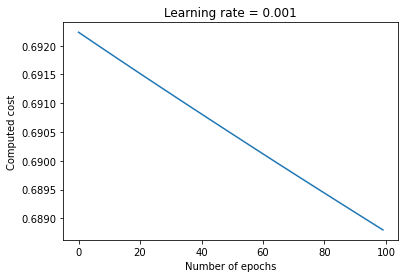

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.698423
Cost/error after epoch 10: 0.697770
Cost/error after epoch 20: 0.697130
Cost/error after epoch 30: 0.696479
Cost/error after epoch 40: 0.695817
Cost/error after epoch 50: 0.695154
Cost/error after epoch 60: 0.694492
Cost/error after epoch 70: 0.693838
Cost/error after epoch 80: 0.693195
Cost/error after epoch 90: 0.692566
Cost/error after all epochs:  0.6920013526678581


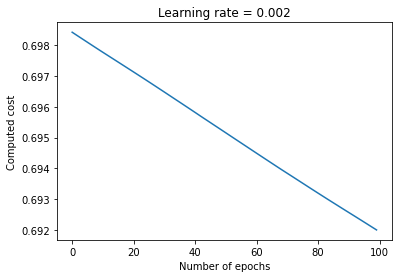

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.697250
Cost/error after epoch 10: 0.696111
Cost/error after epoch 20: 0.695017
Cost/error after epoch 30: 0.693964
Cost/error after epoch 40: 0.692955
Cost/error after epoch 50: 0.691989
Cost/error after epoch 60: 0.691061
Cost/error after epoch 70: 0.690165
Cost/error after epoch 80: 0.689317
Cost/error after epoch 90: 0.688508
Cost/error after all epochs:  0.6878039423087542


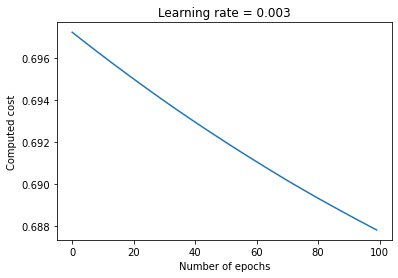

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.695796
Cost/error after epoch 10: 0.694307
Cost/error after epoch 20: 0.692892
Cost/error after epoch 30: 0.691550
Cost/error after epoch 40: 0.690264
Cost/error after epoch 50: 0.689039
Cost/error after epoch 60: 0.687862
Cost/error after epoch 70: 0.686727
Cost/error after epoch 80: 0.685627
Cost/error after epoch 90: 0.684557
Cost/error after all epochs:  0.6836104327665922


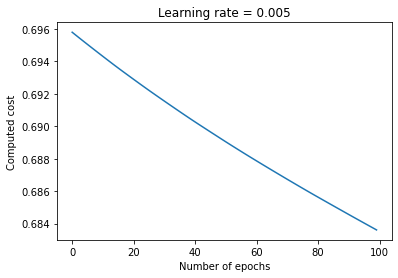

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.696054
Cost/error after epoch 10: 0.694867
Cost/error after epoch 20: 0.693708
Cost/error after epoch 30: 0.692577
Cost/error after epoch 40: 0.691504
Cost/error after epoch 50: 0.690464
Cost/error after epoch 60: 0.689458
Cost/error after epoch 70: 0.688485
Cost/error after epoch 80: 0.687552
Cost/error after epoch 90: 0.686659
Cost/error after all epochs:  0.6858810721713627


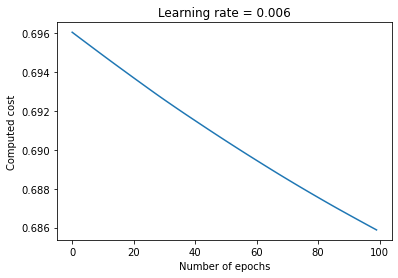

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.692710
Cost/error after epoch 10: 0.690314
Cost/error after epoch 20: 0.687533
Cost/error after epoch 30: 0.684659
Cost/error after epoch 40: 0.681998
Cost/error after epoch 50: 0.679547
Cost/error after epoch 60: 0.677180
Cost/error after epoch 70: 0.674961
Cost/error after epoch 80: 0.672821
Cost/error after epoch 90: 0.670750
Cost/error after all epochs:  0.6688918721086551


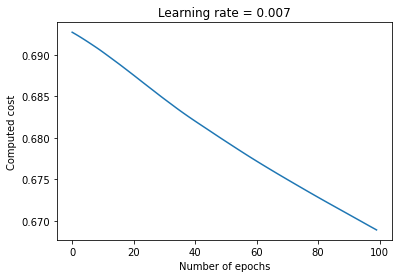

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.705442
Cost/error after epoch 10: 0.701806
Cost/error after epoch 20: 0.698368
Cost/error after epoch 30: 0.694944
Cost/error after epoch 40: 0.691615
Cost/error after epoch 50: 0.688431
Cost/error after epoch 60: 0.685415
Cost/error after epoch 70: 0.682529
Cost/error after epoch 80: 0.679728
Cost/error after epoch 90: 0.677011
Cost/error after all epochs:  0.6746353349310747


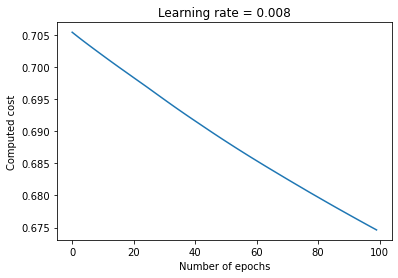

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.695552
Cost/error after epoch 10: 0.693473
Cost/error after epoch 20: 0.691426
Cost/error after epoch 30: 0.689406
Cost/error after epoch 40: 0.687458
Cost/error after epoch 50: 0.685574
Cost/error after epoch 60: 0.683749
Cost/error after epoch 70: 0.682000
Cost/error after epoch 80: 0.680324
Cost/error after epoch 90: 0.678714
Cost/error after all epochs:  0.6773052980998181


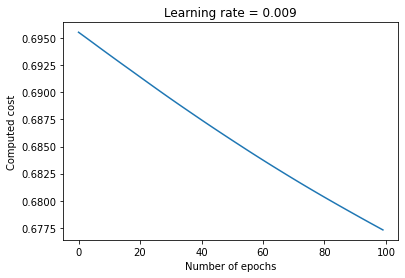

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.717521
Cost/error after epoch 10: 0.659226
Cost/error after epoch 20: 0.611355
Cost/error after epoch 30: 0.551943
Cost/error after epoch 40: 0.483502
Cost/error after epoch 50: 0.408603
Cost/error after epoch 60: 0.336812
Cost/error after epoch 70: 0.276918
Cost/error after epoch 80: 0.231175
Cost/error after epoch 90: 0.197453
Cost/error after epoch 100: 0.172598
Cost/error after epoch 110: 0.153812
Cost/error after epoch 120: 0.139260
Cost/error after epoch 130: 0.127743
Cost/error after all epochs:  0.11926388653014589


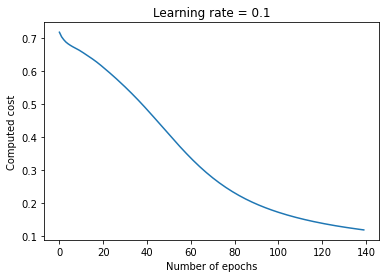

Accuracy
Accuracy: 0.9230769230769231
Cost/error after epoch 0: 0.694157
Cost/error after epoch 10: 0.692129
Cost/error after epoch 20: 0.690405
Cost/error after epoch 30: 0.688871
Cost/error after epoch 40: 0.687442
Cost/error after epoch 50: 0.686104
Cost/error after epoch 60: 0.684837
Cost/error after epoch 70: 0.683632
Cost/error after epoch 80: 0.682485
Cost/error after epoch 90: 0.681395
Cost/error after epoch 100: 0.680359
Cost/error after epoch 110: 0.679374
Cost/error after epoch 120: 0.678437
Cost/error after epoch 130: 0.677545
Cost/error after all epochs:  0.6767783502693105


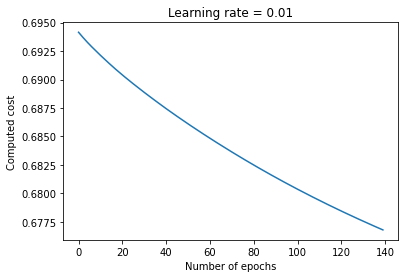

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.698610
Cost/error after epoch 10: 0.655494
Cost/error after epoch 20: 0.610738
Cost/error after epoch 30: 0.575157
Cost/error after epoch 40: 0.543968
Cost/error after epoch 50: 0.517850
Cost/error after epoch 60: 0.495280
Cost/error after epoch 70: 0.474317
Cost/error after epoch 80: 0.454041
Cost/error after epoch 90: 0.434506
Cost/error after epoch 100: 0.415597
Cost/error after epoch 110: 0.397409
Cost/error after epoch 120: 0.379806
Cost/error after epoch 130: 0.362919
Cost/error after all epochs:  0.34829858646046613


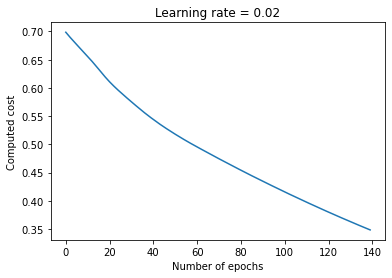

Accuracy
Accuracy: 0.895104895104895
Cost/error after epoch 0: 0.696028
Cost/error after epoch 10: 0.687331
Cost/error after epoch 20: 0.680458
Cost/error after epoch 30: 0.674344
Cost/error after epoch 40: 0.668485
Cost/error after epoch 50: 0.663104
Cost/error after epoch 60: 0.657807
Cost/error after epoch 70: 0.652323
Cost/error after epoch 80: 0.646664
Cost/error after epoch 90: 0.640830
Cost/error after epoch 100: 0.634766
Cost/error after epoch 110: 0.628364
Cost/error after epoch 120: 0.621321
Cost/error after epoch 130: 0.613523
Cost/error after all epochs:  0.6056549259816665


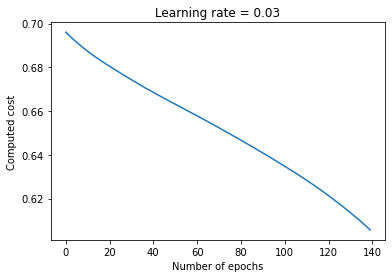

Accuracy
Accuracy: 0.5734265734265734
Cost/error after epoch 0: 0.679671
Cost/error after epoch 10: 0.655285
Cost/error after epoch 20: 0.630536
Cost/error after epoch 30: 0.603828
Cost/error after epoch 40: 0.571229
Cost/error after epoch 50: 0.539364
Cost/error after epoch 60: 0.507548
Cost/error after epoch 70: 0.474404
Cost/error after epoch 80: 0.439367
Cost/error after epoch 90: 0.403196
Cost/error after epoch 100: 0.367149
Cost/error after epoch 110: 0.332989
Cost/error after epoch 120: 0.301983
Cost/error after epoch 130: 0.274397
Cost/error after all epochs:  0.2526459611378767


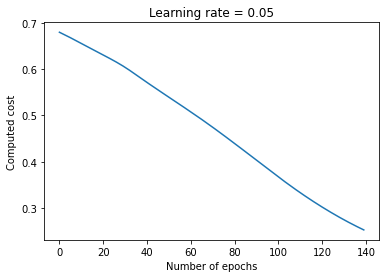

Accuracy
Accuracy: 0.9300699300699301
Cost/error after epoch 0: 0.708498
Cost/error after epoch 10: 0.665175
Cost/error after epoch 20: 0.627716
Cost/error after epoch 30: 0.602611
Cost/error after epoch 40: 0.573651
Cost/error after epoch 50: 0.538143
Cost/error after epoch 60: 0.496966
Cost/error after epoch 70: 0.453457
Cost/error after epoch 80: 0.409826
Cost/error after epoch 90: 0.366587
Cost/error after epoch 100: 0.326383
Cost/error after epoch 110: 0.290941
Cost/error after epoch 120: 0.260833
Cost/error after epoch 130: 0.235640
Cost/error after all epochs:  0.21673159916140053


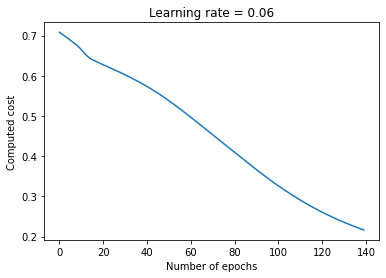

Accuracy
Accuracy: 0.895104895104895
Cost/error after epoch 0: 0.689484
Cost/error after epoch 10: 0.663938
Cost/error after epoch 20: 0.645793
Cost/error after epoch 30: 0.630452
Cost/error after epoch 40: 0.614672
Cost/error after epoch 50: 0.596648
Cost/error after epoch 60: 0.574702
Cost/error after epoch 70: 0.547544
Cost/error after epoch 80: 0.513937
Cost/error after epoch 90: 0.473207
Cost/error after epoch 100: 0.426435
Cost/error after epoch 110: 0.377200
Cost/error after epoch 120: 0.330265
Cost/error after epoch 130: 0.289349
Cost/error after all epochs:  0.25883960971253317


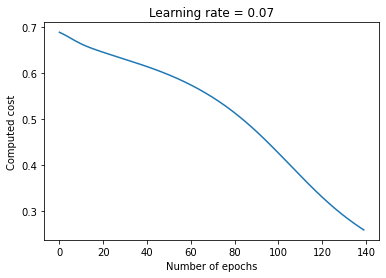

Accuracy
Accuracy: 0.895104895104895
Cost/error after epoch 0: 0.691589
Cost/error after epoch 10: 0.674852
Cost/error after epoch 20: 0.661427
Cost/error after epoch 30: 0.647364
Cost/error after epoch 40: 0.629992
Cost/error after epoch 50: 0.609194
Cost/error after epoch 60: 0.584614
Cost/error after epoch 70: 0.553392
Cost/error after epoch 80: 0.514659
Cost/error after epoch 90: 0.469584
Cost/error after epoch 100: 0.419334
Cost/error after epoch 110: 0.367741
Cost/error after epoch 120: 0.319340
Cost/error after epoch 130: 0.277676
Cost/error after all epochs:  0.24690448698005862


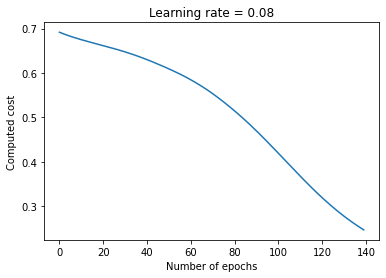

Accuracy
Accuracy: 0.895104895104895
Cost/error after epoch 0: 0.688454
Cost/error after epoch 10: 0.673297
Cost/error after epoch 20: 0.661959
Cost/error after epoch 30: 0.651260
Cost/error after epoch 40: 0.636443
Cost/error after epoch 50: 0.618810
Cost/error after epoch 60: 0.595994
Cost/error after epoch 70: 0.565197
Cost/error after epoch 80: 0.526159
Cost/error after epoch 90: 0.479460
Cost/error after epoch 100: 0.426302
Cost/error after epoch 110: 0.370218
Cost/error after epoch 120: 0.317295
Cost/error after epoch 130: 0.271971
Cost/error after all epochs:  0.23906444713580402


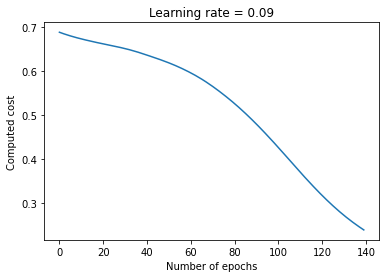

Accuracy
Accuracy: 0.895104895104895
Cost/error after epoch 0: 0.694939
Cost/error after epoch 10: 0.694744
Cost/error after epoch 20: 0.694551
Cost/error after epoch 30: 0.694358
Cost/error after epoch 40: 0.694167
Cost/error after epoch 50: 0.693976
Cost/error after epoch 60: 0.693787
Cost/error after epoch 70: 0.693599
Cost/error after epoch 80: 0.693412
Cost/error after epoch 90: 0.693227
Cost/error after epoch 100: 0.693042
Cost/error after epoch 110: 0.692858
Cost/error after epoch 120: 0.692675
Cost/error after epoch 130: 0.692493
Cost/error after all epochs:  0.6923302875838844


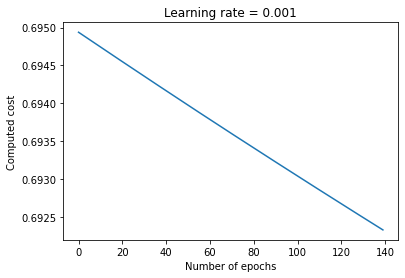

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.704181
Cost/error after epoch 10: 0.702746
Cost/error after epoch 20: 0.701316
Cost/error after epoch 30: 0.699900
Cost/error after epoch 40: 0.698504
Cost/error after epoch 50: 0.697125
Cost/error after epoch 60: 0.695764
Cost/error after epoch 70: 0.694419
Cost/error after epoch 80: 0.693090
Cost/error after epoch 90: 0.691768
Cost/error after epoch 100: 0.690461
Cost/error after epoch 110: 0.689163
Cost/error after epoch 120: 0.687879
Cost/error after epoch 130: 0.686606
Cost/error after all epochs:  0.6854655836663973


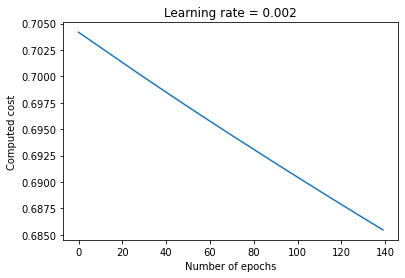

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.697079
Cost/error after epoch 10: 0.696324
Cost/error after epoch 20: 0.695572
Cost/error after epoch 30: 0.694828
Cost/error after epoch 40: 0.694092
Cost/error after epoch 50: 0.693365
Cost/error after epoch 60: 0.692649
Cost/error after epoch 70: 0.691945
Cost/error after epoch 80: 0.691252
Cost/error after epoch 90: 0.690568
Cost/error after epoch 100: 0.689893
Cost/error after epoch 110: 0.689228
Cost/error after epoch 120: 0.688573
Cost/error after epoch 130: 0.687927
Cost/error after all epochs:  0.6873524583100621


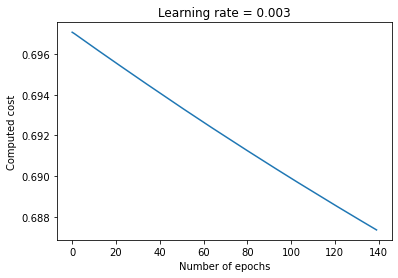

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.695743
Cost/error after epoch 10: 0.694530
Cost/error after epoch 20: 0.693316
Cost/error after epoch 30: 0.692112
Cost/error after epoch 40: 0.690922
Cost/error after epoch 50: 0.689738
Cost/error after epoch 60: 0.688552
Cost/error after epoch 70: 0.687370
Cost/error after epoch 80: 0.686200
Cost/error after epoch 90: 0.685049
Cost/error after epoch 100: 0.683925
Cost/error after epoch 110: 0.682823
Cost/error after epoch 120: 0.681744
Cost/error after epoch 130: 0.680686
Cost/error after all epochs:  0.6797452588442824


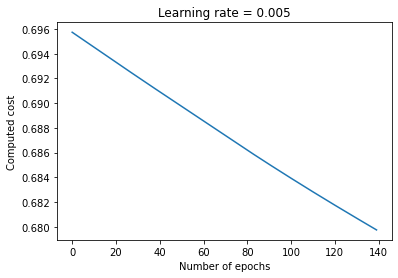

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.701075
Cost/error after epoch 10: 0.698568
Cost/error after epoch 20: 0.696012
Cost/error after epoch 30: 0.693379
Cost/error after epoch 40: 0.690546
Cost/error after epoch 50: 0.687457
Cost/error after epoch 60: 0.684387
Cost/error after epoch 70: 0.681407
Cost/error after epoch 80: 0.678638
Cost/error after epoch 90: 0.676033
Cost/error after epoch 100: 0.673549
Cost/error after epoch 110: 0.671144
Cost/error after epoch 120: 0.668797
Cost/error after epoch 130: 0.666460
Cost/error after all epochs:  0.6643843548412117


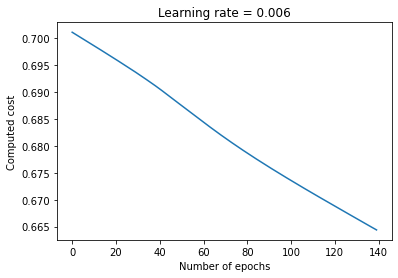

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.691906
Cost/error after epoch 10: 0.690290
Cost/error after epoch 20: 0.688706
Cost/error after epoch 30: 0.687146
Cost/error after epoch 40: 0.685607
Cost/error after epoch 50: 0.684095
Cost/error after epoch 60: 0.682605
Cost/error after epoch 70: 0.681132
Cost/error after epoch 80: 0.679672
Cost/error after epoch 90: 0.678195
Cost/error after epoch 100: 0.676703
Cost/error after epoch 110: 0.675196
Cost/error after epoch 120: 0.673651
Cost/error after epoch 130: 0.672073
Cost/error after all epochs:  0.6706264891975084


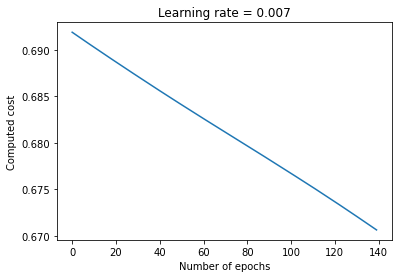

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.695877
Cost/error after epoch 10: 0.694509
Cost/error after epoch 20: 0.693194
Cost/error after epoch 30: 0.691911
Cost/error after epoch 40: 0.690667
Cost/error after epoch 50: 0.689460
Cost/error after epoch 60: 0.688290
Cost/error after epoch 70: 0.687146
Cost/error after epoch 80: 0.686043
Cost/error after epoch 90: 0.684984
Cost/error after epoch 100: 0.683925
Cost/error after epoch 110: 0.682866
Cost/error after epoch 120: 0.681833
Cost/error after epoch 130: 0.680772
Cost/error after all epochs:  0.6798345210238211


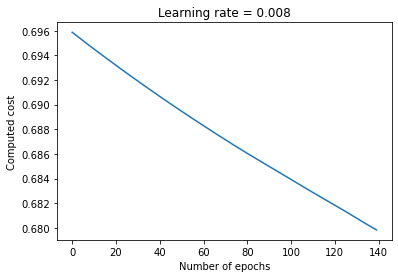

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.687655
Cost/error after epoch 10: 0.684935
Cost/error after epoch 20: 0.682629
Cost/error after epoch 30: 0.680545
Cost/error after epoch 40: 0.678601
Cost/error after epoch 50: 0.676768
Cost/error after epoch 60: 0.675023
Cost/error after epoch 70: 0.673344
Cost/error after epoch 80: 0.671729
Cost/error after epoch 90: 0.670161
Cost/error after epoch 100: 0.668630
Cost/error after epoch 110: 0.667138
Cost/error after epoch 120: 0.665683
Cost/error after epoch 130: 0.664263
Cost/error after all epochs:  0.6630054261571314


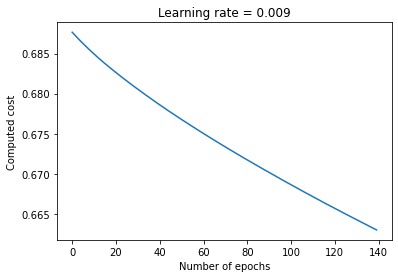

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.685085
Cost/error after epoch 10: 0.642085
Cost/error after epoch 20: 0.601026
Cost/error after epoch 30: 0.551261
Cost/error after epoch 40: 0.489425
Cost/error after epoch 50: 0.419085
Cost/error after epoch 60: 0.348963
Cost/error after epoch 70: 0.289029
Cost/error after epoch 80: 0.243024
Cost/error after epoch 90: 0.209103
Cost/error after epoch 100: 0.183754
Cost/error after epoch 110: 0.164271
Cost/error after epoch 120: 0.148658
Cost/error after epoch 130: 0.135926
Cost/error after epoch 140: 0.125336
Cost/error after epoch 150: 0.116391
Cost/error after epoch 160: 0.108805
Cost/error after epoch 170: 0.102349
Cost/error after epoch 180: 0.096778
Cost/error after epoch 190: 0.091954
Cost/error after all epochs:  0.08816450502232813


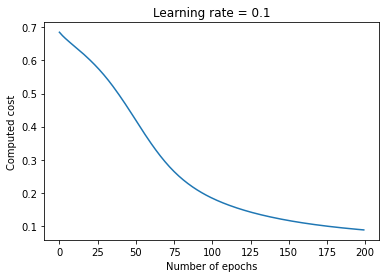

Accuracy
Accuracy: 0.93006993006993
Cost/error after epoch 0: 0.695628
Cost/error after epoch 10: 0.692710
Cost/error after epoch 20: 0.689974
Cost/error after epoch 30: 0.687400
Cost/error after epoch 40: 0.684978
Cost/error after epoch 50: 0.682687
Cost/error after epoch 60: 0.680523
Cost/error after epoch 70: 0.678476
Cost/error after epoch 80: 0.676541
Cost/error after epoch 90: 0.674705
Cost/error after epoch 100: 0.672967
Cost/error after epoch 110: 0.671313
Cost/error after epoch 120: 0.669741
Cost/error after epoch 130: 0.668242
Cost/error after epoch 140: 0.666822
Cost/error after epoch 150: 0.665461
Cost/error after epoch 160: 0.664147
Cost/error after epoch 170: 0.662888
Cost/error after epoch 180: 0.661681
Cost/error after epoch 190: 0.660517
Cost/error after all epochs:  0.6595019635660425


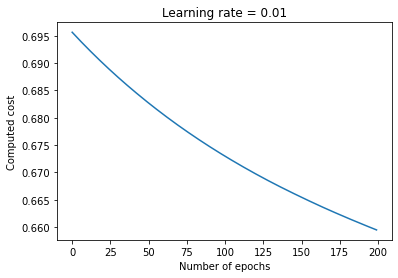

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.706604
Cost/error after epoch 10: 0.702954
Cost/error after epoch 20: 0.699597
Cost/error after epoch 30: 0.696474
Cost/error after epoch 40: 0.693544
Cost/error after epoch 50: 0.690779
Cost/error after epoch 60: 0.688160
Cost/error after epoch 70: 0.685653
Cost/error after epoch 80: 0.683283
Cost/error after epoch 90: 0.681023
Cost/error after epoch 100: 0.678850
Cost/error after epoch 110: 0.676726
Cost/error after epoch 120: 0.674645
Cost/error after epoch 130: 0.672597
Cost/error after epoch 140: 0.670580
Cost/error after epoch 150: 0.668586
Cost/error after epoch 160: 0.666594
Cost/error after epoch 170: 0.664597
Cost/error after epoch 180: 0.662585
Cost/error after epoch 190: 0.660559
Cost/error after all epochs:  0.6587077058721476


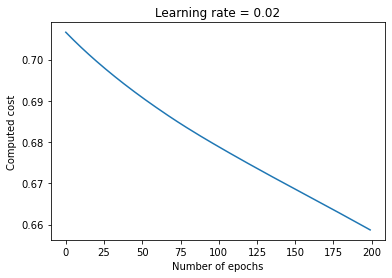

Accuracy
Accuracy: 0.3496503496503497
Cost/error after epoch 0: 0.700123
Cost/error after epoch 10: 0.693140
Cost/error after epoch 20: 0.687576
Cost/error after epoch 30: 0.682756
Cost/error after epoch 40: 0.678508
Cost/error after epoch 50: 0.674740
Cost/error after epoch 60: 0.671244
Cost/error after epoch 70: 0.668007
Cost/error after epoch 80: 0.664969
Cost/error after epoch 90: 0.662045
Cost/error after epoch 100: 0.659194
Cost/error after epoch 110: 0.656360
Cost/error after epoch 120: 0.653486
Cost/error after epoch 130: 0.650541
Cost/error after epoch 140: 0.647458
Cost/error after epoch 150: 0.644236
Cost/error after epoch 160: 0.640874
Cost/error after epoch 170: 0.637321
Cost/error after epoch 180: 0.633476
Cost/error after epoch 190: 0.629303
Cost/error after all epochs:  0.6252490553386433


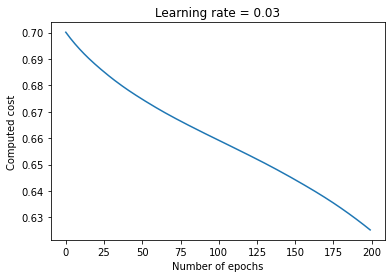

Accuracy
Accuracy: 0.9020979020979021
Cost/error after epoch 0: 0.692732
Cost/error after epoch 10: 0.681109
Cost/error after epoch 20: 0.673016
Cost/error after epoch 30: 0.666919
Cost/error after epoch 40: 0.661607
Cost/error after epoch 50: 0.656452
Cost/error after epoch 60: 0.651107
Cost/error after epoch 70: 0.645303
Cost/error after epoch 80: 0.638753
Cost/error after epoch 90: 0.631392
Cost/error after epoch 100: 0.622831
Cost/error after epoch 110: 0.612712
Cost/error after epoch 120: 0.600581
Cost/error after epoch 130: 0.585892
Cost/error after epoch 140: 0.568088
Cost/error after epoch 150: 0.546851
Cost/error after epoch 160: 0.522131
Cost/error after epoch 170: 0.494447
Cost/error after epoch 180: 0.464176
Cost/error after epoch 190: 0.431636
Cost/error after all epochs:  0.40154500854229586


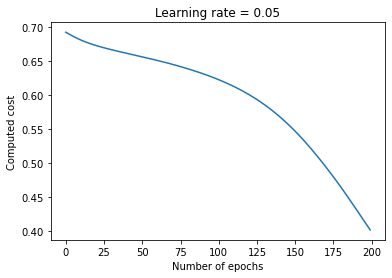

Accuracy
Accuracy: 0.8251748251748252
Cost/error after epoch 0: 0.697151
Cost/error after epoch 10: 0.674379
Cost/error after epoch 20: 0.660907
Cost/error after epoch 30: 0.649681
Cost/error after epoch 40: 0.638963
Cost/error after epoch 50: 0.627969
Cost/error after epoch 60: 0.615804
Cost/error after epoch 70: 0.600827
Cost/error after epoch 80: 0.579164
Cost/error after epoch 90: 0.550712
Cost/error after epoch 100: 0.518735
Cost/error after epoch 110: 0.483038
Cost/error after epoch 120: 0.444183
Cost/error after epoch 130: 0.404192
Cost/error after epoch 140: 0.364977
Cost/error after epoch 150: 0.328416
Cost/error after epoch 160: 0.295791
Cost/error after epoch 170: 0.267345
Cost/error after epoch 180: 0.242854
Cost/error after epoch 190: 0.222039
Cost/error after all epochs:  0.2061173214535814


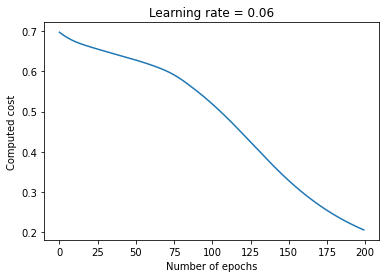

Accuracy
Accuracy: 0.9230769230769231
Cost/error after epoch 0: 0.684462
Cost/error after epoch 10: 0.642062
Cost/error after epoch 20: 0.613713
Cost/error after epoch 30: 0.583498
Cost/error after epoch 40: 0.548959
Cost/error after epoch 50: 0.509896
Cost/error after epoch 60: 0.467974
Cost/error after epoch 70: 0.425590
Cost/error after epoch 80: 0.384775
Cost/error after epoch 90: 0.346912
Cost/error after epoch 100: 0.312659
Cost/error after epoch 110: 0.282851
Cost/error after epoch 120: 0.257092
Cost/error after epoch 130: 0.234718
Cost/error after epoch 140: 0.215446
Cost/error after epoch 150: 0.198890
Cost/error after epoch 160: 0.184677
Cost/error after epoch 170: 0.172423
Cost/error after epoch 180: 0.161818
Cost/error after epoch 190: 0.152560
Cost/error after all epochs:  0.1452073414073731


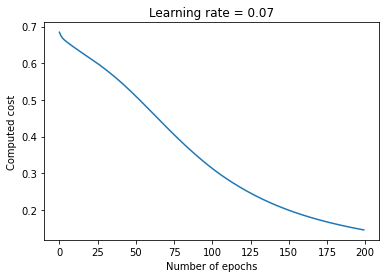

Accuracy
Accuracy: 0.9300699300699301
Cost/error after epoch 0: 0.690927
Cost/error after epoch 10: 0.677972
Cost/error after epoch 20: 0.667032
Cost/error after epoch 30: 0.655532
Cost/error after epoch 40: 0.641489
Cost/error after epoch 50: 0.624466
Cost/error after epoch 60: 0.604066
Cost/error after epoch 70: 0.577901
Cost/error after epoch 80: 0.543387
Cost/error after epoch 90: 0.500374
Cost/error after epoch 100: 0.450803
Cost/error after epoch 110: 0.400155
Cost/error after epoch 120: 0.351708
Cost/error after epoch 130: 0.307546
Cost/error after epoch 140: 0.268862
Cost/error after epoch 150: 0.236347
Cost/error after epoch 160: 0.209341
Cost/error after epoch 170: 0.187111
Cost/error after epoch 180: 0.168915
Cost/error after epoch 190: 0.154012
Cost/error after all epochs:  0.14279340673955654


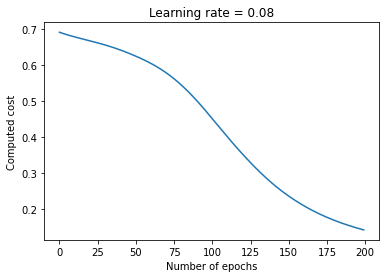

Accuracy
Accuracy: 0.951048951048951
Cost/error after epoch 0: 0.696906
Cost/error after epoch 10: 0.677132
Cost/error after epoch 20: 0.666677
Cost/error after epoch 30: 0.659063
Cost/error after epoch 40: 0.652914
Cost/error after epoch 50: 0.646970
Cost/error after epoch 60: 0.640202
Cost/error after epoch 70: 0.631187
Cost/error after epoch 80: 0.617526
Cost/error after epoch 90: 0.596606
Cost/error after epoch 100: 0.565949
Cost/error after epoch 110: 0.524509
Cost/error after epoch 120: 0.473207
Cost/error after epoch 130: 0.416232
Cost/error after epoch 140: 0.359070
Cost/error after epoch 150: 0.307205
Cost/error after epoch 160: 0.264327
Cost/error after epoch 170: 0.230833
Cost/error after epoch 180: 0.205104
Cost/error after epoch 190: 0.185287
Cost/error after all epochs:  0.1711411279888552


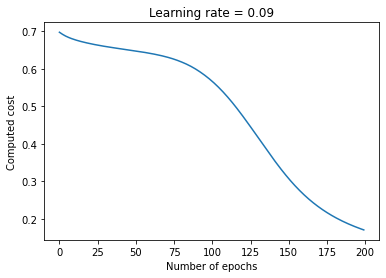

Accuracy
Accuracy: 0.951048951048951
Cost/error after epoch 0: 0.693517
Cost/error after epoch 10: 0.693348
Cost/error after epoch 20: 0.693179
Cost/error after epoch 30: 0.693011
Cost/error after epoch 40: 0.692843
Cost/error after epoch 50: 0.692675
Cost/error after epoch 60: 0.692505
Cost/error after epoch 70: 0.692336
Cost/error after epoch 80: 0.692167
Cost/error after epoch 90: 0.691998
Cost/error after epoch 100: 0.691829
Cost/error after epoch 110: 0.691660
Cost/error after epoch 120: 0.691491
Cost/error after epoch 130: 0.691322
Cost/error after epoch 140: 0.691153
Cost/error after epoch 150: 0.690983
Cost/error after epoch 160: 0.690815
Cost/error after epoch 170: 0.690648
Cost/error after epoch 180: 0.690480
Cost/error after epoch 190: 0.690312
Cost/error after all epochs:  0.6901615018838237


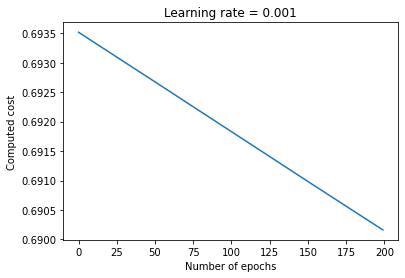

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.700712
Cost/error after epoch 10: 0.699333
Cost/error after epoch 20: 0.697963
Cost/error after epoch 30: 0.696632
Cost/error after epoch 40: 0.695292
Cost/error after epoch 50: 0.693954
Cost/error after epoch 60: 0.692628
Cost/error after epoch 70: 0.691328
Cost/error after epoch 80: 0.690039
Cost/error after epoch 90: 0.688751
Cost/error after epoch 100: 0.687477
Cost/error after epoch 110: 0.686213
Cost/error after epoch 120: 0.684972
Cost/error after epoch 130: 0.683758
Cost/error after epoch 140: 0.682547
Cost/error after epoch 150: 0.681340
Cost/error after epoch 160: 0.680146
Cost/error after epoch 170: 0.678973
Cost/error after epoch 180: 0.677806
Cost/error after epoch 190: 0.676642
Cost/error after all epochs:  0.6756064098950784


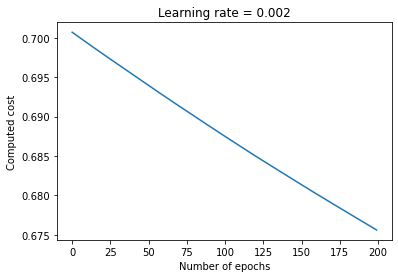

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.693066
Cost/error after epoch 10: 0.692409
Cost/error after epoch 20: 0.691716
Cost/error after epoch 30: 0.690989
Cost/error after epoch 40: 0.690250
Cost/error after epoch 50: 0.689518
Cost/error after epoch 60: 0.688802
Cost/error after epoch 70: 0.688101
Cost/error after epoch 80: 0.687409
Cost/error after epoch 90: 0.686731
Cost/error after epoch 100: 0.686073
Cost/error after epoch 110: 0.685445
Cost/error after epoch 120: 0.684838
Cost/error after epoch 130: 0.684241
Cost/error after epoch 140: 0.683659
Cost/error after epoch 150: 0.683091
Cost/error after epoch 160: 0.682536
Cost/error after epoch 170: 0.681994
Cost/error after epoch 180: 0.681462
Cost/error after epoch 190: 0.680942
Cost/error after all epochs:  0.680483361405728


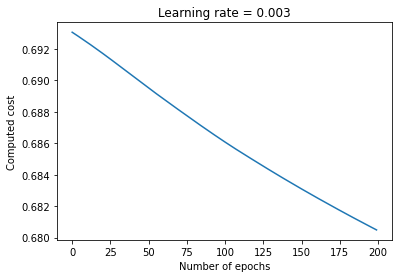

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.706332
Cost/error after epoch 10: 0.691628
Cost/error after epoch 20: 0.679991
Cost/error after epoch 30: 0.670906
Cost/error after epoch 40: 0.663736
Cost/error after epoch 50: 0.657800
Cost/error after epoch 60: 0.652655
Cost/error after epoch 70: 0.648030
Cost/error after epoch 80: 0.643796
Cost/error after epoch 90: 0.639848
Cost/error after epoch 100: 0.636051
Cost/error after epoch 110: 0.632379
Cost/error after epoch 120: 0.628829
Cost/error after epoch 130: 0.625377
Cost/error after epoch 140: 0.622015
Cost/error after epoch 150: 0.618740
Cost/error after epoch 160: 0.615556
Cost/error after epoch 170: 0.612441
Cost/error after epoch 180: 0.609375
Cost/error after epoch 190: 0.606347
Cost/error after all epochs:  0.6036538044636849


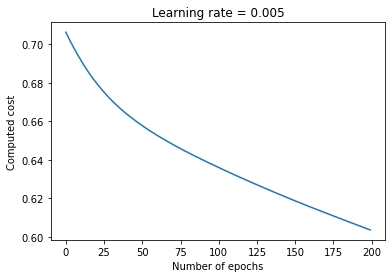

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.681644
Cost/error after epoch 10: 0.678878
Cost/error after epoch 20: 0.676251
Cost/error after epoch 30: 0.673749
Cost/error after epoch 40: 0.671346
Cost/error after epoch 50: 0.669022
Cost/error after epoch 60: 0.666776
Cost/error after epoch 70: 0.664589
Cost/error after epoch 80: 0.662445
Cost/error after epoch 90: 0.660335
Cost/error after epoch 100: 0.658246
Cost/error after epoch 110: 0.656184
Cost/error after epoch 120: 0.654150
Cost/error after epoch 130: 0.652130
Cost/error after epoch 140: 0.650120
Cost/error after epoch 150: 0.648116
Cost/error after epoch 160: 0.646120
Cost/error after epoch 170: 0.644135
Cost/error after epoch 180: 0.642146
Cost/error after epoch 190: 0.640140
Cost/error after all epochs:  0.6383286725132199


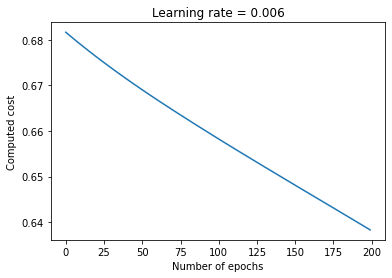

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.682422
Cost/error after epoch 10: 0.676743
Cost/error after epoch 20: 0.671007
Cost/error after epoch 30: 0.665467
Cost/error after epoch 40: 0.660420
Cost/error after epoch 50: 0.655879
Cost/error after epoch 60: 0.651693
Cost/error after epoch 70: 0.647783
Cost/error after epoch 80: 0.644079
Cost/error after epoch 90: 0.640512
Cost/error after epoch 100: 0.637019
Cost/error after epoch 110: 0.633571
Cost/error after epoch 120: 0.630157
Cost/error after epoch 130: 0.626761
Cost/error after epoch 140: 0.623350
Cost/error after epoch 150: 0.619919
Cost/error after epoch 160: 0.616462
Cost/error after epoch 170: 0.612966
Cost/error after epoch 180: 0.609443
Cost/error after epoch 190: 0.605892
Cost/error after all epochs:  0.6026588165206576


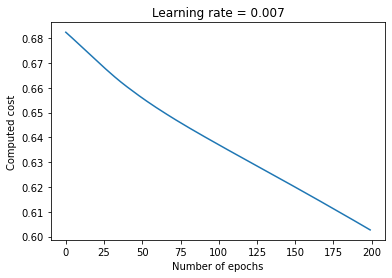

Accuracy
Accuracy: 0.6433566433566433
Cost/error after epoch 0: 0.694203
Cost/error after epoch 10: 0.692712
Cost/error after epoch 20: 0.691285
Cost/error after epoch 30: 0.689920
Cost/error after epoch 40: 0.688614
Cost/error after epoch 50: 0.687352
Cost/error after epoch 60: 0.686135
Cost/error after epoch 70: 0.684955
Cost/error after epoch 80: 0.683800
Cost/error after epoch 90: 0.682651
Cost/error after epoch 100: 0.681497
Cost/error after epoch 110: 0.680278
Cost/error after epoch 120: 0.678882
Cost/error after epoch 130: 0.677185
Cost/error after epoch 140: 0.675102
Cost/error after epoch 150: 0.673068
Cost/error after epoch 160: 0.671245
Cost/error after epoch 170: 0.669601
Cost/error after epoch 180: 0.668090
Cost/error after epoch 190: 0.666700
Cost/error after all epochs:  0.6655266786927085


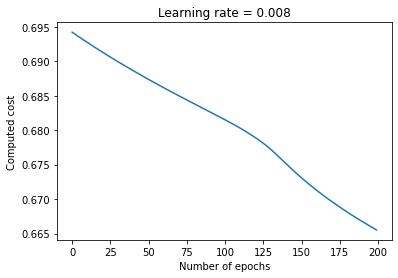

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.701266
Cost/error after epoch 10: 0.695266
Cost/error after epoch 20: 0.689357
Cost/error after epoch 30: 0.683420
Cost/error after epoch 40: 0.677391
Cost/error after epoch 50: 0.671182
Cost/error after epoch 60: 0.665010
Cost/error after epoch 70: 0.658935
Cost/error after epoch 80: 0.652849
Cost/error after epoch 90: 0.646910
Cost/error after epoch 100: 0.641077
Cost/error after epoch 110: 0.635350
Cost/error after epoch 120: 0.629636
Cost/error after epoch 130: 0.623962
Cost/error after epoch 140: 0.618359
Cost/error after epoch 150: 0.612738
Cost/error after epoch 160: 0.607110
Cost/error after epoch 170: 0.601585
Cost/error after epoch 180: 0.596072
Cost/error after epoch 190: 0.590607
Cost/error after all epochs:  0.5856614889830627


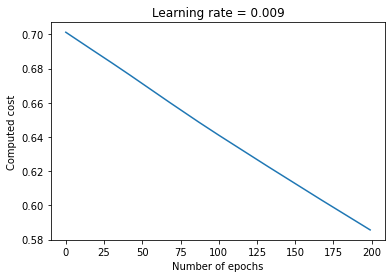

Accuracy
Accuracy: 0.916083916083916
Cost/error after epoch 0: 0.688025
Cost/error after epoch 10: 0.635317
Cost/error after epoch 20: 0.595503
Cost/error after epoch 30: 0.551776
Cost/error after epoch 40: 0.492527
Cost/error after epoch 50: 0.423038
Cost/error after epoch 60: 0.353522
Cost/error after epoch 70: 0.292303
Cost/error after epoch 80: 0.243987
Cost/error after epoch 90: 0.207872
Cost/error after epoch 100: 0.180894
Cost/error after epoch 110: 0.160378
Cost/error after epoch 120: 0.144413
Cost/error after epoch 130: 0.131669
Cost/error after epoch 140: 0.121352
Cost/error after epoch 150: 0.112885
Cost/error after epoch 160: 0.105816
Cost/error after epoch 170: 0.099880
Cost/error after epoch 180: 0.094846
Cost/error after epoch 190: 0.090547
Cost/error after epoch 200: 0.086841
Cost/error after epoch 210: 0.083615
Cost/error after epoch 220: 0.080790
Cost/error after epoch 230: 0.078298
Cost/error after epoch 240: 0.076070
Cost/error after all epochs:  0.07426002716517789

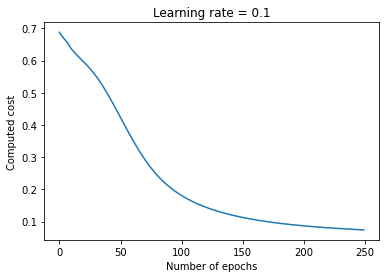

Accuracy
Accuracy: 0.9370629370629371
Cost/error after epoch 0: 0.698702
Cost/error after epoch 10: 0.694746
Cost/error after epoch 20: 0.691044
Cost/error after epoch 30: 0.687564
Cost/error after epoch 40: 0.684192
Cost/error after epoch 50: 0.680915
Cost/error after epoch 60: 0.677772
Cost/error after epoch 70: 0.674746
Cost/error after epoch 80: 0.671963
Cost/error after epoch 90: 0.669387
Cost/error after epoch 100: 0.666983
Cost/error after epoch 110: 0.664729
Cost/error after epoch 120: 0.662600
Cost/error after epoch 130: 0.660557
Cost/error after epoch 140: 0.658588
Cost/error after epoch 150: 0.656665
Cost/error after epoch 160: 0.654788
Cost/error after epoch 170: 0.652954
Cost/error after epoch 180: 0.651152
Cost/error after epoch 190: 0.649361
Cost/error after epoch 200: 0.647572
Cost/error after epoch 210: 0.645777
Cost/error after epoch 220: 0.643970
Cost/error after epoch 230: 0.642146
Cost/error after epoch 240: 0.640302
Cost/error after all epochs:  0.638620173528733


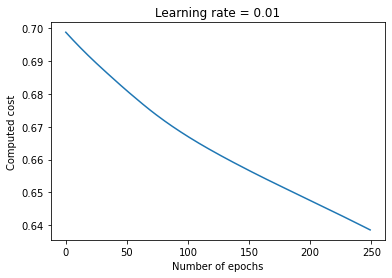

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.687838
Cost/error after epoch 10: 0.677195
Cost/error after epoch 20: 0.668287
Cost/error after epoch 30: 0.660657
Cost/error after epoch 40: 0.654188
Cost/error after epoch 50: 0.648418
Cost/error after epoch 60: 0.643087
Cost/error after epoch 70: 0.638023
Cost/error after epoch 80: 0.633088
Cost/error after epoch 90: 0.628105
Cost/error after epoch 100: 0.622945
Cost/error after epoch 110: 0.617672
Cost/error after epoch 120: 0.612375
Cost/error after epoch 130: 0.606970
Cost/error after epoch 140: 0.601410
Cost/error after epoch 150: 0.595629
Cost/error after epoch 160: 0.589608
Cost/error after epoch 170: 0.583324
Cost/error after epoch 180: 0.576755
Cost/error after epoch 190: 0.569880
Cost/error after epoch 200: 0.562693
Cost/error after epoch 210: 0.555171
Cost/error after epoch 220: 0.547284
Cost/error after epoch 230: 0.539065
Cost/error after epoch 240: 0.530487
Cost/error after all epochs:  0.5224232340807913

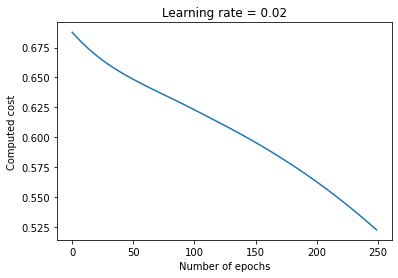

Accuracy
Accuracy: 0.5804195804195804
Cost/error after epoch 0: 0.698950
Cost/error after epoch 10: 0.691639
Cost/error after epoch 20: 0.685860
Cost/error after epoch 30: 0.680964
Cost/error after epoch 40: 0.676475
Cost/error after epoch 50: 0.672486
Cost/error after epoch 60: 0.668942
Cost/error after epoch 70: 0.665776
Cost/error after epoch 80: 0.662836
Cost/error after epoch 90: 0.659989
Cost/error after epoch 100: 0.657172
Cost/error after epoch 110: 0.654358
Cost/error after epoch 120: 0.651553
Cost/error after epoch 130: 0.648698
Cost/error after epoch 140: 0.645712
Cost/error after epoch 150: 0.642528
Cost/error after epoch 160: 0.639169
Cost/error after epoch 170: 0.635625
Cost/error after epoch 180: 0.631829
Cost/error after epoch 190: 0.627709
Cost/error after epoch 200: 0.623207
Cost/error after epoch 210: 0.618252
Cost/error after epoch 220: 0.612767
Cost/error after epoch 230: 0.606697
Cost/error after epoch 240: 0.599956
Cost/error after all epochs:  0.5932120129850863

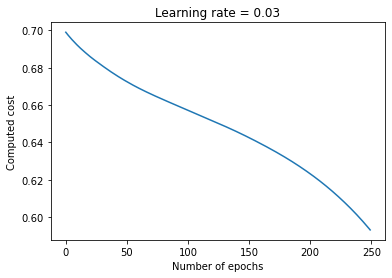

Accuracy
Accuracy: 0.7412587412587412
Cost/error after epoch 0: 0.694545
Cost/error after epoch 10: 0.681109
Cost/error after epoch 20: 0.671901
Cost/error after epoch 30: 0.664814
Cost/error after epoch 40: 0.659165
Cost/error after epoch 50: 0.654345
Cost/error after epoch 60: 0.649888
Cost/error after epoch 70: 0.645480
Cost/error after epoch 80: 0.640921
Cost/error after epoch 90: 0.636041
Cost/error after epoch 100: 0.630655
Cost/error after epoch 110: 0.624574
Cost/error after epoch 120: 0.617653
Cost/error after epoch 130: 0.609684
Cost/error after epoch 140: 0.600491
Cost/error after epoch 150: 0.589897
Cost/error after epoch 160: 0.577724
Cost/error after epoch 170: 0.563886
Cost/error after epoch 180: 0.548363
Cost/error after epoch 190: 0.531087
Cost/error after epoch 200: 0.512349
Cost/error after epoch 210: 0.492282
Cost/error after epoch 220: 0.471251
Cost/error after epoch 230: 0.449799
Cost/error after epoch 240: 0.428581
Cost/error after all epochs:  0.4099891839639955

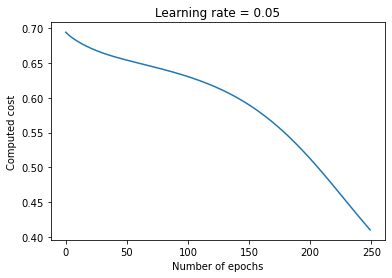

Accuracy
Accuracy: 0.8881118881118881
Cost/error after epoch 0: 0.694256
Cost/error after epoch 10: 0.679863
Cost/error after epoch 20: 0.670820
Cost/error after epoch 30: 0.664006
Cost/error after epoch 40: 0.658554
Cost/error after epoch 50: 0.653673
Cost/error after epoch 60: 0.648976
Cost/error after epoch 70: 0.644504
Cost/error after epoch 80: 0.639770
Cost/error after epoch 90: 0.629963
Cost/error after epoch 100: 0.611341
Cost/error after epoch 110: 0.593395
Cost/error after epoch 120: 0.570879
Cost/error after epoch 130: 0.542116
Cost/error after epoch 140: 0.506089
Cost/error after epoch 150: 0.462069
Cost/error after epoch 160: 0.412050
Cost/error after epoch 170: 0.360946
Cost/error after epoch 180: 0.313904
Cost/error after epoch 190: 0.274247
Cost/error after epoch 200: 0.242001
Cost/error after epoch 210: 0.216314
Cost/error after epoch 220: 0.195804
Cost/error after epoch 230: 0.179234
Cost/error after epoch 240: 0.165544
Cost/error after all epochs:  0.1551073870097005

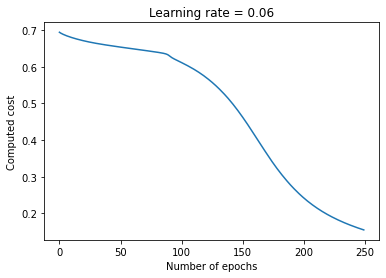

Accuracy
Accuracy: 0.9230769230769231
Cost/error after epoch 0: 0.688921
Cost/error after epoch 10: 0.669060
Cost/error after epoch 20: 0.655567
Cost/error after epoch 30: 0.644177
Cost/error after epoch 40: 0.632191
Cost/error after epoch 50: 0.618191
Cost/error after epoch 60: 0.600300
Cost/error after epoch 70: 0.577071
Cost/error after epoch 80: 0.547051
Cost/error after epoch 90: 0.509675
Cost/error after epoch 100: 0.466210
Cost/error after epoch 110: 0.418665
Cost/error after epoch 120: 0.369327
Cost/error after epoch 130: 0.323382
Cost/error after epoch 140: 0.284243
Cost/error after epoch 150: 0.253352
Cost/error after epoch 160: 0.228734
Cost/error after epoch 170: 0.208832
Cost/error after epoch 180: 0.192578
Cost/error after epoch 190: 0.178931
Cost/error after epoch 200: 0.167239
Cost/error after epoch 210: 0.156989
Cost/error after epoch 220: 0.147992
Cost/error after epoch 230: 0.140058
Cost/error after epoch 240: 0.132982
Cost/error after all epochs:  0.1272653637304157

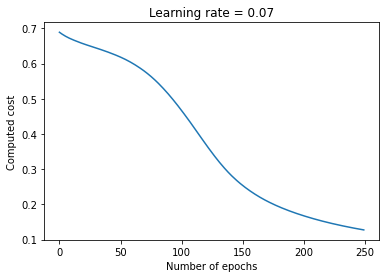

Accuracy
Accuracy: 0.9370629370629371
Cost/error after epoch 0: 0.708760
Cost/error after epoch 10: 0.670725
Cost/error after epoch 20: 0.649298
Cost/error after epoch 30: 0.629977
Cost/error after epoch 40: 0.608961
Cost/error after epoch 50: 0.584757
Cost/error after epoch 60: 0.556601
Cost/error after epoch 70: 0.524368
Cost/error after epoch 80: 0.489068
Cost/error after epoch 90: 0.452716
Cost/error after epoch 100: 0.417432
Cost/error after epoch 110: 0.384815
Cost/error after epoch 120: 0.355438
Cost/error after epoch 130: 0.329277
Cost/error after epoch 140: 0.306184
Cost/error after epoch 150: 0.285780
Cost/error after epoch 160: 0.267848
Cost/error after epoch 170: 0.252132
Cost/error after epoch 180: 0.238092
Cost/error after epoch 190: 0.225433
Cost/error after epoch 200: 0.213988
Cost/error after epoch 210: 0.203550
Cost/error after epoch 220: 0.193984
Cost/error after epoch 230: 0.185196
Cost/error after epoch 240: 0.177085
Cost/error after all epochs:  0.1703269890029130

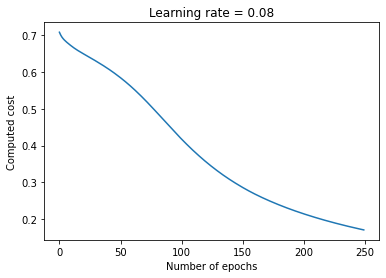

Accuracy
Accuracy: 0.9230769230769231
Cost/error after epoch 0: 0.698308
Cost/error after epoch 10: 0.676548
Cost/error after epoch 20: 0.660854
Cost/error after epoch 30: 0.645749
Cost/error after epoch 40: 0.628063
Cost/error after epoch 50: 0.607860
Cost/error after epoch 60: 0.582779
Cost/error after epoch 70: 0.550999
Cost/error after epoch 80: 0.510966
Cost/error after epoch 90: 0.463095
Cost/error after epoch 100: 0.409773
Cost/error after epoch 110: 0.356809
Cost/error after epoch 120: 0.309701
Cost/error after epoch 130: 0.270683
Cost/error after epoch 140: 0.239626
Cost/error after epoch 150: 0.215040
Cost/error after epoch 160: 0.195162
Cost/error after epoch 170: 0.178317
Cost/error after epoch 180: 0.163622
Cost/error after epoch 190: 0.150857
Cost/error after epoch 200: 0.139853
Cost/error after epoch 210: 0.130451
Cost/error after epoch 220: 0.122453
Cost/error after epoch 230: 0.115639
Cost/error after epoch 240: 0.109813
Cost/error after all epochs:  0.1052702780527502

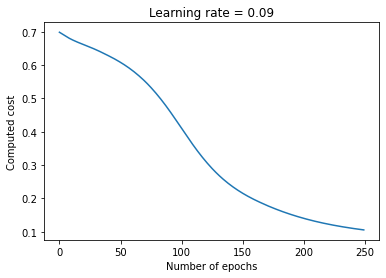

Accuracy
Accuracy: 0.9370629370629371
Cost/error after epoch 0: 0.702144
Cost/error after epoch 10: 0.701435
Cost/error after epoch 20: 0.700726
Cost/error after epoch 30: 0.700022
Cost/error after epoch 40: 0.699318
Cost/error after epoch 50: 0.698625
Cost/error after epoch 60: 0.697952
Cost/error after epoch 70: 0.697299
Cost/error after epoch 80: 0.696673
Cost/error after epoch 90: 0.696055
Cost/error after epoch 100: 0.695449
Cost/error after epoch 110: 0.694864
Cost/error after epoch 120: 0.694284
Cost/error after epoch 130: 0.693737
Cost/error after epoch 140: 0.693201
Cost/error after epoch 150: 0.692681
Cost/error after epoch 160: 0.692180
Cost/error after epoch 170: 0.691696
Cost/error after epoch 180: 0.691222
Cost/error after epoch 190: 0.690747
Cost/error after epoch 200: 0.690277
Cost/error after epoch 210: 0.689803
Cost/error after epoch 220: 0.689334
Cost/error after epoch 230: 0.688873
Cost/error after epoch 240: 0.688416
Cost/error after all epochs:  0.6880144290130752

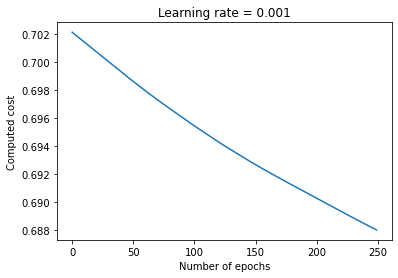

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.698488
Cost/error after epoch 10: 0.697797
Cost/error after epoch 20: 0.697117
Cost/error after epoch 30: 0.696449
Cost/error after epoch 40: 0.695795
Cost/error after epoch 50: 0.695153
Cost/error after epoch 60: 0.694519
Cost/error after epoch 70: 0.693900
Cost/error after epoch 80: 0.693297
Cost/error after epoch 90: 0.692700
Cost/error after epoch 100: 0.692100
Cost/error after epoch 110: 0.691513
Cost/error after epoch 120: 0.690930
Cost/error after epoch 130: 0.690352
Cost/error after epoch 140: 0.689785
Cost/error after epoch 150: 0.689218
Cost/error after epoch 160: 0.688658
Cost/error after epoch 170: 0.688112
Cost/error after epoch 180: 0.687575
Cost/error after epoch 190: 0.687043
Cost/error after epoch 200: 0.686520
Cost/error after epoch 210: 0.686010
Cost/error after epoch 220: 0.685497
Cost/error after epoch 230: 0.684978
Cost/error after epoch 240: 0.684460
Cost/error after all epochs:  0.6839945735811758

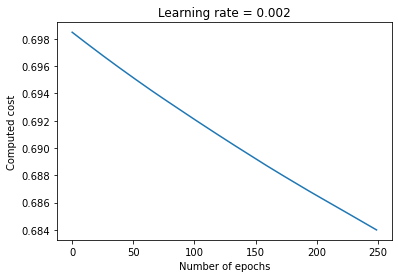

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.693983
Cost/error after epoch 10: 0.691495
Cost/error after epoch 20: 0.689139
Cost/error after epoch 30: 0.686902
Cost/error after epoch 40: 0.684763
Cost/error after epoch 50: 0.682709
Cost/error after epoch 60: 0.680736
Cost/error after epoch 70: 0.678843
Cost/error after epoch 80: 0.677014
Cost/error after epoch 90: 0.675254
Cost/error after epoch 100: 0.673557
Cost/error after epoch 110: 0.671912
Cost/error after epoch 120: 0.670311
Cost/error after epoch 130: 0.668742
Cost/error after epoch 140: 0.667209
Cost/error after epoch 150: 0.665707
Cost/error after epoch 160: 0.664234
Cost/error after epoch 170: 0.662787
Cost/error after epoch 180: 0.661357
Cost/error after epoch 190: 0.659948
Cost/error after epoch 200: 0.658563
Cost/error after epoch 210: 0.657202
Cost/error after epoch 220: 0.655866
Cost/error after epoch 230: 0.654549
Cost/error after epoch 240: 0.653246
Cost/error after all epochs:  0.6520845895721177

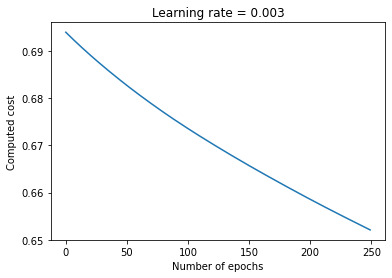

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.698296
Cost/error after epoch 10: 0.696164
Cost/error after epoch 20: 0.694131
Cost/error after epoch 30: 0.692317
Cost/error after epoch 40: 0.690835
Cost/error after epoch 50: 0.689598
Cost/error after epoch 60: 0.688522
Cost/error after epoch 70: 0.687561
Cost/error after epoch 80: 0.686656
Cost/error after epoch 90: 0.685800
Cost/error after epoch 100: 0.684980
Cost/error after epoch 110: 0.684187
Cost/error after epoch 120: 0.683427
Cost/error after epoch 130: 0.682694
Cost/error after epoch 140: 0.681985
Cost/error after epoch 150: 0.681293
Cost/error after epoch 160: 0.680616
Cost/error after epoch 170: 0.679957
Cost/error after epoch 180: 0.679314
Cost/error after epoch 190: 0.678687
Cost/error after epoch 200: 0.678072
Cost/error after epoch 210: 0.677468
Cost/error after epoch 220: 0.676877
Cost/error after epoch 230: 0.676298
Cost/error after epoch 240: 0.675727
Cost/error after all epochs:  0.6752221076465326

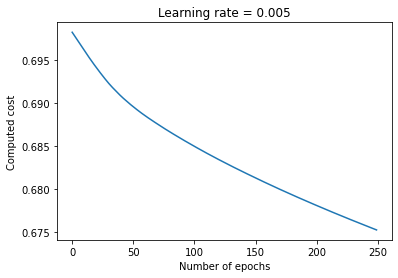

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.685023
Cost/error after epoch 10: 0.681746
Cost/error after epoch 20: 0.678431
Cost/error after epoch 30: 0.675036
Cost/error after epoch 40: 0.671620
Cost/error after epoch 50: 0.668225
Cost/error after epoch 60: 0.664751
Cost/error after epoch 70: 0.661295
Cost/error after epoch 80: 0.657828
Cost/error after epoch 90: 0.654384
Cost/error after epoch 100: 0.650978
Cost/error after epoch 110: 0.647635
Cost/error after epoch 120: 0.644386
Cost/error after epoch 130: 0.641168
Cost/error after epoch 140: 0.637983
Cost/error after epoch 150: 0.634841
Cost/error after epoch 160: 0.631720
Cost/error after epoch 170: 0.628585
Cost/error after epoch 180: 0.625459
Cost/error after epoch 190: 0.622347
Cost/error after epoch 200: 0.619256
Cost/error after epoch 210: 0.616189
Cost/error after epoch 220: 0.613133
Cost/error after epoch 230: 0.610072
Cost/error after epoch 240: 0.607006
Cost/error after all epochs:  0.6042557877789168

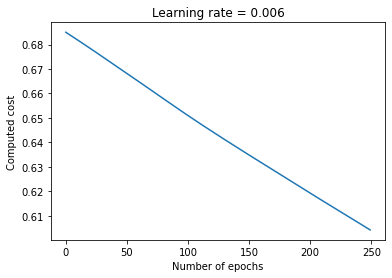

Accuracy
Accuracy: 0.5734265734265734
Cost/error after epoch 0: 0.684452
Cost/error after epoch 10: 0.682399
Cost/error after epoch 20: 0.680348
Cost/error after epoch 30: 0.678249
Cost/error after epoch 40: 0.676081
Cost/error after epoch 50: 0.673786
Cost/error after epoch 60: 0.671313
Cost/error after epoch 70: 0.668549
Cost/error after epoch 80: 0.665415
Cost/error after epoch 90: 0.661977
Cost/error after epoch 100: 0.658484
Cost/error after epoch 110: 0.655063
Cost/error after epoch 120: 0.651699
Cost/error after epoch 130: 0.648405
Cost/error after epoch 140: 0.645242
Cost/error after epoch 150: 0.642153
Cost/error after epoch 160: 0.639122
Cost/error after epoch 170: 0.636138
Cost/error after epoch 180: 0.633168
Cost/error after epoch 190: 0.630138
Cost/error after epoch 200: 0.627088
Cost/error after epoch 210: 0.624011
Cost/error after epoch 220: 0.620914
Cost/error after epoch 230: 0.617816
Cost/error after epoch 240: 0.614687
Cost/error after all epochs:  0.6118281474309505

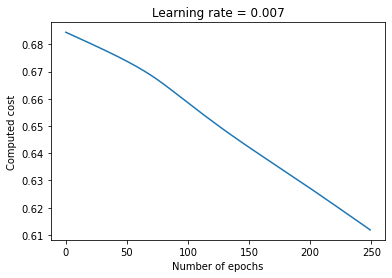

Accuracy
Accuracy: 0.5314685314685315
Cost/error after epoch 0: 0.696605
Cost/error after epoch 10: 0.694339
Cost/error after epoch 20: 0.692118
Cost/error after epoch 30: 0.689916
Cost/error after epoch 40: 0.687746
Cost/error after epoch 50: 0.685558
Cost/error after epoch 60: 0.683411
Cost/error after epoch 70: 0.681230
Cost/error after epoch 80: 0.679108
Cost/error after epoch 90: 0.677088
Cost/error after epoch 100: 0.675164
Cost/error after epoch 110: 0.673372
Cost/error after epoch 120: 0.671684
Cost/error after epoch 130: 0.670073
Cost/error after epoch 140: 0.668547
Cost/error after epoch 150: 0.667078
Cost/error after epoch 160: 0.665657
Cost/error after epoch 170: 0.664280
Cost/error after epoch 180: 0.662935
Cost/error after epoch 190: 0.661621
Cost/error after epoch 200: 0.660334
Cost/error after epoch 210: 0.659074
Cost/error after epoch 220: 0.657834
Cost/error after epoch 230: 0.656610
Cost/error after epoch 240: 0.655399
Cost/error after all epochs:  0.6543194614217815

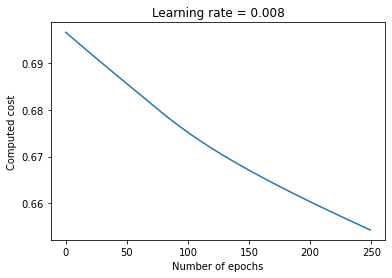

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.701013
Cost/error after epoch 10: 0.698237
Cost/error after epoch 20: 0.695702
Cost/error after epoch 30: 0.693257
Cost/error after epoch 40: 0.690680
Cost/error after epoch 50: 0.688037
Cost/error after epoch 60: 0.685326
Cost/error after epoch 70: 0.682841
Cost/error after epoch 80: 0.680195
Cost/error after epoch 90: 0.677676
Cost/error after epoch 100: 0.675029
Cost/error after epoch 110: 0.672299
Cost/error after epoch 120: 0.669356
Cost/error after epoch 130: 0.666437
Cost/error after epoch 140: 0.663519
Cost/error after epoch 150: 0.660646
Cost/error after epoch 160: 0.657860
Cost/error after epoch 170: 0.654855
Cost/error after epoch 180: 0.651848
Cost/error after epoch 190: 0.648935
Cost/error after epoch 200: 0.646062
Cost/error after epoch 210: 0.643106
Cost/error after epoch 220: 0.640201
Cost/error after epoch 230: 0.637362
Cost/error after epoch 240: 0.634579
Cost/error after all epochs:  0.6320558292714771

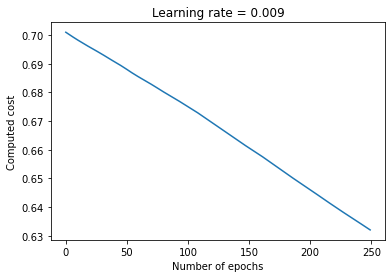

Accuracy
Accuracy: 0.5524475524475525
Cost/error after epoch 0: 0.699756
Cost/error after epoch 10: 0.648575
Cost/error after epoch 20: 0.612818
Cost/error after epoch 30: 0.571695
Cost/error after epoch 40: 0.520486
Cost/error after epoch 50: 0.457909
Cost/error after epoch 60: 0.387627
Cost/error after epoch 70: 0.319978
Cost/error after epoch 80: 0.264020
Cost/error after epoch 90: 0.222375
Cost/error after epoch 100: 0.191977
Cost/error after epoch 110: 0.169377
Cost/error after epoch 120: 0.152043
Cost/error after epoch 130: 0.138264
Cost/error after epoch 140: 0.127042
Cost/error after epoch 150: 0.117710
Cost/error after epoch 160: 0.110025
Cost/error after epoch 170: 0.103595
Cost/error after epoch 180: 0.098105
Cost/error after epoch 190: 0.093381
Cost/error after epoch 200: 0.089302
Cost/error after epoch 210: 0.085747
Cost/error after epoch 220: 0.082638
Cost/error after epoch 230: 0.079893
Cost/error after epoch 240: 0.077468
Cost/error after epoch 250: 0.075293
Cost/error 

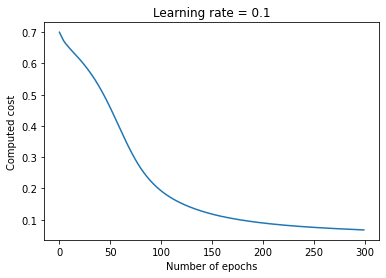

Accuracy
Accuracy: 0.944055944055944
Cost/error after epoch 0: 0.694487
Cost/error after epoch 10: 0.692677
Cost/error after epoch 20: 0.691000
Cost/error after epoch 30: 0.689439
Cost/error after epoch 40: 0.687972
Cost/error after epoch 50: 0.686582
Cost/error after epoch 60: 0.685263
Cost/error after epoch 70: 0.684007
Cost/error after epoch 80: 0.682811
Cost/error after epoch 90: 0.681672
Cost/error after epoch 100: 0.680588
Cost/error after epoch 110: 0.679552
Cost/error after epoch 120: 0.678564
Cost/error after epoch 130: 0.677620
Cost/error after epoch 140: 0.676717
Cost/error after epoch 150: 0.675853
Cost/error after epoch 160: 0.675026
Cost/error after epoch 170: 0.674233
Cost/error after epoch 180: 0.673474
Cost/error after epoch 190: 0.672746
Cost/error after epoch 200: 0.672048
Cost/error after epoch 210: 0.671376
Cost/error after epoch 220: 0.670731
Cost/error after epoch 230: 0.670110
Cost/error after epoch 240: 0.669511
Cost/error after epoch 250: 0.668934
Cost/error a

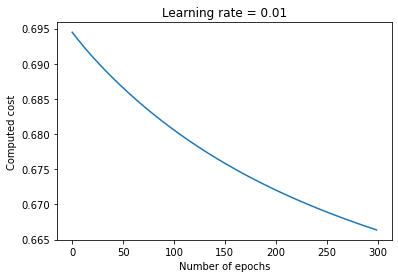

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.699157
Cost/error after epoch 10: 0.693572
Cost/error after epoch 20: 0.688923
Cost/error after epoch 30: 0.684993
Cost/error after epoch 40: 0.681557
Cost/error after epoch 50: 0.678506
Cost/error after epoch 60: 0.675761
Cost/error after epoch 70: 0.673253
Cost/error after epoch 80: 0.670955
Cost/error after epoch 90: 0.668832
Cost/error after epoch 100: 0.666847
Cost/error after epoch 110: 0.664933
Cost/error after epoch 120: 0.663078
Cost/error after epoch 130: 0.661263
Cost/error after epoch 140: 0.659386
Cost/error after epoch 150: 0.657468
Cost/error after epoch 160: 0.655520
Cost/error after epoch 170: 0.653529
Cost/error after epoch 180: 0.651474
Cost/error after epoch 190: 0.649372
Cost/error after epoch 200: 0.647212
Cost/error after epoch 210: 0.644971
Cost/error after epoch 220: 0.642632
Cost/error after epoch 230: 0.640177
Cost/error after epoch 240: 0.637604
Cost/error after epoch 250: 0.634898
Cost/error 

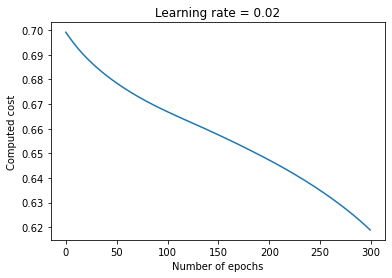

Accuracy
Accuracy: 0.6923076923076923
Cost/error after epoch 0: 0.704578
Cost/error after epoch 10: 0.684593
Cost/error after epoch 20: 0.672231
Cost/error after epoch 30: 0.663860
Cost/error after epoch 40: 0.656055
Cost/error after epoch 50: 0.648251
Cost/error after epoch 60: 0.640229
Cost/error after epoch 70: 0.631765
Cost/error after epoch 80: 0.622650
Cost/error after epoch 90: 0.612846
Cost/error after epoch 100: 0.602334
Cost/error after epoch 110: 0.591030
Cost/error after epoch 120: 0.578824
Cost/error after epoch 130: 0.565746
Cost/error after epoch 140: 0.551858
Cost/error after epoch 150: 0.537194
Cost/error after epoch 160: 0.521914
Cost/error after epoch 170: 0.506208
Cost/error after epoch 180: 0.490132
Cost/error after epoch 190: 0.473809
Cost/error after epoch 200: 0.457454
Cost/error after epoch 210: 0.441195
Cost/error after epoch 220: 0.425106
Cost/error after epoch 230: 0.409290
Cost/error after epoch 240: 0.393921
Cost/error after epoch 250: 0.379025
Cost/error 

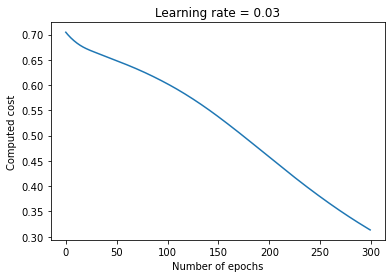

Accuracy
Accuracy: 0.9370629370629371
Cost/error after epoch 0: 0.686750
Cost/error after epoch 10: 0.644465
Cost/error after epoch 20: 0.621504
Cost/error after epoch 30: 0.598700
Cost/error after epoch 40: 0.573881
Cost/error after epoch 50: 0.545873
Cost/error after epoch 60: 0.514514
Cost/error after epoch 70: 0.479730
Cost/error after epoch 80: 0.442802
Cost/error after epoch 90: 0.404754
Cost/error after epoch 100: 0.367945
Cost/error after epoch 110: 0.333941
Cost/error after epoch 120: 0.303299
Cost/error after epoch 130: 0.276447
Cost/error after epoch 140: 0.253312
Cost/error after epoch 150: 0.233489
Cost/error after epoch 160: 0.216411
Cost/error after epoch 170: 0.201576
Cost/error after epoch 180: 0.188595
Cost/error after epoch 190: 0.177183
Cost/error after epoch 200: 0.167202
Cost/error after epoch 210: 0.158369
Cost/error after epoch 220: 0.150511
Cost/error after epoch 230: 0.143516
Cost/error after epoch 240: 0.137242
Cost/error after epoch 250: 0.131584
Cost/error 

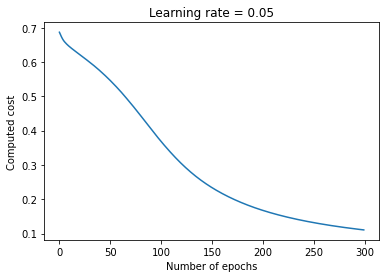

Accuracy
Accuracy: 0.951048951048951
Cost/error after epoch 0: 0.685917
Cost/error after epoch 10: 0.662766
Cost/error after epoch 20: 0.643868
Cost/error after epoch 30: 0.626851
Cost/error after epoch 40: 0.610610
Cost/error after epoch 50: 0.594065
Cost/error after epoch 60: 0.576484
Cost/error after epoch 70: 0.557437
Cost/error after epoch 80: 0.537171
Cost/error after epoch 90: 0.515677
Cost/error after epoch 100: 0.493455
Cost/error after epoch 110: 0.471160
Cost/error after epoch 120: 0.449180
Cost/error after epoch 130: 0.427093
Cost/error after epoch 140: 0.404301
Cost/error after epoch 150: 0.379543
Cost/error after epoch 160: 0.349887
Cost/error after epoch 170: 0.316761
Cost/error after epoch 180: 0.284659
Cost/error after epoch 190: 0.256241
Cost/error after epoch 200: 0.231461
Cost/error after epoch 210: 0.210254
Cost/error after epoch 220: 0.191938
Cost/error after epoch 230: 0.176193
Cost/error after epoch 240: 0.162685
Cost/error after epoch 250: 0.151138
Cost/error a

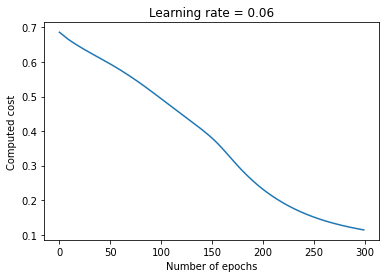

Accuracy
Accuracy: 0.9300699300699301
Cost/error after epoch 0: 0.675747
Cost/error after epoch 10: 0.635375
Cost/error after epoch 20: 0.579033
Cost/error after epoch 30: 0.514496
Cost/error after epoch 40: 0.446652
Cost/error after epoch 50: 0.384141
Cost/error after epoch 60: 0.329794
Cost/error after epoch 70: 0.285455
Cost/error after epoch 80: 0.250840
Cost/error after epoch 90: 0.224084
Cost/error after epoch 100: 0.203250
Cost/error after epoch 110: 0.186785
Cost/error after epoch 120: 0.173280
Cost/error after epoch 130: 0.162095
Cost/error after epoch 140: 0.152749
Cost/error after epoch 150: 0.144755
Cost/error after epoch 160: 0.137841
Cost/error after epoch 170: 0.131760
Cost/error after epoch 180: 0.126342
Cost/error after epoch 190: 0.121504
Cost/error after epoch 200: 0.117155
Cost/error after epoch 210: 0.113240
Cost/error after epoch 220: 0.109681
Cost/error after epoch 230: 0.106437
Cost/error after epoch 240: 0.103473
Cost/error after epoch 250: 0.100749
Cost/error 

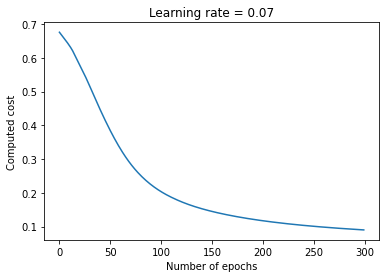

Accuracy
Accuracy: 0.951048951048951
Cost/error after epoch 0: 0.682835
Cost/error after epoch 10: 0.650551
Cost/error after epoch 20: 0.626498
Cost/error after epoch 30: 0.601420
Cost/error after epoch 40: 0.572789
Cost/error after epoch 50: 0.539452
Cost/error after epoch 60: 0.500808
Cost/error after epoch 70: 0.457730
Cost/error after epoch 80: 0.412076
Cost/error after epoch 90: 0.366850
Cost/error after epoch 100: 0.324729
Cost/error after epoch 110: 0.287494
Cost/error after epoch 120: 0.255634
Cost/error after epoch 130: 0.228875
Cost/error after epoch 140: 0.206629
Cost/error after epoch 150: 0.188134
Cost/error after epoch 160: 0.172631
Cost/error after epoch 170: 0.159583
Cost/error after epoch 180: 0.148539
Cost/error after epoch 190: 0.139080
Cost/error after epoch 200: 0.130891
Cost/error after epoch 210: 0.123747
Cost/error after epoch 220: 0.117469
Cost/error after epoch 230: 0.111932
Cost/error after epoch 240: 0.107003
Cost/error after epoch 250: 0.102587
Cost/error a

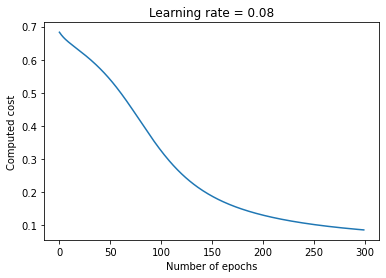

Accuracy
Accuracy: 0.9300699300699301
Cost/error after epoch 0: 0.684828
Cost/error after epoch 10: 0.635692
Cost/error after epoch 20: 0.603523
Cost/error after epoch 30: 0.567573
Cost/error after epoch 40: 0.525147
Cost/error after epoch 50: 0.475974
Cost/error after epoch 60: 0.422016
Cost/error after epoch 70: 0.367730
Cost/error after epoch 80: 0.317519
Cost/error after epoch 90: 0.273886
Cost/error after epoch 100: 0.238146
Cost/error after epoch 110: 0.209555
Cost/error after epoch 120: 0.186936
Cost/error after epoch 130: 0.168970
Cost/error after epoch 140: 0.154607
Cost/error after epoch 150: 0.142897
Cost/error after epoch 160: 0.133204
Cost/error after epoch 170: 0.125075
Cost/error after epoch 180: 0.118181
Cost/error after epoch 190: 0.112283
Cost/error after epoch 200: 0.107174
Cost/error after epoch 210: 0.102704
Cost/error after epoch 220: 0.098772
Cost/error after epoch 230: 0.095280
Cost/error after epoch 240: 0.092165
Cost/error after epoch 250: 0.089369
Cost/error 

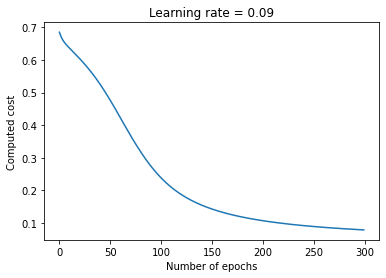

Accuracy
Accuracy: 0.93006993006993
Cost/error after epoch 0: 0.702480
Cost/error after epoch 10: 0.702059
Cost/error after epoch 20: 0.701644
Cost/error after epoch 30: 0.701229
Cost/error after epoch 40: 0.700816
Cost/error after epoch 50: 0.700398
Cost/error after epoch 60: 0.699984
Cost/error after epoch 70: 0.699576
Cost/error after epoch 80: 0.699173
Cost/error after epoch 90: 0.698774
Cost/error after epoch 100: 0.698374
Cost/error after epoch 110: 0.697980
Cost/error after epoch 120: 0.697598
Cost/error after epoch 130: 0.697221
Cost/error after epoch 140: 0.696841
Cost/error after epoch 150: 0.696462
Cost/error after epoch 160: 0.696086
Cost/error after epoch 170: 0.695720
Cost/error after epoch 180: 0.695365
Cost/error after epoch 190: 0.695021
Cost/error after epoch 200: 0.694681
Cost/error after epoch 210: 0.694345
Cost/error after epoch 220: 0.694017
Cost/error after epoch 230: 0.693700
Cost/error after epoch 240: 0.693391
Cost/error after epoch 250: 0.693089
Cost/error af

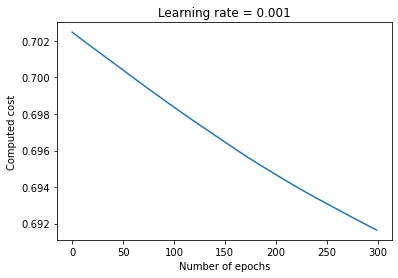

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.690910
Cost/error after epoch 10: 0.690134
Cost/error after epoch 20: 0.689379
Cost/error after epoch 30: 0.688650
Cost/error after epoch 40: 0.687946
Cost/error after epoch 50: 0.687253
Cost/error after epoch 60: 0.686569
Cost/error after epoch 70: 0.685900
Cost/error after epoch 80: 0.685247
Cost/error after epoch 90: 0.684607
Cost/error after epoch 100: 0.683981
Cost/error after epoch 110: 0.683355
Cost/error after epoch 120: 0.682738
Cost/error after epoch 130: 0.682130
Cost/error after epoch 140: 0.681531
Cost/error after epoch 150: 0.680941
Cost/error after epoch 160: 0.680364
Cost/error after epoch 170: 0.679797
Cost/error after epoch 180: 0.679242
Cost/error after epoch 190: 0.678695
Cost/error after epoch 200: 0.678155
Cost/error after epoch 210: 0.677621
Cost/error after epoch 220: 0.677099
Cost/error after epoch 230: 0.676586
Cost/error after epoch 240: 0.676083
Cost/error after epoch 250: 0.675587
Cost/error 

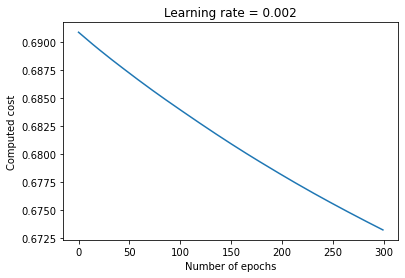

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.688410
Cost/error after epoch 10: 0.687431
Cost/error after epoch 20: 0.686506
Cost/error after epoch 30: 0.685624
Cost/error after epoch 40: 0.684769
Cost/error after epoch 50: 0.683944
Cost/error after epoch 60: 0.683143
Cost/error after epoch 70: 0.682366
Cost/error after epoch 80: 0.681607
Cost/error after epoch 90: 0.680864
Cost/error after epoch 100: 0.680135
Cost/error after epoch 110: 0.679416
Cost/error after epoch 120: 0.678706
Cost/error after epoch 130: 0.678001
Cost/error after epoch 140: 0.677300
Cost/error after epoch 150: 0.676604
Cost/error after epoch 160: 0.675912
Cost/error after epoch 170: 0.675229
Cost/error after epoch 180: 0.674555
Cost/error after epoch 190: 0.673886
Cost/error after epoch 200: 0.673227
Cost/error after epoch 210: 0.672573
Cost/error after epoch 220: 0.671922
Cost/error after epoch 230: 0.671277
Cost/error after epoch 240: 0.670638
Cost/error after epoch 250: 0.670008
Cost/error 

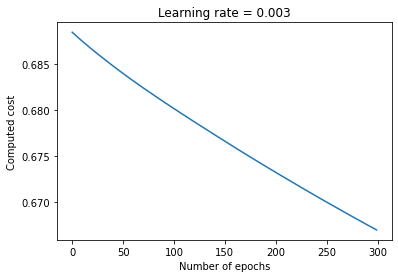

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.691602
Cost/error after epoch 10: 0.690205
Cost/error after epoch 20: 0.688841
Cost/error after epoch 30: 0.687437
Cost/error after epoch 40: 0.686035
Cost/error after epoch 50: 0.684630
Cost/error after epoch 60: 0.683121
Cost/error after epoch 70: 0.681435
Cost/error after epoch 80: 0.679718
Cost/error after epoch 90: 0.678052
Cost/error after epoch 100: 0.676439
Cost/error after epoch 110: 0.674833
Cost/error after epoch 120: 0.673243
Cost/error after epoch 130: 0.671673
Cost/error after epoch 140: 0.670160
Cost/error after epoch 150: 0.668668
Cost/error after epoch 160: 0.667179
Cost/error after epoch 170: 0.665640
Cost/error after epoch 180: 0.664211
Cost/error after epoch 190: 0.662882
Cost/error after epoch 200: 0.661577
Cost/error after epoch 210: 0.660287
Cost/error after epoch 220: 0.658994
Cost/error after epoch 230: 0.657692
Cost/error after epoch 240: 0.656420
Cost/error after epoch 250: 0.655195
Cost/error 

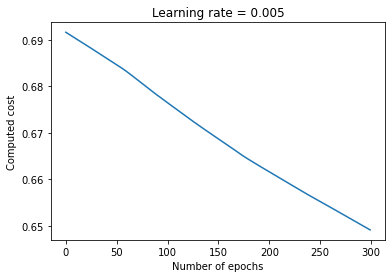

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.711381
Cost/error after epoch 10: 0.705674
Cost/error after epoch 20: 0.700570
Cost/error after epoch 30: 0.696013
Cost/error after epoch 40: 0.691930
Cost/error after epoch 50: 0.688255
Cost/error after epoch 60: 0.684927
Cost/error after epoch 70: 0.681888
Cost/error after epoch 80: 0.679136
Cost/error after epoch 90: 0.676664
Cost/error after epoch 100: 0.674423
Cost/error after epoch 110: 0.672378
Cost/error after epoch 120: 0.670502
Cost/error after epoch 130: 0.668798
Cost/error after epoch 140: 0.667224
Cost/error after epoch 150: 0.665765
Cost/error after epoch 160: 0.664400
Cost/error after epoch 170: 0.663114
Cost/error after epoch 180: 0.661880
Cost/error after epoch 190: 0.660683
Cost/error after epoch 200: 0.659530
Cost/error after epoch 210: 0.658412
Cost/error after epoch 220: 0.657333
Cost/error after epoch 230: 0.656293
Cost/error after epoch 240: 0.655270
Cost/error after epoch 250: 0.654266
Cost/error 

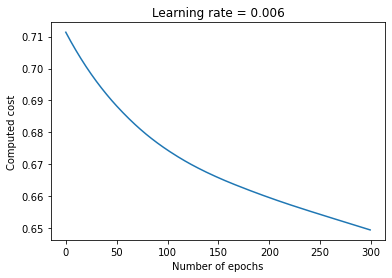

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.701896
Cost/error after epoch 10: 0.698623
Cost/error after epoch 20: 0.695608
Cost/error after epoch 30: 0.692851
Cost/error after epoch 40: 0.690312
Cost/error after epoch 50: 0.687961
Cost/error after epoch 60: 0.685788
Cost/error after epoch 70: 0.683732
Cost/error after epoch 80: 0.681765
Cost/error after epoch 90: 0.679891
Cost/error after epoch 100: 0.678103
Cost/error after epoch 110: 0.676393
Cost/error after epoch 120: 0.674756
Cost/error after epoch 130: 0.673204
Cost/error after epoch 140: 0.671699
Cost/error after epoch 150: 0.670252
Cost/error after epoch 160: 0.668879
Cost/error after epoch 170: 0.667560
Cost/error after epoch 180: 0.666284
Cost/error after epoch 190: 0.665028
Cost/error after epoch 200: 0.663796
Cost/error after epoch 210: 0.662585
Cost/error after epoch 220: 0.661392
Cost/error after epoch 230: 0.660227
Cost/error after epoch 240: 0.659091
Cost/error after epoch 250: 0.657978
Cost/error 

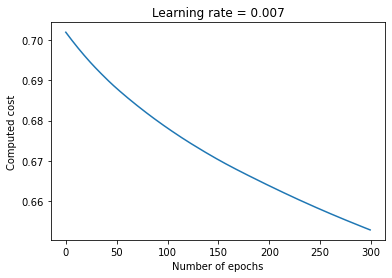

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.689847
Cost/error after epoch 10: 0.688038
Cost/error after epoch 20: 0.685646
Cost/error after epoch 30: 0.681780
Cost/error after epoch 40: 0.675350
Cost/error after epoch 50: 0.670645
Cost/error after epoch 60: 0.667783
Cost/error after epoch 70: 0.665533
Cost/error after epoch 80: 0.663503
Cost/error after epoch 90: 0.661596
Cost/error after epoch 100: 0.659748
Cost/error after epoch 110: 0.657902
Cost/error after epoch 120: 0.656014
Cost/error after epoch 130: 0.654042
Cost/error after epoch 140: 0.651962
Cost/error after epoch 150: 0.649620
Cost/error after epoch 160: 0.646961
Cost/error after epoch 170: 0.643722
Cost/error after epoch 180: 0.639783
Cost/error after epoch 190: 0.635632
Cost/error after epoch 200: 0.631890
Cost/error after epoch 210: 0.628947
Cost/error after epoch 220: 0.626528
Cost/error after epoch 230: 0.624351
Cost/error after epoch 240: 0.622237
Cost/error after epoch 250: 0.620179
Cost/error 

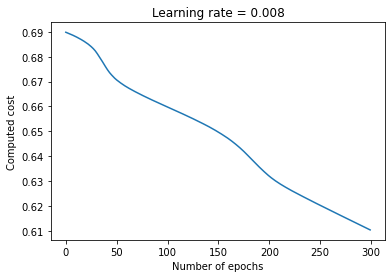

Accuracy
Accuracy: 0.8321678321678321
Cost/error after epoch 0: 0.681929
Cost/error after epoch 10: 0.672449
Cost/error after epoch 20: 0.664369
Cost/error after epoch 30: 0.657421
Cost/error after epoch 40: 0.651152
Cost/error after epoch 50: 0.645353
Cost/error after epoch 60: 0.639784
Cost/error after epoch 70: 0.634350
Cost/error after epoch 80: 0.629043
Cost/error after epoch 90: 0.623806
Cost/error after epoch 100: 0.618643
Cost/error after epoch 110: 0.613488
Cost/error after epoch 120: 0.608332
Cost/error after epoch 130: 0.603211
Cost/error after epoch 140: 0.598085
Cost/error after epoch 150: 0.592915
Cost/error after epoch 160: 0.587696
Cost/error after epoch 170: 0.582474
Cost/error after epoch 180: 0.577228
Cost/error after epoch 190: 0.571948
Cost/error after epoch 200: 0.566634
Cost/error after epoch 210: 0.561273
Cost/error after epoch 220: 0.555856
Cost/error after epoch 230: 0.550382
Cost/error after epoch 240: 0.544862
Cost/error after epoch 250: 0.539297
Cost/error 

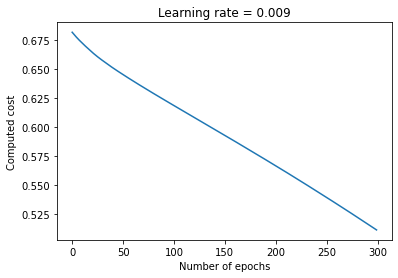

Accuracy
Accuracy: 0.6363636363636364
Cost/error after epoch 0: 0.688820
Cost/error after epoch 10: 0.674737
Cost/error after epoch 20: 0.666158
Cost/error after epoch 30: 0.659928
Cost/error after epoch 40: 0.654585
Cost/error after epoch 50: 0.649147
Cost/error after epoch 60: 0.642595
Cost/error after epoch 70: 0.633733
Cost/error after epoch 80: 0.621739
Cost/error after epoch 90: 0.605937
Cost/error after epoch 100: 0.582287
Cost/error after epoch 110: 0.548308
Cost/error after epoch 120: 0.510064
Cost/error after epoch 130: 0.466256
Cost/error after epoch 140: 0.420233
Cost/error after epoch 150: 0.372392
Cost/error after epoch 160: 0.324490
Cost/error after epoch 170: 0.280008
Cost/error after epoch 180: 0.241854
Cost/error after epoch 190: 0.209717
Cost/error after epoch 200: 0.184997
Cost/error after epoch 210: 0.166025
Cost/error after epoch 220: 0.151118
Cost/error after epoch 230: 0.139084
Cost/error after epoch 240: 0.129163
Cost/error after epoch 250: 0.120929
Cost/error 

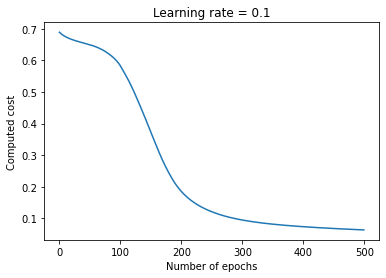

Accuracy
Accuracy: 0.9440559440559441
Cost/error after epoch 0: 0.721923
Cost/error after epoch 10: 0.710609
Cost/error after epoch 20: 0.702055
Cost/error after epoch 30: 0.695357
Cost/error after epoch 40: 0.689717
Cost/error after epoch 50: 0.684716
Cost/error after epoch 60: 0.680116
Cost/error after epoch 70: 0.675742
Cost/error after epoch 80: 0.671652
Cost/error after epoch 90: 0.667926
Cost/error after epoch 100: 0.664542
Cost/error after epoch 110: 0.661327
Cost/error after epoch 120: 0.658296
Cost/error after epoch 130: 0.655373
Cost/error after epoch 140: 0.652553
Cost/error after epoch 150: 0.649795
Cost/error after epoch 160: 0.647089
Cost/error after epoch 170: 0.644420
Cost/error after epoch 180: 0.641777
Cost/error after epoch 190: 0.639149
Cost/error after epoch 200: 0.636507
Cost/error after epoch 210: 0.633829
Cost/error after epoch 220: 0.631153
Cost/error after epoch 230: 0.628466
Cost/error after epoch 240: 0.625776
Cost/error after epoch 250: 0.623074
Cost/error 

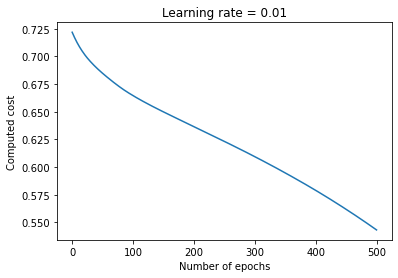

Accuracy
Accuracy: 0.4475524475524475
Cost/error after epoch 0: 0.694826
Cost/error after epoch 10: 0.688245
Cost/error after epoch 20: 0.682802
Cost/error after epoch 30: 0.678274
Cost/error after epoch 40: 0.674371
Cost/error after epoch 50: 0.670943
Cost/error after epoch 60: 0.667848
Cost/error after epoch 70: 0.664965
Cost/error after epoch 80: 0.662154
Cost/error after epoch 90: 0.659165
Cost/error after epoch 100: 0.655856
Cost/error after epoch 110: 0.652491
Cost/error after epoch 120: 0.649022
Cost/error after epoch 130: 0.645263
Cost/error after epoch 140: 0.640848
Cost/error after epoch 150: 0.635780
Cost/error after epoch 160: 0.630092
Cost/error after epoch 170: 0.623704
Cost/error after epoch 180: 0.616574
Cost/error after epoch 190: 0.608982
Cost/error after epoch 200: 0.601541
Cost/error after epoch 210: 0.594084
Cost/error after epoch 220: 0.586508
Cost/error after epoch 230: 0.578722
Cost/error after epoch 240: 0.570578
Cost/error after epoch 250: 0.562083
Cost/error 

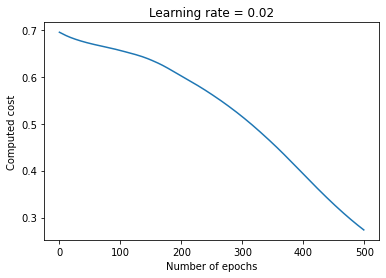

Accuracy
Accuracy: 0.93006993006993
Cost/error after epoch 0: 0.694117
Cost/error after epoch 10: 0.683335
Cost/error after epoch 20: 0.674094
Cost/error after epoch 30: 0.665168
Cost/error after epoch 40: 0.656651
Cost/error after epoch 50: 0.647797
Cost/error after epoch 60: 0.638309
Cost/error after epoch 70: 0.628447
Cost/error after epoch 80: 0.617768
Cost/error after epoch 90: 0.606033
Cost/error after epoch 100: 0.593287
Cost/error after epoch 110: 0.579625
Cost/error after epoch 120: 0.564823
Cost/error after epoch 130: 0.548764
Cost/error after epoch 140: 0.531570
Cost/error after epoch 150: 0.513036
Cost/error after epoch 160: 0.493190
Cost/error after epoch 170: 0.472249
Cost/error after epoch 180: 0.450372
Cost/error after epoch 190: 0.427782
Cost/error after epoch 200: 0.404882
Cost/error after epoch 210: 0.382040
Cost/error after epoch 220: 0.359705
Cost/error after epoch 230: 0.338261
Cost/error after epoch 240: 0.317940
Cost/error after epoch 250: 0.298923
Cost/error af

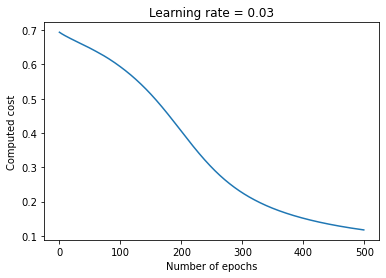

Accuracy
Accuracy: 0.9300699300699301
Cost/error after epoch 0: 0.705068
Cost/error after epoch 10: 0.671347
Cost/error after epoch 20: 0.647122
Cost/error after epoch 30: 0.624379
Cost/error after epoch 40: 0.600652
Cost/error after epoch 50: 0.578354
Cost/error after epoch 60: 0.557125
Cost/error after epoch 70: 0.536063
Cost/error after epoch 80: 0.515448
Cost/error after epoch 90: 0.495468
Cost/error after epoch 100: 0.476246
Cost/error after epoch 110: 0.458117
Cost/error after epoch 120: 0.440786
Cost/error after epoch 130: 0.424465
Cost/error after epoch 140: 0.408970
Cost/error after epoch 150: 0.394192
Cost/error after epoch 160: 0.380042
Cost/error after epoch 170: 0.366685
Cost/error after epoch 180: 0.353748
Cost/error after epoch 190: 0.341400
Cost/error after epoch 200: 0.329635
Cost/error after epoch 210: 0.318288
Cost/error after epoch 220: 0.307354
Cost/error after epoch 230: 0.296821
Cost/error after epoch 240: 0.286685
Cost/error after epoch 250: 0.276900
Cost/error 

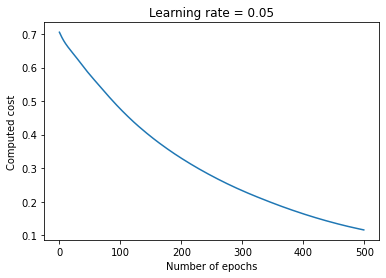

Accuracy
Accuracy: 0.944055944055944
Cost/error after epoch 0: 0.699022
Cost/error after epoch 10: 0.682951
Cost/error after epoch 20: 0.672507
Cost/error after epoch 30: 0.664892
Cost/error after epoch 40: 0.658549
Cost/error after epoch 50: 0.652497
Cost/error after epoch 60: 0.645961
Cost/error after epoch 70: 0.638236
Cost/error after epoch 80: 0.628668
Cost/error after epoch 90: 0.616479
Cost/error after epoch 100: 0.600706
Cost/error after epoch 110: 0.580412
Cost/error after epoch 120: 0.555027
Cost/error after epoch 130: 0.524372
Cost/error after epoch 140: 0.489129
Cost/error after epoch 150: 0.450627
Cost/error after epoch 160: 0.410823
Cost/error after epoch 170: 0.371489
Cost/error after epoch 180: 0.334537
Cost/error after epoch 190: 0.301094
Cost/error after epoch 200: 0.271462
Cost/error after epoch 210: 0.245658
Cost/error after epoch 220: 0.223379
Cost/error after epoch 230: 0.204320
Cost/error after epoch 240: 0.188051
Cost/error after epoch 250: 0.174151
Cost/error a

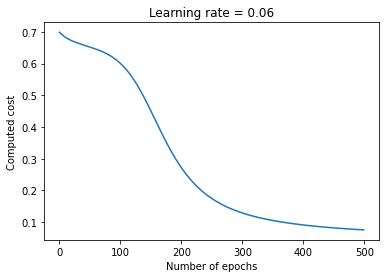

Accuracy
Accuracy: 0.93006993006993
Cost/error after epoch 0: 0.700271
Cost/error after epoch 10: 0.668107
Cost/error after epoch 20: 0.640245
Cost/error after epoch 30: 0.616045
Cost/error after epoch 40: 0.591783
Cost/error after epoch 50: 0.564788
Cost/error after epoch 60: 0.534074
Cost/error after epoch 70: 0.499769
Cost/error after epoch 80: 0.461837
Cost/error after epoch 90: 0.420752
Cost/error after epoch 100: 0.376993
Cost/error after epoch 110: 0.332650
Cost/error after epoch 120: 0.290573
Cost/error after epoch 130: 0.253450
Cost/error after epoch 140: 0.222459
Cost/error after epoch 150: 0.197222
Cost/error after epoch 160: 0.176965
Cost/error after epoch 170: 0.160587
Cost/error after epoch 180: 0.147243
Cost/error after epoch 190: 0.136239
Cost/error after epoch 200: 0.127090
Cost/error after epoch 210: 0.119395
Cost/error after epoch 220: 0.112847
Cost/error after epoch 230: 0.107229
Cost/error after epoch 240: 0.102355
Cost/error after epoch 250: 0.098097
Cost/error af

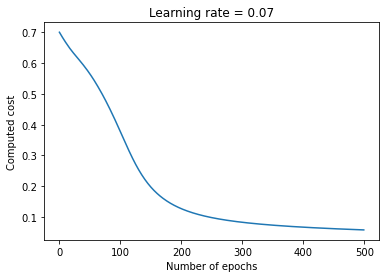

Accuracy
Accuracy: 0.937062937062937
Cost/error after epoch 0: 0.693920
Cost/error after epoch 10: 0.672455
Cost/error after epoch 20: 0.655152
Cost/error after epoch 30: 0.638266
Cost/error after epoch 40: 0.620081
Cost/error after epoch 50: 0.599474
Cost/error after epoch 60: 0.575390
Cost/error after epoch 70: 0.546951
Cost/error after epoch 80: 0.512434
Cost/error after epoch 90: 0.458564
Cost/error after epoch 100: 0.402948
Cost/error after epoch 110: 0.353820
Cost/error after epoch 120: 0.310720
Cost/error after epoch 130: 0.273320
Cost/error after epoch 140: 0.241911
Cost/error after epoch 150: 0.215887
Cost/error after epoch 160: 0.194373
Cost/error after epoch 170: 0.176593
Cost/error after epoch 180: 0.161684
Cost/error after epoch 190: 0.148981
Cost/error after epoch 200: 0.138164
Cost/error after epoch 210: 0.128880
Cost/error after epoch 220: 0.120789
Cost/error after epoch 230: 0.113792
Cost/error after epoch 240: 0.107688
Cost/error after epoch 250: 0.102340
Cost/error a

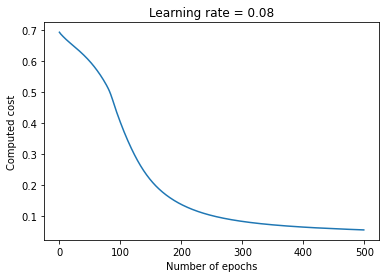

Accuracy
Accuracy: 0.937062937062937
Cost/error after epoch 0: 0.693715
Cost/error after epoch 10: 0.669925
Cost/error after epoch 20: 0.640303
Cost/error after epoch 30: 0.605336
Cost/error after epoch 40: 0.566969
Cost/error after epoch 50: 0.519790
Cost/error after epoch 60: 0.463944
Cost/error after epoch 70: 0.403169
Cost/error after epoch 80: 0.344100
Cost/error after epoch 90: 0.292978
Cost/error after epoch 100: 0.252187
Cost/error after epoch 110: 0.220783
Cost/error after epoch 120: 0.196437
Cost/error after epoch 130: 0.177089
Cost/error after epoch 140: 0.161317
Cost/error after epoch 150: 0.148230
Cost/error after epoch 160: 0.137168
Cost/error after epoch 170: 0.127708
Cost/error after epoch 180: 0.119547
Cost/error after epoch 190: 0.112474
Cost/error after epoch 200: 0.106350
Cost/error after epoch 210: 0.101058
Cost/error after epoch 220: 0.096462
Cost/error after epoch 230: 0.092438
Cost/error after epoch 240: 0.088890
Cost/error after epoch 250: 0.085746
Cost/error a

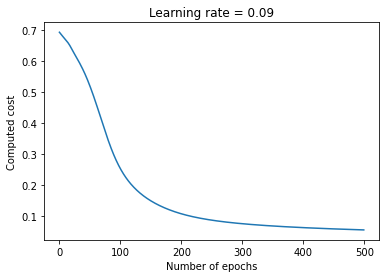

Accuracy
Accuracy: 0.937062937062937
Cost/error after epoch 0: 0.687421
Cost/error after epoch 10: 0.687019
Cost/error after epoch 20: 0.686624
Cost/error after epoch 30: 0.686232
Cost/error after epoch 40: 0.685848
Cost/error after epoch 50: 0.685470
Cost/error after epoch 60: 0.685098
Cost/error after epoch 70: 0.684734
Cost/error after epoch 80: 0.684375
Cost/error after epoch 90: 0.684021
Cost/error after epoch 100: 0.683674
Cost/error after epoch 110: 0.683334
Cost/error after epoch 120: 0.682998
Cost/error after epoch 130: 0.682663
Cost/error after epoch 140: 0.682331
Cost/error after epoch 150: 0.682002
Cost/error after epoch 160: 0.681672
Cost/error after epoch 170: 0.681340
Cost/error after epoch 180: 0.681010
Cost/error after epoch 190: 0.680680
Cost/error after epoch 200: 0.680349
Cost/error after epoch 210: 0.680019
Cost/error after epoch 220: 0.679686
Cost/error after epoch 230: 0.679350
Cost/error after epoch 240: 0.679013
Cost/error after epoch 250: 0.678673
Cost/error a

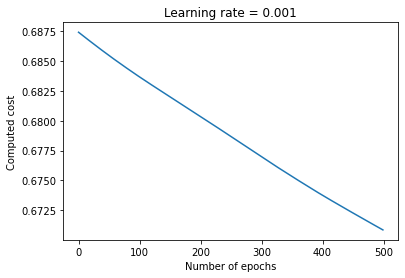

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.695419
Cost/error after epoch 10: 0.694626
Cost/error after epoch 20: 0.693886
Cost/error after epoch 30: 0.693203
Cost/error after epoch 40: 0.692569
Cost/error after epoch 50: 0.691979
Cost/error after epoch 60: 0.691427
Cost/error after epoch 70: 0.690912
Cost/error after epoch 80: 0.690426
Cost/error after epoch 90: 0.689960
Cost/error after epoch 100: 0.689512
Cost/error after epoch 110: 0.689076
Cost/error after epoch 120: 0.688652
Cost/error after epoch 130: 0.688236
Cost/error after epoch 140: 0.687829
Cost/error after epoch 150: 0.687436
Cost/error after epoch 160: 0.687052
Cost/error after epoch 170: 0.686678
Cost/error after epoch 180: 0.686309
Cost/error after epoch 190: 0.685946
Cost/error after epoch 200: 0.685589
Cost/error after epoch 210: 0.685240
Cost/error after epoch 220: 0.684897
Cost/error after epoch 230: 0.684564
Cost/error after epoch 240: 0.684241
Cost/error after epoch 250: 0.683924
Cost/error 

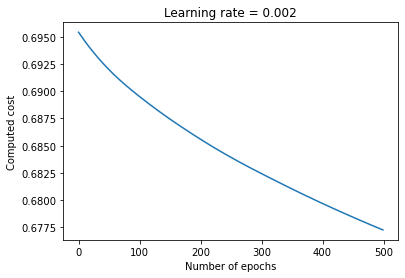

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.692744
Cost/error after epoch 10: 0.691713
Cost/error after epoch 20: 0.690742
Cost/error after epoch 30: 0.689823
Cost/error after epoch 40: 0.688947
Cost/error after epoch 50: 0.688098
Cost/error after epoch 60: 0.687279
Cost/error after epoch 70: 0.686493
Cost/error after epoch 80: 0.685741
Cost/error after epoch 90: 0.685007
Cost/error after epoch 100: 0.684292
Cost/error after epoch 110: 0.683591
Cost/error after epoch 120: 0.682908
Cost/error after epoch 130: 0.682238
Cost/error after epoch 140: 0.681584
Cost/error after epoch 150: 0.680933
Cost/error after epoch 160: 0.680295
Cost/error after epoch 170: 0.679667
Cost/error after epoch 180: 0.679052
Cost/error after epoch 190: 0.678443
Cost/error after epoch 200: 0.677840
Cost/error after epoch 210: 0.677239
Cost/error after epoch 220: 0.676640
Cost/error after epoch 230: 0.676043
Cost/error after epoch 240: 0.675447
Cost/error after epoch 250: 0.674848
Cost/error 

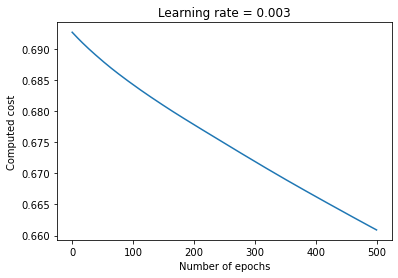

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.701248
Cost/error after epoch 10: 0.699547
Cost/error after epoch 20: 0.697813
Cost/error after epoch 30: 0.696095
Cost/error after epoch 40: 0.694354
Cost/error after epoch 50: 0.692753
Cost/error after epoch 60: 0.691198
Cost/error after epoch 70: 0.689714
Cost/error after epoch 80: 0.688272
Cost/error after epoch 90: 0.686899
Cost/error after epoch 100: 0.685702
Cost/error after epoch 110: 0.684567
Cost/error after epoch 120: 0.683543
Cost/error after epoch 130: 0.682577
Cost/error after epoch 140: 0.681658
Cost/error after epoch 150: 0.680760
Cost/error after epoch 160: 0.679898
Cost/error after epoch 170: 0.679062
Cost/error after epoch 180: 0.678250
Cost/error after epoch 190: 0.677482
Cost/error after epoch 200: 0.676748
Cost/error after epoch 210: 0.676034
Cost/error after epoch 220: 0.675331
Cost/error after epoch 230: 0.674629
Cost/error after epoch 240: 0.673926
Cost/error after epoch 250: 0.673243
Cost/error 

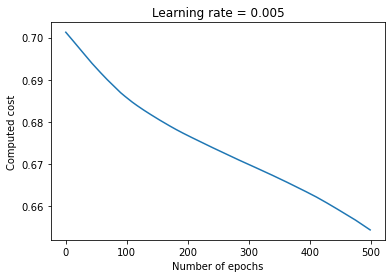

Accuracy
Accuracy: 0.38461538461538464
Cost/error after epoch 0: 0.696493
Cost/error after epoch 10: 0.690004
Cost/error after epoch 20: 0.684274
Cost/error after epoch 30: 0.679128
Cost/error after epoch 40: 0.674537
Cost/error after epoch 50: 0.670501
Cost/error after epoch 60: 0.666906
Cost/error after epoch 70: 0.663716
Cost/error after epoch 80: 0.660823
Cost/error after epoch 90: 0.658192
Cost/error after epoch 100: 0.655808
Cost/error after epoch 110: 0.653610
Cost/error after epoch 120: 0.651570
Cost/error after epoch 130: 0.649626
Cost/error after epoch 140: 0.647741
Cost/error after epoch 150: 0.645897
Cost/error after epoch 160: 0.644090
Cost/error after epoch 170: 0.642303
Cost/error after epoch 180: 0.640536
Cost/error after epoch 190: 0.638783
Cost/error after epoch 200: 0.637044
Cost/error after epoch 210: 0.635315
Cost/error after epoch 220: 0.633589
Cost/error after epoch 230: 0.631865
Cost/error after epoch 240: 0.630139
Cost/error after epoch 250: 0.628407
Cost/error

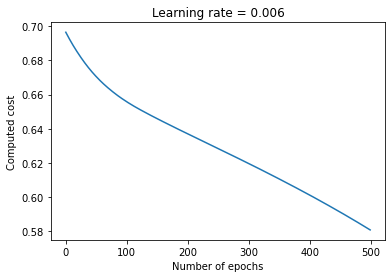

Accuracy
Accuracy: 0.4125874125874126
Cost/error after epoch 0: 0.687991
Cost/error after epoch 10: 0.685325
Cost/error after epoch 20: 0.682617
Cost/error after epoch 30: 0.679804
Cost/error after epoch 40: 0.676919
Cost/error after epoch 50: 0.674114
Cost/error after epoch 60: 0.671236
Cost/error after epoch 70: 0.668300
Cost/error after epoch 80: 0.665317
Cost/error after epoch 90: 0.662280
Cost/error after epoch 100: 0.659177
Cost/error after epoch 110: 0.655953
Cost/error after epoch 120: 0.652595
Cost/error after epoch 130: 0.649094
Cost/error after epoch 140: 0.645493
Cost/error after epoch 150: 0.641778
Cost/error after epoch 160: 0.638081
Cost/error after epoch 170: 0.634387
Cost/error after epoch 180: 0.630637
Cost/error after epoch 190: 0.626945
Cost/error after epoch 200: 0.623262
Cost/error after epoch 210: 0.619563
Cost/error after epoch 220: 0.615865
Cost/error after epoch 230: 0.612162
Cost/error after epoch 240: 0.608415
Cost/error after epoch 250: 0.604593
Cost/error 

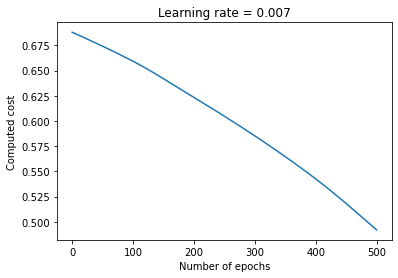

Accuracy
Accuracy: 0.7552447552447552
Cost/error after epoch 0: 0.692672
Cost/error after epoch 10: 0.690945
Cost/error after epoch 20: 0.689310
Cost/error after epoch 30: 0.687721
Cost/error after epoch 40: 0.686226
Cost/error after epoch 50: 0.684808
Cost/error after epoch 60: 0.683483
Cost/error after epoch 70: 0.682231
Cost/error after epoch 80: 0.681036
Cost/error after epoch 90: 0.679888
Cost/error after epoch 100: 0.678775
Cost/error after epoch 110: 0.677696
Cost/error after epoch 120: 0.676628
Cost/error after epoch 130: 0.675585
Cost/error after epoch 140: 0.674551
Cost/error after epoch 150: 0.673548
Cost/error after epoch 160: 0.672558
Cost/error after epoch 170: 0.671596
Cost/error after epoch 180: 0.670639
Cost/error after epoch 190: 0.669700
Cost/error after epoch 200: 0.668762
Cost/error after epoch 210: 0.667814
Cost/error after epoch 220: 0.666876
Cost/error after epoch 230: 0.665964
Cost/error after epoch 240: 0.665074
Cost/error after epoch 250: 0.664206
Cost/error 

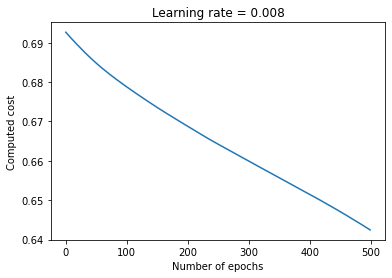

Accuracy
Accuracy: 0.5734265734265733
Cost/error after epoch 0: 0.697058
Cost/error after epoch 10: 0.695597
Cost/error after epoch 20: 0.694194
Cost/error after epoch 30: 0.692847
Cost/error after epoch 40: 0.691551
Cost/error after epoch 50: 0.690304
Cost/error after epoch 60: 0.689104
Cost/error after epoch 70: 0.687947
Cost/error after epoch 80: 0.686827
Cost/error after epoch 90: 0.685741
Cost/error after epoch 100: 0.684689
Cost/error after epoch 110: 0.683667
Cost/error after epoch 120: 0.682674
Cost/error after epoch 130: 0.681708
Cost/error after epoch 140: 0.680765
Cost/error after epoch 150: 0.679846
Cost/error after epoch 160: 0.678947
Cost/error after epoch 170: 0.678068
Cost/error after epoch 180: 0.677207
Cost/error after epoch 190: 0.676362
Cost/error after epoch 200: 0.675533
Cost/error after epoch 210: 0.674719
Cost/error after epoch 220: 0.673918
Cost/error after epoch 230: 0.673129
Cost/error after epoch 240: 0.672350
Cost/error after epoch 250: 0.671580
Cost/error 

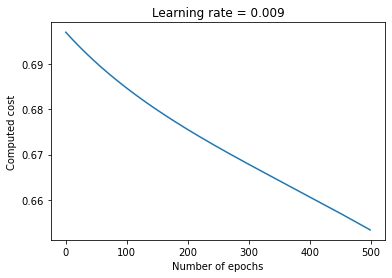

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.688737
Cost/error after epoch 10: 0.665159
Cost/error after epoch 20: 0.651506
Cost/error after epoch 30: 0.640313
Cost/error after epoch 40: 0.628561
Cost/error after epoch 50: 0.613999
Cost/error after epoch 60: 0.591844
Cost/error after epoch 70: 0.561684
Cost/error after epoch 80: 0.519890
Cost/error after epoch 90: 0.465534
Cost/error after epoch 100: 0.402175
Cost/error after epoch 110: 0.338522
Cost/error after epoch 120: 0.283653
Cost/error after epoch 130: 0.241158
Cost/error after epoch 140: 0.209797
Cost/error after epoch 150: 0.186571
Cost/error after epoch 160: 0.168869
Cost/error after epoch 170: 0.154917
Cost/error after epoch 180: 0.143565
Cost/error after epoch 190: 0.134094
Cost/error after epoch 200: 0.126045
Cost/error after epoch 210: 0.119104
Cost/error after epoch 220: 0.113060
Cost/error after epoch 230: 0.107780
Cost/error after epoch 240: 0.103132
Cost/error after epoch 250: 0.099006
Cost/error 

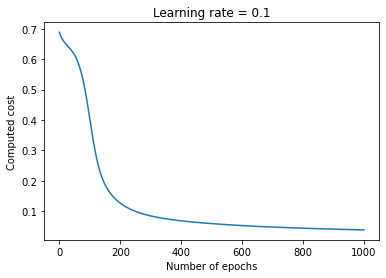

Accuracy
Accuracy: 0.8671328671328671
Cost/error after epoch 0: 0.693586
Cost/error after epoch 10: 0.690414
Cost/error after epoch 20: 0.687540
Cost/error after epoch 30: 0.684875
Cost/error after epoch 40: 0.682259
Cost/error after epoch 50: 0.679644
Cost/error after epoch 60: 0.677060
Cost/error after epoch 70: 0.674513
Cost/error after epoch 80: 0.671967
Cost/error after epoch 90: 0.669462
Cost/error after epoch 100: 0.666981
Cost/error after epoch 110: 0.664505
Cost/error after epoch 120: 0.662013
Cost/error after epoch 130: 0.659542
Cost/error after epoch 140: 0.657097
Cost/error after epoch 150: 0.654639
Cost/error after epoch 160: 0.652173
Cost/error after epoch 170: 0.649671
Cost/error after epoch 180: 0.647167
Cost/error after epoch 190: 0.644657
Cost/error after epoch 200: 0.642129
Cost/error after epoch 210: 0.639571
Cost/error after epoch 220: 0.636987
Cost/error after epoch 230: 0.634357
Cost/error after epoch 240: 0.631693
Cost/error after epoch 250: 0.628985
Cost/error 

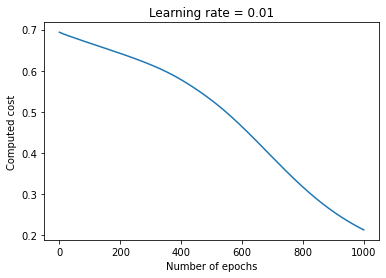

Accuracy
Accuracy: 0.9300699300699301
Cost/error after epoch 0: 0.687818
Cost/error after epoch 10: 0.679794
Cost/error after epoch 20: 0.672424
Cost/error after epoch 30: 0.665550
Cost/error after epoch 40: 0.659019
Cost/error after epoch 50: 0.652669
Cost/error after epoch 60: 0.646369
Cost/error after epoch 70: 0.640045
Cost/error after epoch 80: 0.633552
Cost/error after epoch 90: 0.626838
Cost/error after epoch 100: 0.619831
Cost/error after epoch 110: 0.612472
Cost/error after epoch 120: 0.604754
Cost/error after epoch 130: 0.596600
Cost/error after epoch 140: 0.587915
Cost/error after epoch 150: 0.578785
Cost/error after epoch 160: 0.569362
Cost/error after epoch 170: 0.559496
Cost/error after epoch 180: 0.549054
Cost/error after epoch 190: 0.538067
Cost/error after epoch 200: 0.526589
Cost/error after epoch 210: 0.514639
Cost/error after epoch 220: 0.502263
Cost/error after epoch 230: 0.489400
Cost/error after epoch 240: 0.476094
Cost/error after epoch 250: 0.462449
Cost/error 

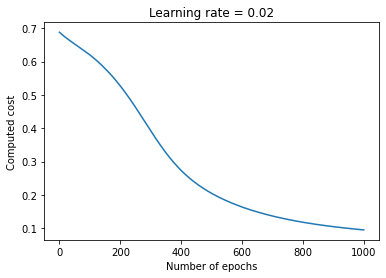

Accuracy
Accuracy: 0.9440559440559441
Cost/error after epoch 0: 0.695136
Cost/error after epoch 10: 0.689159
Cost/error after epoch 20: 0.684216
Cost/error after epoch 30: 0.680095
Cost/error after epoch 40: 0.676672
Cost/error after epoch 50: 0.673788
Cost/error after epoch 60: 0.671319
Cost/error after epoch 70: 0.669169
Cost/error after epoch 80: 0.667252
Cost/error after epoch 90: 0.665507
Cost/error after epoch 100: 0.663898
Cost/error after epoch 110: 0.662432
Cost/error after epoch 120: 0.661094
Cost/error after epoch 130: 0.659821
Cost/error after epoch 140: 0.658597
Cost/error after epoch 150: 0.657392
Cost/error after epoch 160: 0.656146
Cost/error after epoch 170: 0.654881
Cost/error after epoch 180: 0.653591
Cost/error after epoch 190: 0.652243
Cost/error after epoch 200: 0.650805
Cost/error after epoch 210: 0.649212
Cost/error after epoch 220: 0.647498
Cost/error after epoch 230: 0.645638
Cost/error after epoch 240: 0.643568
Cost/error after epoch 250: 0.641272
Cost/error 

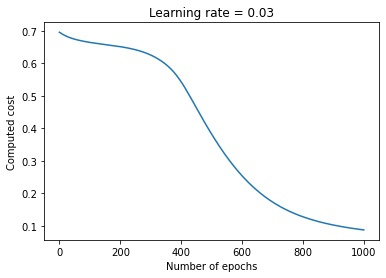

Accuracy
Accuracy: 0.9370629370629371
Cost/error after epoch 0: 0.683974
Cost/error after epoch 10: 0.673036
Cost/error after epoch 20: 0.662518
Cost/error after epoch 30: 0.651192
Cost/error after epoch 40: 0.638184
Cost/error after epoch 50: 0.624537
Cost/error after epoch 60: 0.609190
Cost/error after epoch 70: 0.591606
Cost/error after epoch 80: 0.571118
Cost/error after epoch 90: 0.547266
Cost/error after epoch 100: 0.519922
Cost/error after epoch 110: 0.488891
Cost/error after epoch 120: 0.454334
Cost/error after epoch 130: 0.417022
Cost/error after epoch 140: 0.378778
Cost/error after epoch 150: 0.341226
Cost/error after epoch 160: 0.307105
Cost/error after epoch 170: 0.277519
Cost/error after epoch 180: 0.251787
Cost/error after epoch 190: 0.229717
Cost/error after epoch 200: 0.210987
Cost/error after epoch 210: 0.195092
Cost/error after epoch 220: 0.181562
Cost/error after epoch 230: 0.169963
Cost/error after epoch 240: 0.159935
Cost/error after epoch 250: 0.151234
Cost/error 

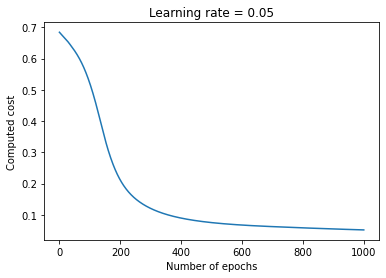

Accuracy
Accuracy: 0.923076923076923
Cost/error after epoch 0: 0.683616
Cost/error after epoch 10: 0.671559
Cost/error after epoch 20: 0.661754
Cost/error after epoch 30: 0.652886
Cost/error after epoch 40: 0.643965
Cost/error after epoch 50: 0.634272
Cost/error after epoch 60: 0.623182
Cost/error after epoch 70: 0.610385
Cost/error after epoch 80: 0.596032
Cost/error after epoch 90: 0.580131
Cost/error after epoch 100: 0.562315
Cost/error after epoch 110: 0.542706
Cost/error after epoch 120: 0.521283
Cost/error after epoch 130: 0.498172
Cost/error after epoch 140: 0.473562
Cost/error after epoch 150: 0.448237
Cost/error after epoch 160: 0.422172
Cost/error after epoch 170: 0.396288
Cost/error after epoch 180: 0.371017
Cost/error after epoch 190: 0.346002
Cost/error after epoch 200: 0.321326
Cost/error after epoch 210: 0.296997
Cost/error after epoch 220: 0.273337
Cost/error after epoch 230: 0.250869
Cost/error after epoch 240: 0.230013
Cost/error after epoch 250: 0.211085
Cost/error a

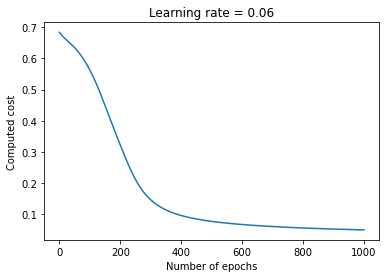

Accuracy
Accuracy: 0.916083916083916
Cost/error after epoch 0: 0.700695
Cost/error after epoch 10: 0.666245
Cost/error after epoch 20: 0.647129
Cost/error after epoch 30: 0.634093
Cost/error after epoch 40: 0.621290
Cost/error after epoch 50: 0.607206
Cost/error after epoch 60: 0.590553
Cost/error after epoch 70: 0.569744
Cost/error after epoch 80: 0.545214
Cost/error after epoch 90: 0.517463
Cost/error after epoch 100: 0.485884
Cost/error after epoch 110: 0.450413
Cost/error after epoch 120: 0.411856
Cost/error after epoch 130: 0.371493
Cost/error after epoch 140: 0.330999
Cost/error after epoch 150: 0.292332
Cost/error after epoch 160: 0.257349
Cost/error after epoch 170: 0.227202
Cost/error after epoch 180: 0.201959
Cost/error after epoch 190: 0.181175
Cost/error after epoch 200: 0.164138
Cost/error after epoch 210: 0.150123
Cost/error after epoch 220: 0.138462
Cost/error after epoch 230: 0.128644
Cost/error after epoch 240: 0.120250
Cost/error after epoch 250: 0.112941
Cost/error a

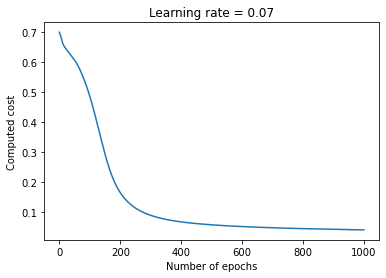

Accuracy
Accuracy: 0.881118881118881
Cost/error after epoch 0: 0.672475
Cost/error after epoch 10: 0.583143
Cost/error after epoch 20: 0.505036
Cost/error after epoch 30: 0.433305
Cost/error after epoch 40: 0.368227
Cost/error after epoch 50: 0.312459
Cost/error after epoch 60: 0.267450
Cost/error after epoch 70: 0.232137
Cost/error after epoch 80: 0.204578
Cost/error after epoch 90: 0.182682
Cost/error after epoch 100: 0.165136
Cost/error after epoch 110: 0.150818
Cost/error after epoch 120: 0.139004
Cost/error after epoch 130: 0.129083
Cost/error after epoch 140: 0.120626
Cost/error after epoch 150: 0.113360
Cost/error after epoch 160: 0.107144
Cost/error after epoch 170: 0.101778
Cost/error after epoch 180: 0.097099
Cost/error after epoch 190: 0.092989
Cost/error after epoch 200: 0.089357
Cost/error after epoch 210: 0.086132
Cost/error after epoch 220: 0.083263
Cost/error after epoch 230: 0.080685
Cost/error after epoch 240: 0.078360
Cost/error after epoch 250: 0.076254
Cost/error a

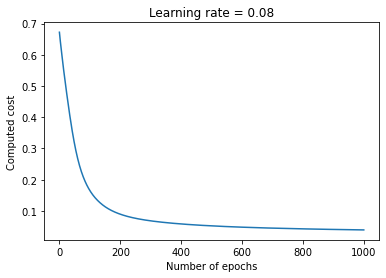

Accuracy
Accuracy: 0.86013986013986
Cost/error after epoch 0: 0.689318
Cost/error after epoch 10: 0.672464
Cost/error after epoch 20: 0.657874
Cost/error after epoch 30: 0.638260
Cost/error after epoch 40: 0.604897
Cost/error after epoch 50: 0.560231
Cost/error after epoch 60: 0.514719
Cost/error after epoch 70: 0.458462
Cost/error after epoch 80: 0.394773
Cost/error after epoch 90: 0.332212
Cost/error after epoch 100: 0.278080
Cost/error after epoch 110: 0.235257
Cost/error after epoch 120: 0.202944
Cost/error after epoch 130: 0.179085
Cost/error after epoch 140: 0.160787
Cost/error after epoch 150: 0.146450
Cost/error after epoch 160: 0.135082
Cost/error after epoch 170: 0.125708
Cost/error after epoch 180: 0.117865
Cost/error after epoch 190: 0.111199
Cost/error after epoch 200: 0.105512
Cost/error after epoch 210: 0.100602
Cost/error after epoch 220: 0.096320
Cost/error after epoch 230: 0.092569
Cost/error after epoch 240: 0.089114
Cost/error after epoch 250: 0.086124
Cost/error af

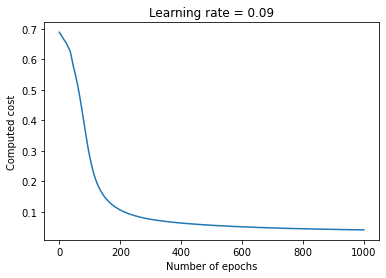

Accuracy
Accuracy: 0.8671328671328671
Cost/error after epoch 0: 0.746226
Cost/error after epoch 10: 0.745487
Cost/error after epoch 20: 0.744755
Cost/error after epoch 30: 0.744032
Cost/error after epoch 40: 0.743316
Cost/error after epoch 50: 0.742606
Cost/error after epoch 60: 0.741907
Cost/error after epoch 70: 0.741217
Cost/error after epoch 80: 0.740537
Cost/error after epoch 90: 0.739863
Cost/error after epoch 100: 0.739199
Cost/error after epoch 110: 0.738544
Cost/error after epoch 120: 0.737895
Cost/error after epoch 130: 0.737256
Cost/error after epoch 140: 0.736626
Cost/error after epoch 150: 0.736001
Cost/error after epoch 160: 0.735384
Cost/error after epoch 170: 0.734772
Cost/error after epoch 180: 0.734167
Cost/error after epoch 190: 0.733565
Cost/error after epoch 200: 0.732968
Cost/error after epoch 210: 0.732375
Cost/error after epoch 220: 0.731787
Cost/error after epoch 230: 0.731204
Cost/error after epoch 240: 0.730624
Cost/error after epoch 250: 0.730049
Cost/error 

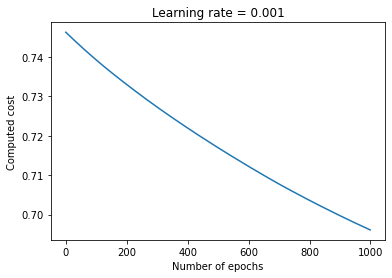

Accuracy
Accuracy: 0.3426573426573427
Cost/error after epoch 0: 0.705165
Cost/error after epoch 10: 0.704259
Cost/error after epoch 20: 0.703380
Cost/error after epoch 30: 0.702519
Cost/error after epoch 40: 0.701689
Cost/error after epoch 50: 0.700881
Cost/error after epoch 60: 0.700100
Cost/error after epoch 70: 0.699341
Cost/error after epoch 80: 0.698592
Cost/error after epoch 90: 0.697868
Cost/error after epoch 100: 0.697168
Cost/error after epoch 110: 0.696482
Cost/error after epoch 120: 0.695825
Cost/error after epoch 130: 0.695193
Cost/error after epoch 140: 0.694577
Cost/error after epoch 150: 0.693980
Cost/error after epoch 160: 0.693407
Cost/error after epoch 170: 0.692853
Cost/error after epoch 180: 0.692316
Cost/error after epoch 190: 0.691795
Cost/error after epoch 200: 0.691290
Cost/error after epoch 210: 0.690800
Cost/error after epoch 220: 0.690322
Cost/error after epoch 230: 0.689859
Cost/error after epoch 240: 0.689408
Cost/error after epoch 250: 0.688974
Cost/error 

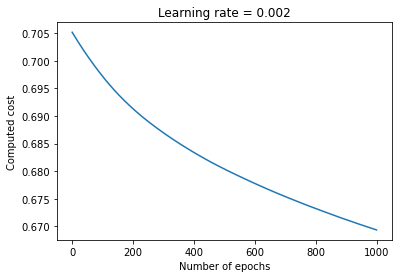

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.691191
Cost/error after epoch 10: 0.690475
Cost/error after epoch 20: 0.689764
Cost/error after epoch 30: 0.689058
Cost/error after epoch 40: 0.688357
Cost/error after epoch 50: 0.687654
Cost/error after epoch 60: 0.686940
Cost/error after epoch 70: 0.686234
Cost/error after epoch 80: 0.685534
Cost/error after epoch 90: 0.684846
Cost/error after epoch 100: 0.684158
Cost/error after epoch 110: 0.683458
Cost/error after epoch 120: 0.682756
Cost/error after epoch 130: 0.682059
Cost/error after epoch 140: 0.681369
Cost/error after epoch 150: 0.680684
Cost/error after epoch 160: 0.680000
Cost/error after epoch 170: 0.679319
Cost/error after epoch 180: 0.678647
Cost/error after epoch 190: 0.677986
Cost/error after epoch 200: 0.677329
Cost/error after epoch 210: 0.676676
Cost/error after epoch 220: 0.676031
Cost/error after epoch 230: 0.675399
Cost/error after epoch 240: 0.674778
Cost/error after epoch 250: 0.674166
Cost/error 

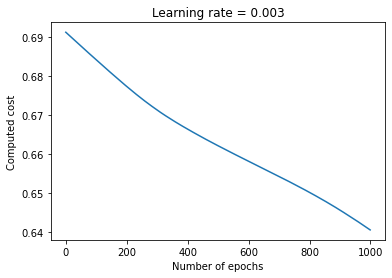

Accuracy
Accuracy: 0.37762237762237766
Cost/error after epoch 0: 0.696412
Cost/error after epoch 10: 0.694309
Cost/error after epoch 20: 0.692293
Cost/error after epoch 30: 0.690357
Cost/error after epoch 40: 0.688496
Cost/error after epoch 50: 0.686706
Cost/error after epoch 60: 0.684982
Cost/error after epoch 70: 0.683319
Cost/error after epoch 80: 0.681710
Cost/error after epoch 90: 0.680153
Cost/error after epoch 100: 0.678646
Cost/error after epoch 110: 0.677186
Cost/error after epoch 120: 0.675766
Cost/error after epoch 130: 0.674386
Cost/error after epoch 140: 0.673042
Cost/error after epoch 150: 0.671736
Cost/error after epoch 160: 0.670466
Cost/error after epoch 170: 0.669228
Cost/error after epoch 180: 0.668016
Cost/error after epoch 190: 0.666843
Cost/error after epoch 200: 0.665703
Cost/error after epoch 210: 0.664594
Cost/error after epoch 220: 0.663506
Cost/error after epoch 230: 0.662443
Cost/error after epoch 240: 0.661421
Cost/error after epoch 250: 0.660428
Cost/error

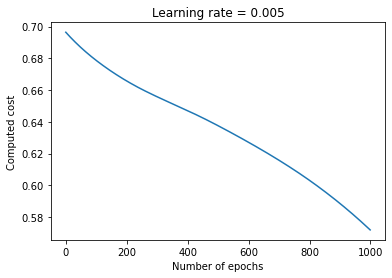

Accuracy
Accuracy: 0.5594405594405594
Cost/error after epoch 0: 0.701017
Cost/error after epoch 10: 0.697258
Cost/error after epoch 20: 0.693823
Cost/error after epoch 30: 0.690643
Cost/error after epoch 40: 0.687714
Cost/error after epoch 50: 0.685091
Cost/error after epoch 60: 0.682742
Cost/error after epoch 70: 0.680588
Cost/error after epoch 80: 0.678592
Cost/error after epoch 90: 0.676752
Cost/error after epoch 100: 0.675016
Cost/error after epoch 110: 0.673376
Cost/error after epoch 120: 0.671797
Cost/error after epoch 130: 0.670269
Cost/error after epoch 140: 0.668779
Cost/error after epoch 150: 0.667328
Cost/error after epoch 160: 0.665902
Cost/error after epoch 170: 0.664503
Cost/error after epoch 180: 0.663122
Cost/error after epoch 190: 0.661763
Cost/error after epoch 200: 0.660421
Cost/error after epoch 210: 0.659088
Cost/error after epoch 220: 0.657771
Cost/error after epoch 230: 0.656471
Cost/error after epoch 240: 0.655178
Cost/error after epoch 250: 0.653889
Cost/error 

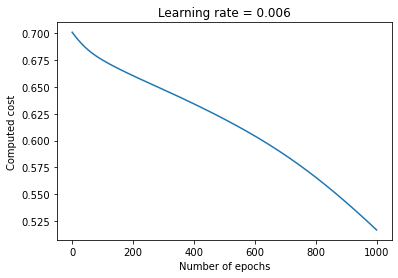

Accuracy
Accuracy: 0.6853146853146853
Cost/error after epoch 0: 0.692899
Cost/error after epoch 10: 0.691041
Cost/error after epoch 20: 0.689265
Cost/error after epoch 30: 0.687568
Cost/error after epoch 40: 0.685946
Cost/error after epoch 50: 0.684384
Cost/error after epoch 60: 0.682886
Cost/error after epoch 70: 0.681444
Cost/error after epoch 80: 0.680057
Cost/error after epoch 90: 0.678741
Cost/error after epoch 100: 0.677474
Cost/error after epoch 110: 0.676266
Cost/error after epoch 120: 0.675107
Cost/error after epoch 130: 0.673987
Cost/error after epoch 140: 0.672904
Cost/error after epoch 150: 0.671859
Cost/error after epoch 160: 0.670850
Cost/error after epoch 170: 0.669874
Cost/error after epoch 180: 0.668923
Cost/error after epoch 190: 0.667997
Cost/error after epoch 200: 0.667095
Cost/error after epoch 210: 0.666215
Cost/error after epoch 220: 0.665354
Cost/error after epoch 230: 0.664515
Cost/error after epoch 240: 0.663694
Cost/error after epoch 250: 0.662890
Cost/error 

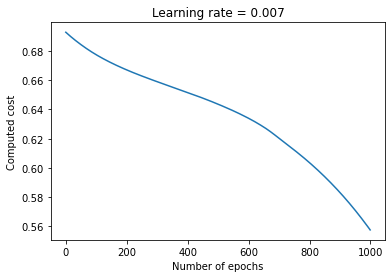

Accuracy
Accuracy: 0.6503496503496504
Cost/error after epoch 0: 0.696368
Cost/error after epoch 10: 0.693733
Cost/error after epoch 20: 0.691278
Cost/error after epoch 30: 0.688983
Cost/error after epoch 40: 0.686835
Cost/error after epoch 50: 0.684817
Cost/error after epoch 60: 0.682916
Cost/error after epoch 70: 0.681123
Cost/error after epoch 80: 0.679425
Cost/error after epoch 90: 0.677815
Cost/error after epoch 100: 0.676287
Cost/error after epoch 110: 0.674832
Cost/error after epoch 120: 0.673441
Cost/error after epoch 130: 0.672110
Cost/error after epoch 140: 0.670832
Cost/error after epoch 150: 0.669598
Cost/error after epoch 160: 0.668406
Cost/error after epoch 170: 0.667249
Cost/error after epoch 180: 0.666125
Cost/error after epoch 190: 0.665030
Cost/error after epoch 200: 0.663962
Cost/error after epoch 210: 0.662918
Cost/error after epoch 220: 0.661893
Cost/error after epoch 230: 0.660882
Cost/error after epoch 240: 0.659886
Cost/error after epoch 250: 0.658901
Cost/error 

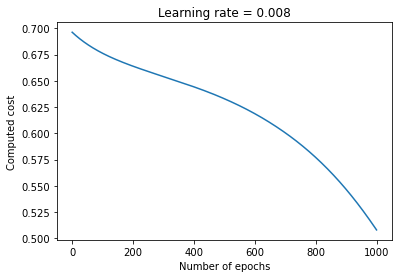

Accuracy
Accuracy: 0.8531468531468531
Cost/error after epoch 0: 0.691962
Cost/error after epoch 10: 0.689559
Cost/error after epoch 20: 0.687355
Cost/error after epoch 30: 0.685335
Cost/error after epoch 40: 0.683455
Cost/error after epoch 50: 0.681685
Cost/error after epoch 60: 0.680039
Cost/error after epoch 70: 0.678471
Cost/error after epoch 80: 0.676949
Cost/error after epoch 90: 0.675475
Cost/error after epoch 100: 0.674043
Cost/error after epoch 110: 0.672640
Cost/error after epoch 120: 0.671258
Cost/error after epoch 130: 0.669894
Cost/error after epoch 140: 0.668543
Cost/error after epoch 150: 0.667201
Cost/error after epoch 160: 0.665861
Cost/error after epoch 170: 0.664507
Cost/error after epoch 180: 0.663116
Cost/error after epoch 190: 0.661680
Cost/error after epoch 200: 0.660202
Cost/error after epoch 210: 0.658679
Cost/error after epoch 220: 0.657122
Cost/error after epoch 230: 0.655480
Cost/error after epoch 240: 0.653786
Cost/error after epoch 250: 0.652020
Cost/error 

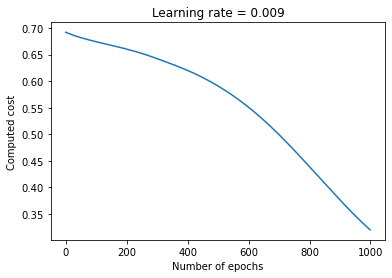

Accuracy
Accuracy: 0.881118881118881
Cost/error after epoch 0: 0.691845
Cost/error after epoch 10: 0.674779
Cost/error after epoch 20: 0.658507
Cost/error after epoch 30: 0.640335
Cost/error after epoch 40: 0.616890
Cost/error after epoch 50: 0.582704
Cost/error after epoch 60: 0.533333
Cost/error after epoch 70: 0.467717
Cost/error after epoch 80: 0.391896
Cost/error after epoch 90: 0.318866
Cost/error after epoch 100: 0.259402
Cost/error after epoch 110: 0.215487
Cost/error after epoch 120: 0.184011
Cost/error after epoch 130: 0.161012
Cost/error after epoch 140: 0.143592
Cost/error after epoch 150: 0.129935
Cost/error after epoch 160: 0.118995
Cost/error after epoch 170: 0.110064
Cost/error after epoch 180: 0.102640
Cost/error after epoch 190: 0.096451
Cost/error after epoch 200: 0.091265
Cost/error after epoch 210: 0.086896
Cost/error after epoch 220: 0.083190
Cost/error after epoch 230: 0.080014
Cost/error after epoch 240: 0.077259
Cost/error after epoch 250: 0.074846
Cost/error a

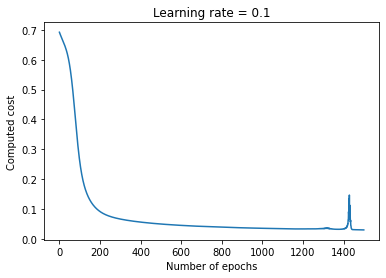

Accuracy
Accuracy: 0.8531468531468531
Cost/error after epoch 0: 0.691758
Cost/error after epoch 10: 0.687130
Cost/error after epoch 20: 0.681783
Cost/error after epoch 30: 0.676685
Cost/error after epoch 40: 0.672052
Cost/error after epoch 50: 0.667916
Cost/error after epoch 60: 0.664362
Cost/error after epoch 70: 0.661163
Cost/error after epoch 80: 0.658279
Cost/error after epoch 90: 0.655632
Cost/error after epoch 100: 0.653106
Cost/error after epoch 110: 0.650687
Cost/error after epoch 120: 0.648323
Cost/error after epoch 130: 0.645978
Cost/error after epoch 140: 0.643656
Cost/error after epoch 150: 0.641371
Cost/error after epoch 160: 0.639092
Cost/error after epoch 170: 0.636835
Cost/error after epoch 180: 0.634593
Cost/error after epoch 190: 0.632345
Cost/error after epoch 200: 0.630084
Cost/error after epoch 210: 0.627811
Cost/error after epoch 220: 0.625522
Cost/error after epoch 230: 0.623232
Cost/error after epoch 240: 0.620910
Cost/error after epoch 250: 0.618545
Cost/error 

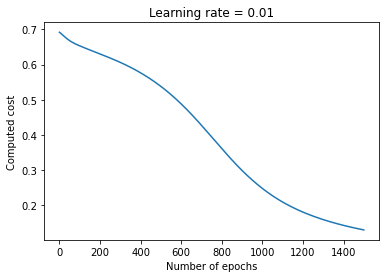

Accuracy
Accuracy: 0.9370629370629371
Cost/error after epoch 0: 0.696699
Cost/error after epoch 10: 0.688807
Cost/error after epoch 20: 0.682103
Cost/error after epoch 30: 0.676597
Cost/error after epoch 40: 0.672029
Cost/error after epoch 50: 0.667812
Cost/error after epoch 60: 0.663459
Cost/error after epoch 70: 0.659271
Cost/error after epoch 80: 0.655258
Cost/error after epoch 90: 0.651477
Cost/error after epoch 100: 0.647562
Cost/error after epoch 110: 0.643181
Cost/error after epoch 120: 0.638477
Cost/error after epoch 130: 0.633706
Cost/error after epoch 140: 0.628908
Cost/error after epoch 150: 0.623999
Cost/error after epoch 160: 0.618846
Cost/error after epoch 170: 0.613412
Cost/error after epoch 180: 0.607620
Cost/error after epoch 190: 0.601455
Cost/error after epoch 200: 0.594855
Cost/error after epoch 210: 0.587733
Cost/error after epoch 220: 0.580048
Cost/error after epoch 230: 0.571734
Cost/error after epoch 240: 0.562781
Cost/error after epoch 250: 0.553139
Cost/error 

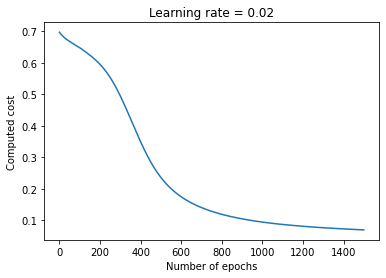

Accuracy
Accuracy: 0.9370629370629371
Cost/error after epoch 0: 0.721961
Cost/error after epoch 10: 0.710778
Cost/error after epoch 20: 0.701403
Cost/error after epoch 30: 0.693215
Cost/error after epoch 40: 0.685817
Cost/error after epoch 50: 0.678951
Cost/error after epoch 60: 0.672413
Cost/error after epoch 70: 0.666039
Cost/error after epoch 80: 0.659688
Cost/error after epoch 90: 0.653222
Cost/error after epoch 100: 0.646511
Cost/error after epoch 110: 0.639420
Cost/error after epoch 120: 0.631834
Cost/error after epoch 130: 0.623678
Cost/error after epoch 140: 0.614817
Cost/error after epoch 150: 0.605108
Cost/error after epoch 160: 0.594344
Cost/error after epoch 170: 0.582326
Cost/error after epoch 180: 0.568931
Cost/error after epoch 190: 0.554009
Cost/error after epoch 200: 0.537483
Cost/error after epoch 210: 0.519387
Cost/error after epoch 220: 0.499868
Cost/error after epoch 230: 0.479057
Cost/error after epoch 240: 0.457034
Cost/error after epoch 250: 0.434093
Cost/error 

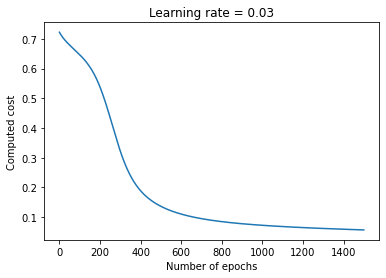

Accuracy
Accuracy: 0.944055944055944
Cost/error after epoch 0: 0.696205
Cost/error after epoch 10: 0.673261
Cost/error after epoch 20: 0.655157
Cost/error after epoch 30: 0.638083
Cost/error after epoch 40: 0.618636
Cost/error after epoch 50: 0.594512
Cost/error after epoch 60: 0.564594
Cost/error after epoch 70: 0.527443
Cost/error after epoch 80: 0.486409
Cost/error after epoch 90: 0.444274
Cost/error after epoch 100: 0.402639
Cost/error after epoch 110: 0.363770
Cost/error after epoch 120: 0.328590
Cost/error after epoch 130: 0.297473
Cost/error after epoch 140: 0.270582
Cost/error after epoch 150: 0.247865
Cost/error after epoch 160: 0.228557
Cost/error after epoch 170: 0.212020
Cost/error after epoch 180: 0.197676
Cost/error after epoch 190: 0.185019
Cost/error after epoch 200: 0.173622
Cost/error after epoch 210: 0.163439
Cost/error after epoch 220: 0.154335
Cost/error after epoch 230: 0.146150
Cost/error after epoch 240: 0.138761
Cost/error after epoch 250: 0.132108
Cost/error a

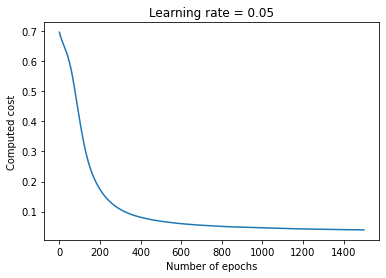

Accuracy
Accuracy: 0.9090909090909091
Cost/error after epoch 0: 0.704436
Cost/error after epoch 10: 0.686375
Cost/error after epoch 20: 0.675898
Cost/error after epoch 30: 0.669200
Cost/error after epoch 40: 0.663787
Cost/error after epoch 50: 0.657739
Cost/error after epoch 60: 0.650938
Cost/error after epoch 70: 0.644010
Cost/error after epoch 80: 0.636519
Cost/error after epoch 90: 0.628088
Cost/error after epoch 100: 0.618308
Cost/error after epoch 110: 0.606673
Cost/error after epoch 120: 0.592555
Cost/error after epoch 130: 0.575338
Cost/error after epoch 140: 0.554453
Cost/error after epoch 150: 0.529481
Cost/error after epoch 160: 0.500247
Cost/error after epoch 170: 0.466991
Cost/error after epoch 180: 0.429775
Cost/error after epoch 190: 0.391596
Cost/error after epoch 200: 0.354535
Cost/error after epoch 210: 0.320176
Cost/error after epoch 220: 0.289498
Cost/error after epoch 230: 0.262841
Cost/error after epoch 240: 0.239996
Cost/error after epoch 250: 0.220562
Cost/error 

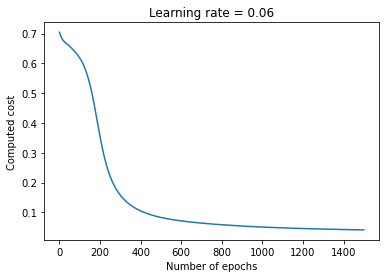

Accuracy
Accuracy: 0.895104895104895
Cost/error after epoch 0: 0.732459
Cost/error after epoch 10: 0.681613
Cost/error after epoch 20: 0.654770
Cost/error after epoch 30: 0.632001
Cost/error after epoch 40: 0.607251
Cost/error after epoch 50: 0.579262
Cost/error after epoch 60: 0.549347
Cost/error after epoch 70: 0.515712
Cost/error after epoch 80: 0.476857
Cost/error after epoch 90: 0.433292
Cost/error after epoch 100: 0.387409
Cost/error after epoch 110: 0.342003
Cost/error after epoch 120: 0.299177
Cost/error after epoch 130: 0.261195
Cost/error after epoch 140: 0.229261
Cost/error after epoch 150: 0.203410
Cost/error after epoch 160: 0.182733
Cost/error after epoch 170: 0.166193
Cost/error after epoch 180: 0.152782
Cost/error after epoch 190: 0.141758
Cost/error after epoch 200: 0.132550
Cost/error after epoch 210: 0.124751
Cost/error after epoch 220: 0.117815
Cost/error after epoch 230: 0.111807
Cost/error after epoch 240: 0.106590
Cost/error after epoch 250: 0.102024
Cost/error a

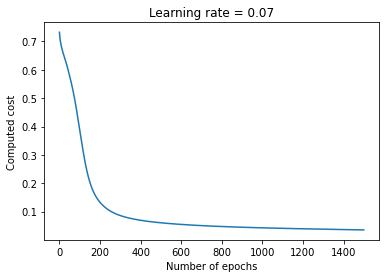

Accuracy
Accuracy: 0.86013986013986
Cost/error after epoch 0: 0.699104
Cost/error after epoch 10: 0.672116
Cost/error after epoch 20: 0.654941
Cost/error after epoch 30: 0.638212
Cost/error after epoch 40: 0.617911
Cost/error after epoch 50: 0.591177
Cost/error after epoch 60: 0.555988
Cost/error after epoch 70: 0.512093
Cost/error after epoch 80: 0.461402
Cost/error after epoch 90: 0.407605
Cost/error after epoch 100: 0.354999
Cost/error after epoch 110: 0.308083
Cost/error after epoch 120: 0.268642
Cost/error after epoch 130: 0.236828
Cost/error after epoch 140: 0.211750
Cost/error after epoch 150: 0.191811
Cost/error after epoch 160: 0.175814
Cost/error after epoch 170: 0.162771
Cost/error after epoch 180: 0.151910
Cost/error after epoch 190: 0.142711
Cost/error after epoch 200: 0.134800
Cost/error after epoch 210: 0.127916
Cost/error after epoch 220: 0.121884
Cost/error after epoch 230: 0.116536
Cost/error after epoch 240: 0.111756
Cost/error after epoch 250: 0.107474
Cost/error af

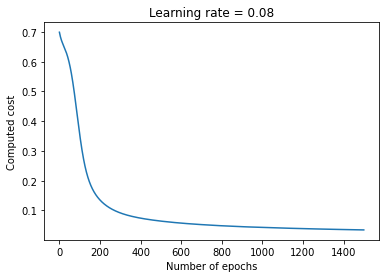

Accuracy
Accuracy: 0.874125874125874
Cost/error after epoch 0: 0.693546
Cost/error after epoch 10: 0.672650
Cost/error after epoch 20: 0.655350
Cost/error after epoch 30: 0.640927
Cost/error after epoch 40: 0.626815
Cost/error after epoch 50: 0.609804
Cost/error after epoch 60: 0.587655
Cost/error after epoch 70: 0.558725
Cost/error after epoch 80: 0.522822
Cost/error after epoch 90: 0.481496
Cost/error after epoch 100: 0.437493
Cost/error after epoch 110: 0.393606
Cost/error after epoch 120: 0.352041
Cost/error after epoch 130: 0.314303
Cost/error after epoch 140: 0.280730
Cost/error after epoch 150: 0.251223
Cost/error after epoch 160: 0.225555
Cost/error after epoch 170: 0.203533
Cost/error after epoch 180: 0.184761
Cost/error after epoch 190: 0.168805
Cost/error after epoch 200: 0.155263
Cost/error after epoch 210: 0.143712
Cost/error after epoch 220: 0.133819
Cost/error after epoch 230: 0.125309
Cost/error after epoch 240: 0.117896
Cost/error after epoch 250: 0.111425
Cost/error a

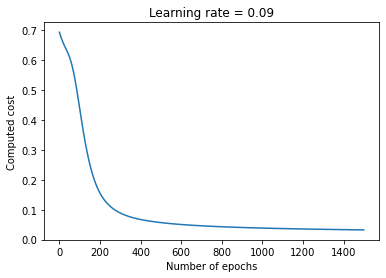

Accuracy
Accuracy: 0.8531468531468531
Cost/error after epoch 0: 0.699529
Cost/error after epoch 10: 0.698859
Cost/error after epoch 20: 0.698184
Cost/error after epoch 30: 0.697509
Cost/error after epoch 40: 0.696835
Cost/error after epoch 50: 0.696162
Cost/error after epoch 60: 0.695490
Cost/error after epoch 70: 0.694819
Cost/error after epoch 80: 0.694149
Cost/error after epoch 90: 0.693477
Cost/error after epoch 100: 0.692792
Cost/error after epoch 110: 0.692106
Cost/error after epoch 120: 0.691418
Cost/error after epoch 130: 0.690720
Cost/error after epoch 140: 0.690015
Cost/error after epoch 150: 0.689309
Cost/error after epoch 160: 0.688600
Cost/error after epoch 170: 0.687882
Cost/error after epoch 180: 0.687159
Cost/error after epoch 190: 0.686438
Cost/error after epoch 200: 0.685717
Cost/error after epoch 210: 0.684994
Cost/error after epoch 220: 0.684266
Cost/error after epoch 230: 0.683539
Cost/error after epoch 240: 0.682814
Cost/error after epoch 250: 0.682090
Cost/error 

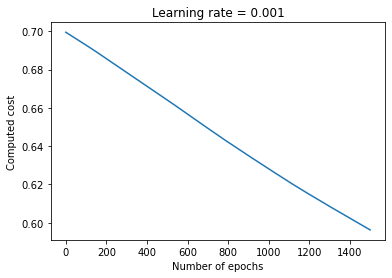

Accuracy
Accuracy: 0.6503496503496503
Cost/error after epoch 0: 0.690306
Cost/error after epoch 10: 0.689597
Cost/error after epoch 20: 0.688893
Cost/error after epoch 30: 0.688195
Cost/error after epoch 40: 0.687504
Cost/error after epoch 50: 0.686821
Cost/error after epoch 60: 0.686146
Cost/error after epoch 70: 0.685478
Cost/error after epoch 80: 0.684816
Cost/error after epoch 90: 0.684160
Cost/error after epoch 100: 0.683512
Cost/error after epoch 110: 0.682871
Cost/error after epoch 120: 0.682235
Cost/error after epoch 130: 0.681605
Cost/error after epoch 140: 0.680982
Cost/error after epoch 150: 0.680363
Cost/error after epoch 160: 0.679752
Cost/error after epoch 170: 0.679147
Cost/error after epoch 180: 0.678547
Cost/error after epoch 190: 0.677953
Cost/error after epoch 200: 0.677365
Cost/error after epoch 210: 0.676783
Cost/error after epoch 220: 0.676207
Cost/error after epoch 230: 0.675636
Cost/error after epoch 240: 0.675071
Cost/error after epoch 250: 0.674511
Cost/error 

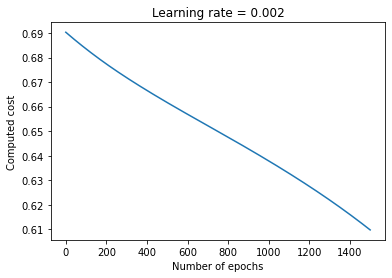

Accuracy
Accuracy: 0.46853146853146854
Cost/error after epoch 0: 0.706707
Cost/error after epoch 10: 0.705562
Cost/error after epoch 20: 0.704477
Cost/error after epoch 30: 0.703438
Cost/error after epoch 40: 0.702403
Cost/error after epoch 50: 0.701395
Cost/error after epoch 60: 0.700403
Cost/error after epoch 70: 0.699443
Cost/error after epoch 80: 0.698506
Cost/error after epoch 90: 0.697600
Cost/error after epoch 100: 0.696723
Cost/error after epoch 110: 0.695870
Cost/error after epoch 120: 0.695033
Cost/error after epoch 130: 0.694214
Cost/error after epoch 140: 0.693418
Cost/error after epoch 150: 0.692642
Cost/error after epoch 160: 0.691882
Cost/error after epoch 170: 0.691137
Cost/error after epoch 180: 0.690408
Cost/error after epoch 190: 0.689689
Cost/error after epoch 200: 0.688985
Cost/error after epoch 210: 0.688289
Cost/error after epoch 220: 0.687604
Cost/error after epoch 230: 0.686931
Cost/error after epoch 240: 0.686271
Cost/error after epoch 250: 0.685622
Cost/error

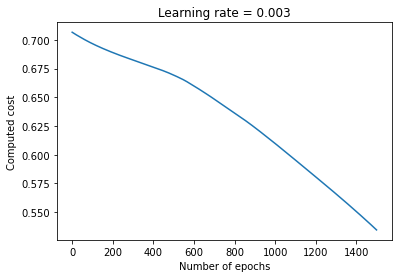

Accuracy
Accuracy: 0.9510489510489509
Cost/error after epoch 0: 0.694005
Cost/error after epoch 10: 0.693256
Cost/error after epoch 20: 0.692522
Cost/error after epoch 30: 0.691805
Cost/error after epoch 40: 0.691101
Cost/error after epoch 50: 0.690414
Cost/error after epoch 60: 0.689741
Cost/error after epoch 70: 0.689085
Cost/error after epoch 80: 0.688441
Cost/error after epoch 90: 0.687807
Cost/error after epoch 100: 0.687189
Cost/error after epoch 110: 0.686584
Cost/error after epoch 120: 0.685986
Cost/error after epoch 130: 0.685401
Cost/error after epoch 140: 0.684825
Cost/error after epoch 150: 0.684259
Cost/error after epoch 160: 0.683709
Cost/error after epoch 170: 0.683162
Cost/error after epoch 180: 0.682624
Cost/error after epoch 190: 0.682080
Cost/error after epoch 200: 0.681529
Cost/error after epoch 210: 0.680974
Cost/error after epoch 220: 0.680430
Cost/error after epoch 230: 0.679861
Cost/error after epoch 240: 0.679239
Cost/error after epoch 250: 0.678528
Cost/error 

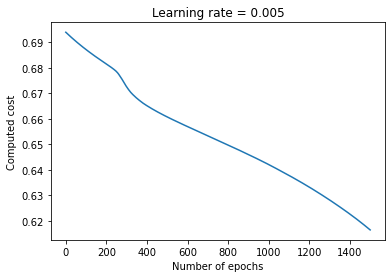

Accuracy
Accuracy: 0.923076923076923
Cost/error after epoch 0: 0.710211
Cost/error after epoch 10: 0.706179
Cost/error after epoch 20: 0.702627
Cost/error after epoch 30: 0.699625
Cost/error after epoch 40: 0.697068
Cost/error after epoch 50: 0.694857
Cost/error after epoch 60: 0.692855
Cost/error after epoch 70: 0.691059
Cost/error after epoch 80: 0.689430
Cost/error after epoch 90: 0.687954
Cost/error after epoch 100: 0.686696
Cost/error after epoch 110: 0.685593
Cost/error after epoch 120: 0.684593
Cost/error after epoch 130: 0.683669
Cost/error after epoch 140: 0.682792
Cost/error after epoch 150: 0.681966
Cost/error after epoch 160: 0.681184
Cost/error after epoch 170: 0.680445
Cost/error after epoch 180: 0.679734
Cost/error after epoch 190: 0.679042
Cost/error after epoch 200: 0.678375
Cost/error after epoch 210: 0.677727
Cost/error after epoch 220: 0.677093
Cost/error after epoch 230: 0.676484
Cost/error after epoch 240: 0.675896
Cost/error after epoch 250: 0.675326
Cost/error a

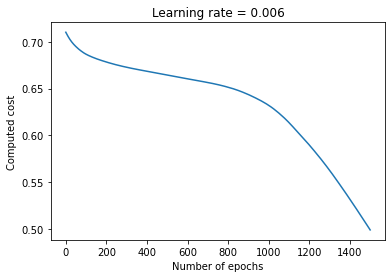

Accuracy
Accuracy: 0.7342657342657342
Cost/error after epoch 0: 0.705786
Cost/error after epoch 10: 0.704415
Cost/error after epoch 20: 0.703090
Cost/error after epoch 30: 0.701809
Cost/error after epoch 40: 0.700574
Cost/error after epoch 50: 0.699381
Cost/error after epoch 60: 0.698241
Cost/error after epoch 70: 0.697155
Cost/error after epoch 80: 0.696112
Cost/error after epoch 90: 0.695104
Cost/error after epoch 100: 0.694132
Cost/error after epoch 110: 0.693198
Cost/error after epoch 120: 0.692305
Cost/error after epoch 130: 0.691446
Cost/error after epoch 140: 0.690619
Cost/error after epoch 150: 0.689823
Cost/error after epoch 160: 0.689057
Cost/error after epoch 170: 0.688322
Cost/error after epoch 180: 0.687617
Cost/error after epoch 190: 0.686940
Cost/error after epoch 200: 0.686286
Cost/error after epoch 210: 0.685658
Cost/error after epoch 220: 0.685049
Cost/error after epoch 230: 0.684462
Cost/error after epoch 240: 0.683892
Cost/error after epoch 250: 0.683337
Cost/error 

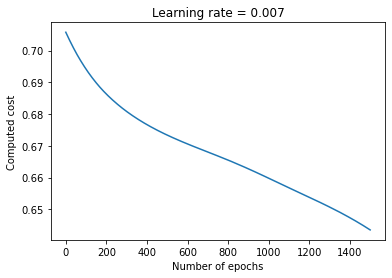

Accuracy
Accuracy: 0.909090909090909
Cost/error after epoch 0: 0.699401
Cost/error after epoch 10: 0.694788
Cost/error after epoch 20: 0.690889
Cost/error after epoch 30: 0.687795
Cost/error after epoch 40: 0.685292
Cost/error after epoch 50: 0.683194
Cost/error after epoch 60: 0.681381
Cost/error after epoch 70: 0.679741
Cost/error after epoch 80: 0.678237
Cost/error after epoch 90: 0.676833
Cost/error after epoch 100: 0.675518
Cost/error after epoch 110: 0.674300
Cost/error after epoch 120: 0.673177
Cost/error after epoch 130: 0.672117
Cost/error after epoch 140: 0.671109
Cost/error after epoch 150: 0.670154
Cost/error after epoch 160: 0.669240
Cost/error after epoch 170: 0.668361
Cost/error after epoch 180: 0.667519
Cost/error after epoch 190: 0.666706
Cost/error after epoch 200: 0.665920
Cost/error after epoch 210: 0.665156
Cost/error after epoch 220: 0.664415
Cost/error after epoch 230: 0.663694
Cost/error after epoch 240: 0.662994
Cost/error after epoch 250: 0.662310
Cost/error a

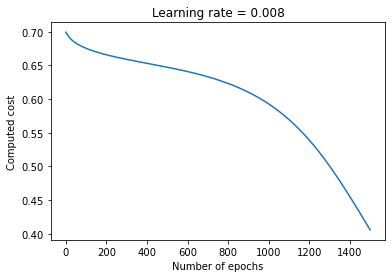

Accuracy
Accuracy: 0.8881118881118881
Cost/error after epoch 0: 0.694866
Cost/error after epoch 10: 0.689411
Cost/error after epoch 20: 0.681961
Cost/error after epoch 30: 0.674978
Cost/error after epoch 40: 0.669609
Cost/error after epoch 50: 0.665307
Cost/error after epoch 60: 0.661498
Cost/error after epoch 70: 0.657951
Cost/error after epoch 80: 0.654564
Cost/error after epoch 90: 0.651335
Cost/error after epoch 100: 0.648227
Cost/error after epoch 110: 0.645203
Cost/error after epoch 120: 0.642232
Cost/error after epoch 130: 0.639262
Cost/error after epoch 140: 0.636327
Cost/error after epoch 150: 0.633432
Cost/error after epoch 160: 0.630559
Cost/error after epoch 170: 0.627749
Cost/error after epoch 180: 0.624974
Cost/error after epoch 190: 0.622225
Cost/error after epoch 200: 0.619506
Cost/error after epoch 210: 0.616805
Cost/error after epoch 220: 0.614114
Cost/error after epoch 230: 0.611457
Cost/error after epoch 240: 0.608831
Cost/error after epoch 250: 0.606186
Cost/error 

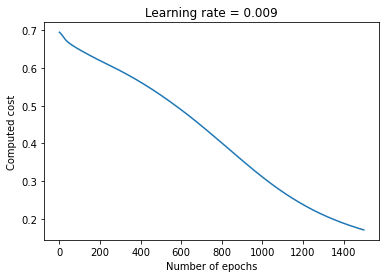

Accuracy
Accuracy: 0.9370629370629371
Cost/error after epoch 0: 0.705730
Cost/error after epoch 10: 0.668203
Cost/error after epoch 20: 0.644292
Cost/error after epoch 30: 0.617249
Cost/error after epoch 40: 0.582070
Cost/error after epoch 50: 0.527775
Cost/error after epoch 60: 0.465257
Cost/error after epoch 70: 0.403036
Cost/error after epoch 80: 0.345633
Cost/error after epoch 90: 0.295338
Cost/error after epoch 100: 0.252980
Cost/error after epoch 110: 0.218489
Cost/error after epoch 120: 0.190939
Cost/error after epoch 130: 0.169119
Cost/error after epoch 140: 0.151771
Cost/error after epoch 150: 0.137857
Cost/error after epoch 160: 0.126545
Cost/error after epoch 170: 0.117165
Cost/error after epoch 180: 0.109228
Cost/error after epoch 190: 0.102498
Cost/error after epoch 200: 0.096722
Cost/error after epoch 210: 0.091778
Cost/error after epoch 220: 0.087535
Cost/error after epoch 230: 0.083817
Cost/error after epoch 240: 0.080547
Cost/error after epoch 250: 0.077641
Cost/error 

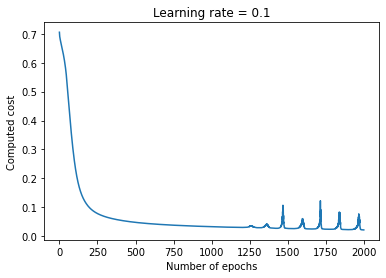

Accuracy
Accuracy: 0.867132867132867
Cost/error after epoch 0: 0.691330
Cost/error after epoch 10: 0.686369
Cost/error after epoch 20: 0.681913
Cost/error after epoch 30: 0.677897
Cost/error after epoch 40: 0.674256
Cost/error after epoch 50: 0.670923
Cost/error after epoch 60: 0.667770
Cost/error after epoch 70: 0.664715
Cost/error after epoch 80: 0.661729
Cost/error after epoch 90: 0.658762
Cost/error after epoch 100: 0.655822
Cost/error after epoch 110: 0.652870
Cost/error after epoch 120: 0.649926
Cost/error after epoch 130: 0.646987
Cost/error after epoch 140: 0.644027
Cost/error after epoch 150: 0.641032
Cost/error after epoch 160: 0.638001
Cost/error after epoch 170: 0.634910
Cost/error after epoch 180: 0.631752
Cost/error after epoch 190: 0.628548
Cost/error after epoch 200: 0.625299
Cost/error after epoch 210: 0.622006
Cost/error after epoch 220: 0.618671
Cost/error after epoch 230: 0.615255
Cost/error after epoch 240: 0.611779
Cost/error after epoch 250: 0.608241
Cost/error a

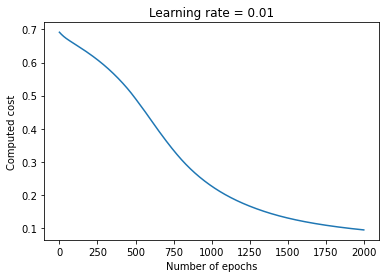

Accuracy
Accuracy: 0.9440559440559441
Cost/error after epoch 0: 0.688026
Cost/error after epoch 10: 0.678724
Cost/error after epoch 20: 0.669270
Cost/error after epoch 30: 0.660850
Cost/error after epoch 40: 0.653636
Cost/error after epoch 50: 0.647370
Cost/error after epoch 60: 0.641754
Cost/error after epoch 70: 0.636385
Cost/error after epoch 80: 0.631054
Cost/error after epoch 90: 0.625637
Cost/error after epoch 100: 0.620037
Cost/error after epoch 110: 0.614182
Cost/error after epoch 120: 0.607990
Cost/error after epoch 130: 0.601472
Cost/error after epoch 140: 0.594634
Cost/error after epoch 150: 0.587492
Cost/error after epoch 160: 0.579967
Cost/error after epoch 170: 0.572079
Cost/error after epoch 180: 0.563728
Cost/error after epoch 190: 0.554942
Cost/error after epoch 200: 0.545747
Cost/error after epoch 210: 0.536091
Cost/error after epoch 220: 0.525964
Cost/error after epoch 230: 0.515413
Cost/error after epoch 240: 0.504410
Cost/error after epoch 250: 0.493008
Cost/error 

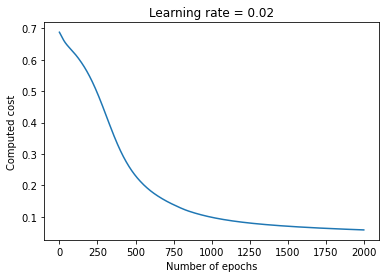

Accuracy
Accuracy: 0.923076923076923
Cost/error after epoch 0: 0.692473
Cost/error after epoch 10: 0.683189
Cost/error after epoch 20: 0.675063
Cost/error after epoch 30: 0.667560
Cost/error after epoch 40: 0.660524
Cost/error after epoch 50: 0.653408
Cost/error after epoch 60: 0.645913
Cost/error after epoch 70: 0.637941
Cost/error after epoch 80: 0.628997
Cost/error after epoch 90: 0.619208
Cost/error after epoch 100: 0.608411
Cost/error after epoch 110: 0.596655
Cost/error after epoch 120: 0.583715
Cost/error after epoch 130: 0.569774
Cost/error after epoch 140: 0.554830
Cost/error after epoch 150: 0.538905
Cost/error after epoch 160: 0.522110
Cost/error after epoch 170: 0.504442
Cost/error after epoch 180: 0.486253
Cost/error after epoch 190: 0.467654
Cost/error after epoch 200: 0.448723
Cost/error after epoch 210: 0.429738
Cost/error after epoch 220: 0.410864
Cost/error after epoch 230: 0.392354
Cost/error after epoch 240: 0.374253
Cost/error after epoch 250: 0.356788
Cost/error a

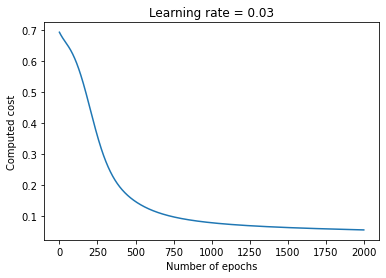

Accuracy
Accuracy: 0.944055944055944
Cost/error after epoch 0: 0.701042
Cost/error after epoch 10: 0.672769
Cost/error after epoch 20: 0.658561
Cost/error after epoch 30: 0.646942
Cost/error after epoch 40: 0.633550
Cost/error after epoch 50: 0.618655
Cost/error after epoch 60: 0.603275
Cost/error after epoch 70: 0.587409
Cost/error after epoch 80: 0.571063
Cost/error after epoch 90: 0.553974
Cost/error after epoch 100: 0.536007
Cost/error after epoch 110: 0.517338
Cost/error after epoch 120: 0.498278
Cost/error after epoch 130: 0.479119
Cost/error after epoch 140: 0.460594
Cost/error after epoch 150: 0.442535
Cost/error after epoch 160: 0.424760
Cost/error after epoch 170: 0.407322
Cost/error after epoch 180: 0.389843
Cost/error after epoch 190: 0.372266
Cost/error after epoch 200: 0.354577
Cost/error after epoch 210: 0.336828
Cost/error after epoch 220: 0.319284
Cost/error after epoch 230: 0.301941
Cost/error after epoch 240: 0.284895
Cost/error after epoch 250: 0.268416
Cost/error a

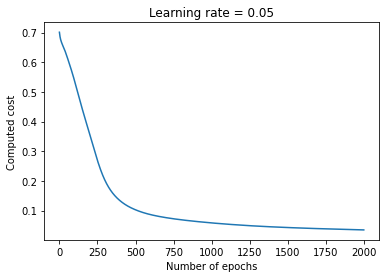

Accuracy
Accuracy: 0.881118881118881
Cost/error after epoch 0: 0.695104
Cost/error after epoch 10: 0.661492
Cost/error after epoch 20: 0.624891
Cost/error after epoch 30: 0.580712
Cost/error after epoch 40: 0.529255
Cost/error after epoch 50: 0.481585
Cost/error after epoch 60: 0.434439
Cost/error after epoch 70: 0.388530
Cost/error after epoch 80: 0.346447
Cost/error after epoch 90: 0.309564
Cost/error after epoch 100: 0.278251
Cost/error after epoch 110: 0.252282
Cost/error after epoch 120: 0.230983
Cost/error after epoch 130: 0.213359
Cost/error after epoch 140: 0.198607
Cost/error after epoch 150: 0.186058
Cost/error after epoch 160: 0.175202
Cost/error after epoch 170: 0.165702
Cost/error after epoch 180: 0.157305
Cost/error after epoch 190: 0.149812
Cost/error after epoch 200: 0.143065
Cost/error after epoch 210: 0.136949
Cost/error after epoch 220: 0.131388
Cost/error after epoch 230: 0.126308
Cost/error after epoch 240: 0.121669
Cost/error after epoch 250: 0.117423
Cost/error a

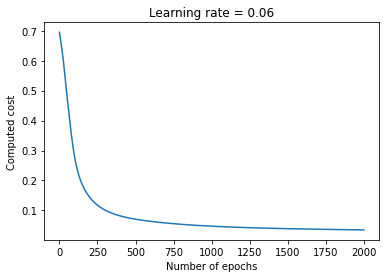

Accuracy
Accuracy: 0.8671328671328671
Cost/error after epoch 0: 0.678655
Cost/error after epoch 10: 0.629455
Cost/error after epoch 20: 0.598700
Cost/error after epoch 30: 0.562493
Cost/error after epoch 40: 0.523979
Cost/error after epoch 50: 0.485026
Cost/error after epoch 60: 0.445545
Cost/error after epoch 70: 0.406603
Cost/error after epoch 80: 0.369102
Cost/error after epoch 90: 0.333977
Cost/error after epoch 100: 0.301963
Cost/error after epoch 110: 0.273471
Cost/error after epoch 120: 0.248509
Cost/error after epoch 130: 0.226909
Cost/error after epoch 140: 0.208252
Cost/error after epoch 150: 0.192138
Cost/error after epoch 160: 0.178198
Cost/error after epoch 170: 0.166152
Cost/error after epoch 180: 0.155701
Cost/error after epoch 190: 0.146676
Cost/error after epoch 200: 0.138824
Cost/error after epoch 210: 0.131936
Cost/error after epoch 220: 0.125887
Cost/error after epoch 230: 0.120557
Cost/error after epoch 240: 0.115814
Cost/error after epoch 250: 0.111568
Cost/error 

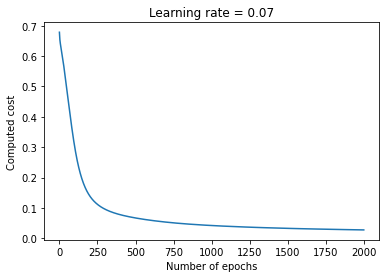

Accuracy
Accuracy: 0.86013986013986
Cost/error after epoch 0: 0.692052
Cost/error after epoch 10: 0.664339
Cost/error after epoch 20: 0.644550
Cost/error after epoch 30: 0.622893
Cost/error after epoch 40: 0.594250
Cost/error after epoch 50: 0.554121
Cost/error after epoch 60: 0.500797
Cost/error after epoch 70: 0.437376
Cost/error after epoch 80: 0.372096
Cost/error after epoch 90: 0.313735
Cost/error after epoch 100: 0.266398
Cost/error after epoch 110: 0.229776
Cost/error after epoch 120: 0.201854
Cost/error after epoch 130: 0.180351
Cost/error after epoch 140: 0.163474
Cost/error after epoch 150: 0.149949
Cost/error after epoch 160: 0.138858
Cost/error after epoch 170: 0.129654
Cost/error after epoch 180: 0.121923
Cost/error after epoch 190: 0.115358
Cost/error after epoch 200: 0.109712
Cost/error after epoch 210: 0.104773
Cost/error after epoch 220: 0.100462
Cost/error after epoch 230: 0.096688
Cost/error after epoch 240: 0.093332
Cost/error after epoch 250: 0.090349
Cost/error af

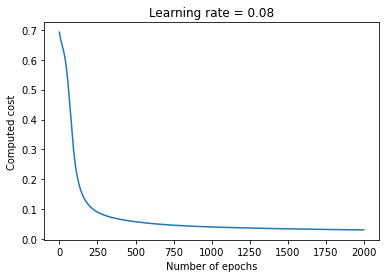

Accuracy
Accuracy: 0.8671328671328671
Cost/error after epoch 0: 0.687445
Cost/error after epoch 10: 0.666217
Cost/error after epoch 20: 0.650783
Cost/error after epoch 30: 0.634458
Cost/error after epoch 40: 0.612999
Cost/error after epoch 50: 0.582223
Cost/error after epoch 60: 0.540523
Cost/error after epoch 70: 0.488074
Cost/error after epoch 80: 0.428916
Cost/error after epoch 90: 0.370310
Cost/error after epoch 100: 0.317162
Cost/error after epoch 110: 0.271956
Cost/error after epoch 120: 0.235361
Cost/error after epoch 130: 0.206295
Cost/error after epoch 140: 0.183293
Cost/error after epoch 150: 0.164979
Cost/error after epoch 160: 0.150191
Cost/error after epoch 170: 0.138154
Cost/error after epoch 180: 0.128183
Cost/error after epoch 190: 0.119829
Cost/error after epoch 200: 0.112738
Cost/error after epoch 210: 0.106664
Cost/error after epoch 220: 0.101420
Cost/error after epoch 230: 0.096851
Cost/error after epoch 240: 0.092829
Cost/error after epoch 250: 0.089286
Cost/error 

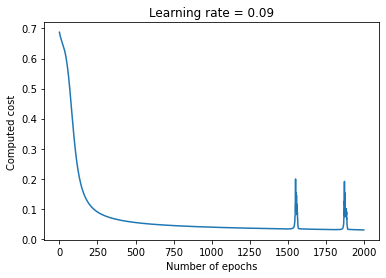

Accuracy
Accuracy: 0.86013986013986
Cost/error after epoch 0: 0.703675
Cost/error after epoch 10: 0.702312
Cost/error after epoch 20: 0.700987
Cost/error after epoch 30: 0.699699
Cost/error after epoch 40: 0.698442
Cost/error after epoch 50: 0.697217
Cost/error after epoch 60: 0.696015
Cost/error after epoch 70: 0.694847
Cost/error after epoch 80: 0.693706
Cost/error after epoch 90: 0.692587
Cost/error after epoch 100: 0.691506
Cost/error after epoch 110: 0.690458
Cost/error after epoch 120: 0.689459
Cost/error after epoch 130: 0.688485
Cost/error after epoch 140: 0.687558
Cost/error after epoch 150: 0.686684
Cost/error after epoch 160: 0.685835
Cost/error after epoch 170: 0.685015
Cost/error after epoch 180: 0.684222
Cost/error after epoch 190: 0.683457
Cost/error after epoch 200: 0.682715
Cost/error after epoch 210: 0.681985
Cost/error after epoch 220: 0.681264
Cost/error after epoch 230: 0.680555
Cost/error after epoch 240: 0.679865
Cost/error after epoch 250: 0.679188
Cost/error af

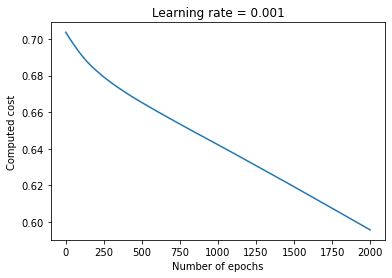

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.692602
Cost/error after epoch 10: 0.692173
Cost/error after epoch 20: 0.691749
Cost/error after epoch 30: 0.691331
Cost/error after epoch 40: 0.690919
Cost/error after epoch 50: 0.690511
Cost/error after epoch 60: 0.690110
Cost/error after epoch 70: 0.689716
Cost/error after epoch 80: 0.689328
Cost/error after epoch 90: 0.688948
Cost/error after epoch 100: 0.688573
Cost/error after epoch 110: 0.688204
Cost/error after epoch 120: 0.687841
Cost/error after epoch 130: 0.687482
Cost/error after epoch 140: 0.687128
Cost/error after epoch 150: 0.686780
Cost/error after epoch 160: 0.686437
Cost/error after epoch 170: 0.686099
Cost/error after epoch 180: 0.685768
Cost/error after epoch 190: 0.685445
Cost/error after epoch 200: 0.685125
Cost/error after epoch 210: 0.684810
Cost/error after epoch 220: 0.684499
Cost/error after epoch 230: 0.684192
Cost/error after epoch 240: 0.683889
Cost/error after epoch 250: 0.683591
Cost/error 

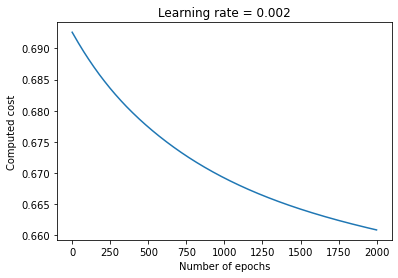

Accuracy
Accuracy: 0.3706293706293707
Cost/error after epoch 0: 0.688438
Cost/error after epoch 10: 0.687245
Cost/error after epoch 20: 0.685983
Cost/error after epoch 30: 0.684655
Cost/error after epoch 40: 0.683329
Cost/error after epoch 50: 0.681988
Cost/error after epoch 60: 0.680626
Cost/error after epoch 70: 0.679240
Cost/error after epoch 80: 0.677827
Cost/error after epoch 90: 0.676395
Cost/error after epoch 100: 0.674979
Cost/error after epoch 110: 0.673590
Cost/error after epoch 120: 0.672271
Cost/error after epoch 130: 0.671040
Cost/error after epoch 140: 0.669866
Cost/error after epoch 150: 0.668724
Cost/error after epoch 160: 0.667617
Cost/error after epoch 170: 0.666563
Cost/error after epoch 180: 0.665546
Cost/error after epoch 190: 0.664548
Cost/error after epoch 200: 0.663567
Cost/error after epoch 210: 0.662606
Cost/error after epoch 220: 0.661667
Cost/error after epoch 230: 0.660749
Cost/error after epoch 240: 0.659844
Cost/error after epoch 250: 0.658961
Cost/error 

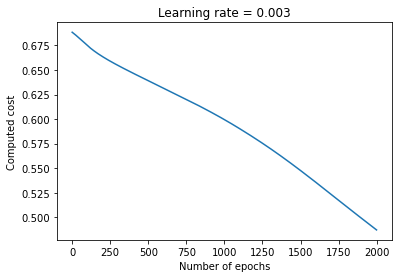

Accuracy
Accuracy: 0.909090909090909
Cost/error after epoch 0: 0.704855
Cost/error after epoch 10: 0.701949
Cost/error after epoch 20: 0.698663
Cost/error after epoch 30: 0.694874
Cost/error after epoch 40: 0.690423
Cost/error after epoch 50: 0.685270
Cost/error after epoch 60: 0.680038
Cost/error after epoch 70: 0.675246
Cost/error after epoch 80: 0.670812
Cost/error after epoch 90: 0.666860
Cost/error after epoch 100: 0.663495
Cost/error after epoch 110: 0.660580
Cost/error after epoch 120: 0.658013
Cost/error after epoch 130: 0.655713
Cost/error after epoch 140: 0.653626
Cost/error after epoch 150: 0.651769
Cost/error after epoch 160: 0.650048
Cost/error after epoch 170: 0.648425
Cost/error after epoch 180: 0.646892
Cost/error after epoch 190: 0.645392
Cost/error after epoch 200: 0.643926
Cost/error after epoch 210: 0.642482
Cost/error after epoch 220: 0.641069
Cost/error after epoch 230: 0.639674
Cost/error after epoch 240: 0.638275
Cost/error after epoch 250: 0.636878
Cost/error a

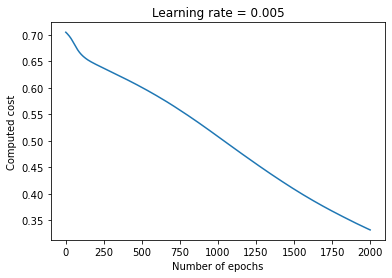

Accuracy
Accuracy: 0.951048951048951
Cost/error after epoch 0: 0.687197
Cost/error after epoch 10: 0.684617
Cost/error after epoch 20: 0.682137
Cost/error after epoch 30: 0.679796
Cost/error after epoch 40: 0.677601
Cost/error after epoch 50: 0.675532
Cost/error after epoch 60: 0.673628
Cost/error after epoch 70: 0.671847
Cost/error after epoch 80: 0.670205
Cost/error after epoch 90: 0.668629
Cost/error after epoch 100: 0.667097
Cost/error after epoch 110: 0.665590
Cost/error after epoch 120: 0.664112
Cost/error after epoch 130: 0.662656
Cost/error after epoch 140: 0.661213
Cost/error after epoch 150: 0.659777
Cost/error after epoch 160: 0.658339
Cost/error after epoch 170: 0.656897
Cost/error after epoch 180: 0.655456
Cost/error after epoch 190: 0.654018
Cost/error after epoch 200: 0.652580
Cost/error after epoch 210: 0.651141
Cost/error after epoch 220: 0.649703
Cost/error after epoch 230: 0.648258
Cost/error after epoch 240: 0.646805
Cost/error after epoch 250: 0.645346
Cost/error a

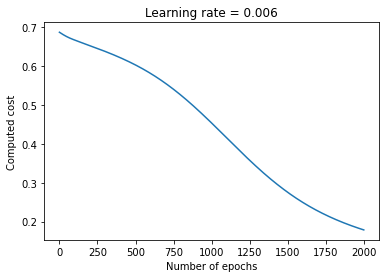

Accuracy
Accuracy: 0.916083916083916
Cost/error after epoch 0: 0.696649
Cost/error after epoch 10: 0.690996
Cost/error after epoch 20: 0.685829
Cost/error after epoch 30: 0.681198
Cost/error after epoch 40: 0.677036
Cost/error after epoch 50: 0.673227
Cost/error after epoch 60: 0.669676
Cost/error after epoch 70: 0.666304
Cost/error after epoch 80: 0.662991
Cost/error after epoch 90: 0.659623
Cost/error after epoch 100: 0.656135
Cost/error after epoch 110: 0.652464
Cost/error after epoch 120: 0.648696
Cost/error after epoch 130: 0.644983
Cost/error after epoch 140: 0.641467
Cost/error after epoch 150: 0.638127
Cost/error after epoch 160: 0.634864
Cost/error after epoch 170: 0.631702
Cost/error after epoch 180: 0.628635
Cost/error after epoch 190: 0.625607
Cost/error after epoch 200: 0.622607
Cost/error after epoch 210: 0.619613
Cost/error after epoch 220: 0.616619
Cost/error after epoch 230: 0.613614
Cost/error after epoch 240: 0.610587
Cost/error after epoch 250: 0.607540
Cost/error a

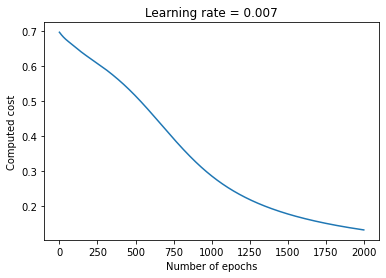

Accuracy
Accuracy: 0.8951048951048952
Cost/error after epoch 0: 0.691753
Cost/error after epoch 10: 0.687920
Cost/error after epoch 20: 0.684628
Cost/error after epoch 30: 0.681751
Cost/error after epoch 40: 0.679112
Cost/error after epoch 50: 0.676571
Cost/error after epoch 60: 0.674035
Cost/error after epoch 70: 0.671470
Cost/error after epoch 80: 0.668936
Cost/error after epoch 90: 0.666381
Cost/error after epoch 100: 0.663797
Cost/error after epoch 110: 0.661206
Cost/error after epoch 120: 0.658612
Cost/error after epoch 130: 0.656003
Cost/error after epoch 140: 0.653403
Cost/error after epoch 150: 0.650773
Cost/error after epoch 160: 0.648113
Cost/error after epoch 170: 0.645448
Cost/error after epoch 180: 0.642760
Cost/error after epoch 190: 0.640062
Cost/error after epoch 200: 0.637336
Cost/error after epoch 210: 0.634563
Cost/error after epoch 220: 0.631792
Cost/error after epoch 230: 0.628960
Cost/error after epoch 240: 0.626075
Cost/error after epoch 250: 0.623133
Cost/error 

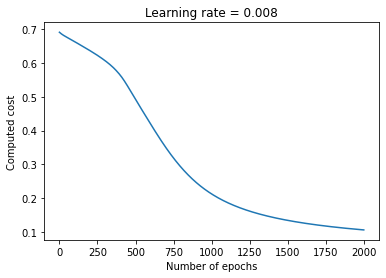

Accuracy
Accuracy: 0.9440559440559441
Cost/error after epoch 0: 0.693393
Cost/error after epoch 10: 0.690823
Cost/error after epoch 20: 0.688431
Cost/error after epoch 30: 0.686157
Cost/error after epoch 40: 0.683970
Cost/error after epoch 50: 0.681872
Cost/error after epoch 60: 0.679844
Cost/error after epoch 70: 0.677888
Cost/error after epoch 80: 0.675987
Cost/error after epoch 90: 0.674132
Cost/error after epoch 100: 0.672319
Cost/error after epoch 110: 0.670545
Cost/error after epoch 120: 0.668805
Cost/error after epoch 130: 0.667094
Cost/error after epoch 140: 0.665406
Cost/error after epoch 150: 0.663739
Cost/error after epoch 160: 0.662090
Cost/error after epoch 170: 0.660449
Cost/error after epoch 180: 0.658812
Cost/error after epoch 190: 0.657180
Cost/error after epoch 200: 0.655549
Cost/error after epoch 210: 0.653907
Cost/error after epoch 220: 0.652252
Cost/error after epoch 230: 0.650587
Cost/error after epoch 240: 0.648910
Cost/error after epoch 250: 0.647217
Cost/error 

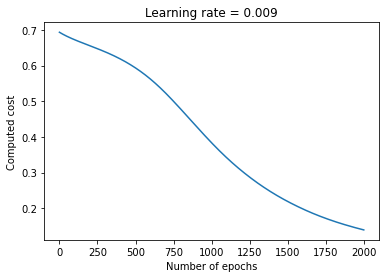

Accuracy
Accuracy: 0.9230769230769231


In [37]:
# Cost values charted after increasing epochs and decreasing learning rates simultaneously
lrs = [1e-1,1e-2,2e-2,3e-2,5e-2,6e-2,7e-2,8e-2,9e-2,1e-3,2e-3,3e-3,5e-3,6e-3,7e-3,8e-3,9e-3]
epoch = [50,60,80,100,140,200,250,300,500,1000,1500,2000]

for epochs in epoch:
    for lr1 in lrs:
        parameters = ann(X_train.T, y_train.T, [30,10,8,8,1], lr1, "n", 426, epochs, "c", ["relu","tanh","relu","sigmoid"], "b")
        print("Accuracy")
        predictions, acc = predict(X_test.T, y_test.T, parameters[0], parameters[2])


Cost/error after epoch 0: 0.687020
Cost/error after epoch 10: 0.245796
Cost/error after epoch 20: 0.442483
Cost/error after epoch 30: 0.196168
Cost/error after epoch 40: 0.163449
Cost/error after epoch 50: 0.152786
Cost/error after epoch 60: 0.148272
Cost/error after epoch 70: 0.146193
Cost/error after epoch 80: 0.145187
Cost/error after epoch 90: 0.144692
Cost/error after epoch 100: 0.144446
Cost/error after epoch 110: 0.144323
Cost/error after epoch 120: 0.144262
Cost/error after epoch 130: 0.144231
Cost/error after epoch 140: 0.144216
Cost/error after epoch 150: 0.144208
Cost/error after epoch 160: 0.144205
Cost/error after epoch 170: 0.144203
Cost/error after epoch 180: 0.144202
Cost/error after epoch 190: 0.144201
Cost/error after epoch 200: 0.144201
Cost/error after epoch 210: 0.144201
Cost/error after epoch 220: 0.144201
Cost/error after epoch 230: 0.144201
Cost/error after epoch 240: 0.144201
Cost/error after epoch 250: 0.144201
Cost/error after epoch 260: 0.144201
Cost/error a

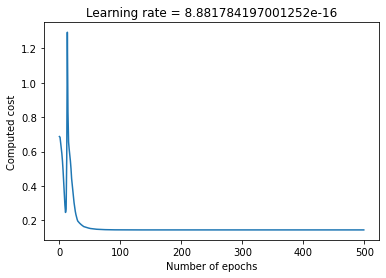

Accuracy
Accuracy: 0.9370629370629371
Cost/error after epoch 0: 0.697803
Cost/error after epoch 10: 0.487630
Cost/error after epoch 20: 0.396421
Cost/error after epoch 30: 0.213503
Cost/error after epoch 40: 0.179676
Cost/error after epoch 50: 0.167482
Cost/error after epoch 60: 0.162195
Cost/error after epoch 70: 0.159723
Cost/error after epoch 80: 0.158525
Cost/error after epoch 90: 0.157936
Cost/error after epoch 100: 0.157644
Cost/error after epoch 110: 0.157498
Cost/error after epoch 120: 0.157426
Cost/error after epoch 130: 0.157390
Cost/error after epoch 140: 0.157372
Cost/error after epoch 150: 0.157363
Cost/error after epoch 160: 0.157358
Cost/error after epoch 170: 0.157356
Cost/error after epoch 180: 0.157355
Cost/error after epoch 190: 0.157354
Cost/error after epoch 200: 0.157354
Cost/error after epoch 210: 0.157354
Cost/error after epoch 220: 0.157354
Cost/error after epoch 230: 0.157354
Cost/error after epoch 240: 0.157354
Cost/error after epoch 250: 0.157354
Cost/error 

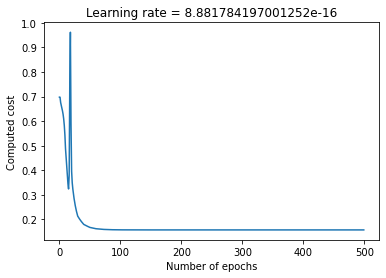

Accuracy
Accuracy: 0.9090909090909092
Cost/error after epoch 0: 0.697307
Cost/error after epoch 10: 0.475508
Cost/error after epoch 20: 0.270827
Cost/error after epoch 30: 0.171462
Cost/error after epoch 40: 0.150959
Cost/error after epoch 50: 0.143166
Cost/error after epoch 60: 0.139740
Cost/error after epoch 70: 0.138115
Cost/error after epoch 80: 0.137322
Cost/error after epoch 90: 0.136931
Cost/error after epoch 100: 0.136736
Cost/error after epoch 110: 0.136640
Cost/error after epoch 120: 0.136591
Cost/error after epoch 130: 0.136567
Cost/error after epoch 140: 0.136555
Cost/error after epoch 150: 0.136549
Cost/error after epoch 160: 0.136546
Cost/error after epoch 170: 0.136545
Cost/error after epoch 180: 0.136544
Cost/error after epoch 190: 0.136543
Cost/error after epoch 200: 0.136543
Cost/error after epoch 210: 0.136543
Cost/error after epoch 220: 0.136543
Cost/error after epoch 230: 0.136543
Cost/error after epoch 240: 0.136543
Cost/error after epoch 250: 0.136543
Cost/error 

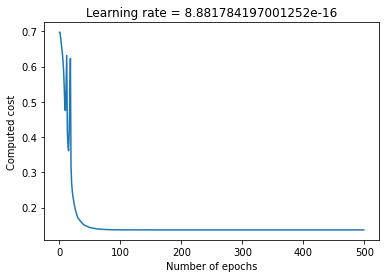

Accuracy
Accuracy: 0.9300699300699301
Cost/error after epoch 0: 0.691042
Cost/error after epoch 10: 1.235602
Cost/error after epoch 20: 0.216064
Cost/error after epoch 30: 0.154181
Cost/error after epoch 40: 0.137723
Cost/error after epoch 50: 0.131171
Cost/error after epoch 60: 0.128206
Cost/error after epoch 70: 0.126795
Cost/error after epoch 80: 0.126106
Cost/error after epoch 90: 0.125765
Cost/error after epoch 100: 0.125596
Cost/error after epoch 110: 0.125511
Cost/error after epoch 120: 0.125469
Cost/error after epoch 130: 0.125448
Cost/error after epoch 140: 0.125438
Cost/error after epoch 150: 0.125432
Cost/error after epoch 160: 0.125430
Cost/error after epoch 170: 0.125428
Cost/error after epoch 180: 0.125428
Cost/error after epoch 190: 0.125427
Cost/error after epoch 200: 0.125427
Cost/error after epoch 210: 0.125427
Cost/error after epoch 220: 0.125427
Cost/error after epoch 230: 0.125427
Cost/error after epoch 240: 0.125427
Cost/error after epoch 250: 0.125427
Cost/error 

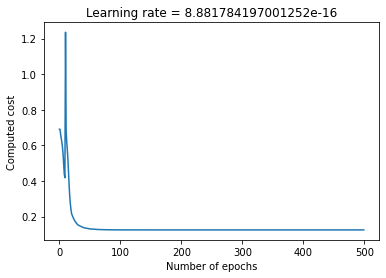

Accuracy
Accuracy: 0.9230769230769231
Cost/error after epoch 0: 0.707545
Cost/error after epoch 10: 0.534870
Cost/error after epoch 20: 0.595958
Cost/error after epoch 30: 0.213889
Cost/error after epoch 40: 0.180202
Cost/error after epoch 50: 0.168373
Cost/error after epoch 60: 0.163275
Cost/error after epoch 70: 0.160890
Cost/error after epoch 80: 0.159736
Cost/error after epoch 90: 0.159168
Cost/error after epoch 100: 0.158886
Cost/error after epoch 110: 0.158746
Cost/error after epoch 120: 0.158676
Cost/error after epoch 130: 0.158641
Cost/error after epoch 140: 0.158623
Cost/error after epoch 150: 0.158614
Cost/error after epoch 160: 0.158610
Cost/error after epoch 170: 0.158608
Cost/error after epoch 180: 0.158607
Cost/error after epoch 190: 0.158606
Cost/error after epoch 200: 0.158606
Cost/error after epoch 210: 0.158606
Cost/error after epoch 220: 0.158606
Cost/error after epoch 230: 0.158606
Cost/error after epoch 240: 0.158606
Cost/error after epoch 250: 0.158606
Cost/error 

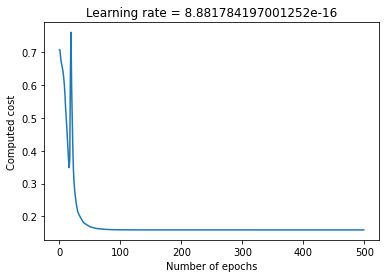

Accuracy
Accuracy: 0.9230769230769231
Cost/error after epoch 0: 0.708697
Cost/error after epoch 10: 0.443466
Cost/error after epoch 20: 0.442365
Cost/error after epoch 30: 0.199945
Cost/error after epoch 40: 0.168704
Cost/error after epoch 50: 0.158476
Cost/error after epoch 60: 0.154072
Cost/error after epoch 70: 0.152019
Cost/error after epoch 80: 0.151028
Cost/error after epoch 90: 0.150540
Cost/error after epoch 100: 0.150298
Cost/error after epoch 110: 0.150178
Cost/error after epoch 120: 0.150118
Cost/error after epoch 130: 0.150088
Cost/error after epoch 140: 0.150073
Cost/error after epoch 150: 0.150065
Cost/error after epoch 160: 0.150062
Cost/error after epoch 170: 0.150060
Cost/error after epoch 180: 0.150059
Cost/error after epoch 190: 0.150058
Cost/error after epoch 200: 0.150058
Cost/error after epoch 210: 0.150058
Cost/error after epoch 220: 0.150058
Cost/error after epoch 230: 0.150058
Cost/error after epoch 240: 0.150058
Cost/error after epoch 250: 0.150058
Cost/error 

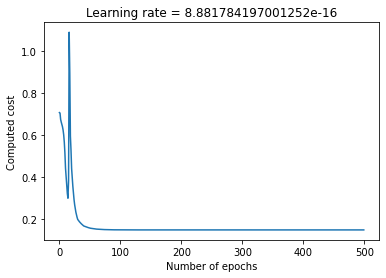

Accuracy
Accuracy: 0.9300699300699301
Cost/error after epoch 0: 0.697615
Cost/error after epoch 10: 0.635826
Cost/error after epoch 20: 0.489222
Cost/error after epoch 30: 0.309218
Cost/error after epoch 40: 0.243582
Cost/error after epoch 50: 0.220437
Cost/error after epoch 60: 0.210699
Cost/error after epoch 70: 0.206220
Cost/error after epoch 80: 0.204072
Cost/error after epoch 90: 0.203020
Cost/error after epoch 100: 0.202499
Cost/error after epoch 110: 0.202239
Cost/error after epoch 120: 0.202110
Cost/error after epoch 130: 0.202046
Cost/error after epoch 140: 0.202013
Cost/error after epoch 150: 0.201997
Cost/error after epoch 160: 0.201989
Cost/error after epoch 170: 0.201985
Cost/error after epoch 180: 0.201983
Cost/error after epoch 190: 0.201982
Cost/error after epoch 200: 0.201982
Cost/error after epoch 210: 0.201981
Cost/error after epoch 220: 0.201981
Cost/error after epoch 230: 0.201981
Cost/error after epoch 240: 0.201981
Cost/error after epoch 250: 0.201981
Cost/error 

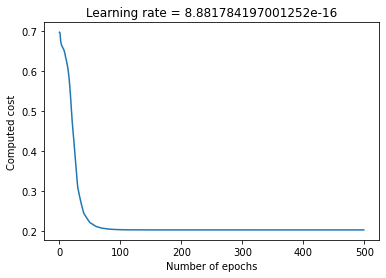

Accuracy
Accuracy: 0.895104895104895
Cost/error after epoch 0: 0.688669
Cost/error after epoch 10: 0.492680
Cost/error after epoch 20: 0.347621
Cost/error after epoch 30: 0.197942
Cost/error after epoch 40: 0.169844
Cost/error after epoch 50: 0.159636
Cost/error after epoch 60: 0.155144
Cost/error after epoch 70: 0.153029
Cost/error after epoch 80: 0.151997
Cost/error after epoch 90: 0.151486
Cost/error after epoch 100: 0.151232
Cost/error after epoch 110: 0.151106
Cost/error after epoch 120: 0.151043
Cost/error after epoch 130: 0.151012
Cost/error after epoch 140: 0.150996
Cost/error after epoch 150: 0.150988
Cost/error after epoch 160: 0.150984
Cost/error after epoch 170: 0.150982
Cost/error after epoch 180: 0.150981
Cost/error after epoch 190: 0.150981
Cost/error after epoch 200: 0.150980
Cost/error after epoch 210: 0.150980
Cost/error after epoch 220: 0.150980
Cost/error after epoch 230: 0.150980
Cost/error after epoch 240: 0.150980
Cost/error after epoch 250: 0.150980
Cost/error a

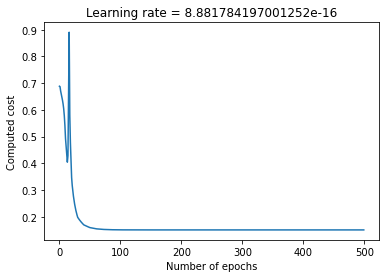

Accuracy
Accuracy: 0.9370629370629371
Cost/error after epoch 0: 0.698738
Cost/error after epoch 10: 0.683497
Cost/error after epoch 20: 0.583601
Cost/error after epoch 30: 0.479989
Cost/error after epoch 40: 0.399690
Cost/error after epoch 50: 0.356150
Cost/error after epoch 60: 0.334852
Cost/error after epoch 70: 0.324488
Cost/error after epoch 80: 0.319399
Cost/error after epoch 90: 0.316881
Cost/error after epoch 100: 0.315630
Cost/error after epoch 110: 0.315005
Cost/error after epoch 120: 0.314694
Cost/error after epoch 130: 0.314538
Cost/error after epoch 140: 0.314460
Cost/error after epoch 150: 0.314421
Cost/error after epoch 160: 0.314402
Cost/error after epoch 170: 0.314392
Cost/error after epoch 180: 0.314387
Cost/error after epoch 190: 0.314385
Cost/error after epoch 200: 0.314383
Cost/error after epoch 210: 0.314383
Cost/error after epoch 220: 0.314383
Cost/error after epoch 230: 0.314382
Cost/error after epoch 240: 0.314382
Cost/error after epoch 250: 0.314382
Cost/error 

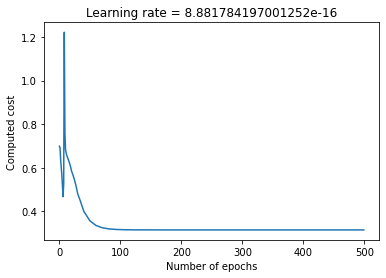

Accuracy
Accuracy: 0.916083916083916
Cost/error after epoch 0: 0.695876
Cost/error after epoch 10: 0.455128
Cost/error after epoch 20: 0.490299
Cost/error after epoch 30: 0.194129
Cost/error after epoch 40: 0.170707
Cost/error after epoch 50: 0.161363
Cost/error after epoch 60: 0.157159
Cost/error after epoch 70: 0.155160
Cost/error after epoch 80: 0.154184
Cost/error after epoch 90: 0.153702
Cost/error after epoch 100: 0.153462
Cost/error after epoch 110: 0.153343
Cost/error after epoch 120: 0.153283
Cost/error after epoch 130: 0.153254
Cost/error after epoch 140: 0.153239
Cost/error after epoch 150: 0.153231
Cost/error after epoch 160: 0.153227
Cost/error after epoch 170: 0.153226
Cost/error after epoch 180: 0.153225
Cost/error after epoch 190: 0.153224
Cost/error after epoch 200: 0.153224
Cost/error after epoch 210: 0.153224
Cost/error after epoch 220: 0.153224
Cost/error after epoch 230: 0.153224
Cost/error after epoch 240: 0.153224
Cost/error after epoch 250: 0.153224
Cost/error a

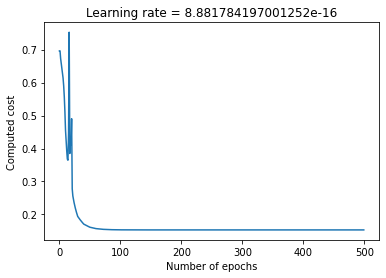

Accuracy
Accuracy: 0.9440559440559441
Cost/error after epoch 0: 0.698012
Cost/error after epoch 10: 0.896767
Cost/error after epoch 20: 0.593874
Cost/error after epoch 30: 0.167875
Cost/error after epoch 40: 0.149412
Cost/error after epoch 50: 0.142145
Cost/error after epoch 60: 0.138807
Cost/error after epoch 70: 0.137207
Cost/error after epoch 80: 0.136422
Cost/error after epoch 90: 0.136034
Cost/error after epoch 100: 0.135841
Cost/error after epoch 110: 0.135745
Cost/error after epoch 120: 0.135697
Cost/error after epoch 130: 0.135673
Cost/error after epoch 140: 0.135661
Cost/error after epoch 150: 0.135655
Cost/error after epoch 160: 0.135652
Cost/error after epoch 170: 0.135650
Cost/error after epoch 180: 0.135649
Cost/error after epoch 190: 0.135649
Cost/error after epoch 200: 0.135649
Cost/error after epoch 210: 0.135649
Cost/error after epoch 220: 0.135649
Cost/error after epoch 230: 0.135649
Cost/error after epoch 240: 0.135649
Cost/error after epoch 250: 0.135649
Cost/error 

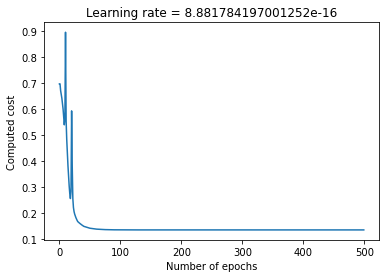

Accuracy
Accuracy: 0.9300699300699301
Cost/error after epoch 0: 0.690191
Cost/error after epoch 10: 0.505304
Cost/error after epoch 20: 0.256257
Cost/error after epoch 30: 0.168986
Cost/error after epoch 40: 0.151579
Cost/error after epoch 50: 0.144775
Cost/error after epoch 60: 0.141691
Cost/error after epoch 70: 0.140221
Cost/error after epoch 80: 0.139503
Cost/error after epoch 90: 0.139147
Cost/error after epoch 100: 0.138970
Cost/error after epoch 110: 0.138882
Cost/error after epoch 120: 0.138838
Cost/error after epoch 130: 0.138816
Cost/error after epoch 140: 0.138805
Cost/error after epoch 150: 0.138800
Cost/error after epoch 160: 0.138797
Cost/error after epoch 170: 0.138796
Cost/error after epoch 180: 0.138795
Cost/error after epoch 190: 0.138794
Cost/error after epoch 200: 0.138794
Cost/error after epoch 210: 0.138794
Cost/error after epoch 220: 0.138794
Cost/error after epoch 230: 0.138794
Cost/error after epoch 240: 0.138794
Cost/error after epoch 250: 0.138794
Cost/error 

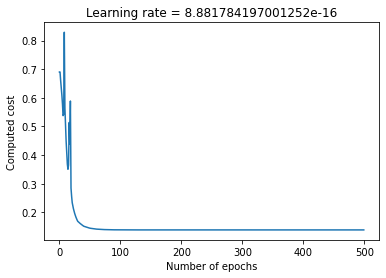

Accuracy
Accuracy: 0.9300699300699301
Cost/error after epoch 0: 0.692833
Cost/error after epoch 10: 0.437011
Cost/error after epoch 20: 0.268523
Cost/error after epoch 30: 0.157261
Cost/error after epoch 40: 0.140311
Cost/error after epoch 50: 0.133708
Cost/error after epoch 60: 0.130727
Cost/error after epoch 70: 0.129306
Cost/error after epoch 80: 0.128611
Cost/error after epoch 90: 0.128268
Cost/error after epoch 100: 0.128097
Cost/error after epoch 110: 0.128012
Cost/error after epoch 120: 0.127969
Cost/error after epoch 130: 0.127948
Cost/error after epoch 140: 0.127937
Cost/error after epoch 150: 0.127932
Cost/error after epoch 160: 0.127929
Cost/error after epoch 170: 0.127928
Cost/error after epoch 180: 0.127927
Cost/error after epoch 190: 0.127927
Cost/error after epoch 200: 0.127927
Cost/error after epoch 210: 0.127927
Cost/error after epoch 220: 0.127927
Cost/error after epoch 230: 0.127927
Cost/error after epoch 240: 0.127927
Cost/error after epoch 250: 0.127927
Cost/error 

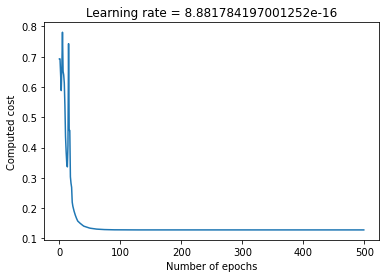

Accuracy
Accuracy: 0.9300699300699301
Cost/error after epoch 0: 0.693939
Cost/error after epoch 10: 0.558586
Cost/error after epoch 20: 0.246571
Cost/error after epoch 30: 0.177444
Cost/error after epoch 40: 0.157009
Cost/error after epoch 50: 0.148539
Cost/error after epoch 60: 0.144628
Cost/error after epoch 70: 0.142757
Cost/error after epoch 80: 0.141843
Cost/error after epoch 90: 0.141390
Cost/error after epoch 100: 0.141165
Cost/error after epoch 110: 0.141053
Cost/error after epoch 120: 0.140997
Cost/error after epoch 130: 0.140969
Cost/error after epoch 140: 0.140955
Cost/error after epoch 150: 0.140948
Cost/error after epoch 160: 0.140944
Cost/error after epoch 170: 0.140942
Cost/error after epoch 180: 0.140942
Cost/error after epoch 190: 0.140941
Cost/error after epoch 200: 0.140941
Cost/error after epoch 210: 0.140941
Cost/error after epoch 220: 0.140941
Cost/error after epoch 230: 0.140941
Cost/error after epoch 240: 0.140941
Cost/error after epoch 250: 0.140941
Cost/error 

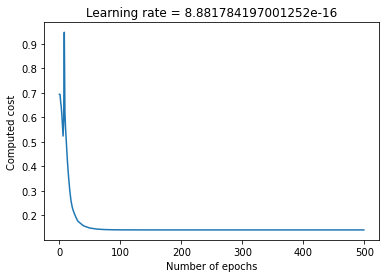

Accuracy
Accuracy: 0.9300699300699301
Cost/error after epoch 0: 0.694449
Cost/error after epoch 10: 0.662384
Cost/error after epoch 20: 0.278346
Cost/error after epoch 30: 0.186783
Cost/error after epoch 40: 0.165043
Cost/error after epoch 50: 0.156242
Cost/error after epoch 60: 0.152247
Cost/error after epoch 70: 0.150342
Cost/error after epoch 80: 0.149411
Cost/error after epoch 90: 0.148949
Cost/error after epoch 100: 0.148719
Cost/error after epoch 110: 0.148605
Cost/error after epoch 120: 0.148548
Cost/error after epoch 130: 0.148519
Cost/error after epoch 140: 0.148505
Cost/error after epoch 150: 0.148498
Cost/error after epoch 160: 0.148494
Cost/error after epoch 170: 0.148493
Cost/error after epoch 180: 0.148492
Cost/error after epoch 190: 0.148491
Cost/error after epoch 200: 0.148491
Cost/error after epoch 210: 0.148491
Cost/error after epoch 220: 0.148491
Cost/error after epoch 230: 0.148491
Cost/error after epoch 240: 0.148491
Cost/error after epoch 250: 0.148491
Cost/error 

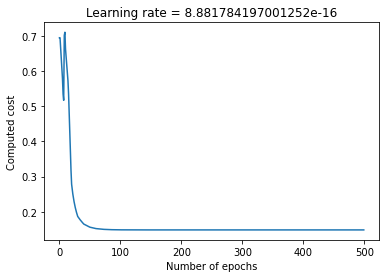

Accuracy
Accuracy: 0.9300699300699301
Cost/error after epoch 0: 0.686450
Cost/error after epoch 10: 0.629131
Cost/error after epoch 20: 0.250474
Cost/error after epoch 30: 0.175090
Cost/error after epoch 40: 0.153582
Cost/error after epoch 50: 0.145119
Cost/error after epoch 60: 0.141320
Cost/error after epoch 70: 0.139518
Cost/error after epoch 80: 0.138639
Cost/error after epoch 90: 0.138205
Cost/error after epoch 100: 0.137989
Cost/error after epoch 110: 0.137881
Cost/error after epoch 120: 0.137828
Cost/error after epoch 130: 0.137801
Cost/error after epoch 140: 0.137787
Cost/error after epoch 150: 0.137781
Cost/error after epoch 160: 0.137777
Cost/error after epoch 170: 0.137776
Cost/error after epoch 180: 0.137775
Cost/error after epoch 190: 0.137774
Cost/error after epoch 200: 0.137774
Cost/error after epoch 210: 0.137774
Cost/error after epoch 220: 0.137774
Cost/error after epoch 230: 0.137774
Cost/error after epoch 240: 0.137774
Cost/error after epoch 250: 0.137774
Cost/error 

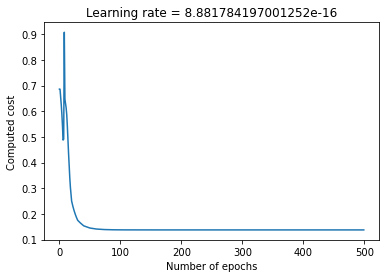

Accuracy
Accuracy: 0.9300699300699301
Cost/error after epoch 0: 0.698715
Cost/error after epoch 10: 0.376615
Cost/error after epoch 20: 0.325788
Cost/error after epoch 30: 0.181871
Cost/error after epoch 40: 0.162457
Cost/error after epoch 50: 0.154325
Cost/error after epoch 60: 0.150578
Cost/error after epoch 70: 0.148784
Cost/error after epoch 80: 0.147909
Cost/error after epoch 90: 0.147474
Cost/error after epoch 100: 0.147257
Cost/error after epoch 110: 0.147149
Cost/error after epoch 120: 0.147095
Cost/error after epoch 130: 0.147068
Cost/error after epoch 140: 0.147054
Cost/error after epoch 150: 0.147048
Cost/error after epoch 160: 0.147044
Cost/error after epoch 170: 0.147043
Cost/error after epoch 180: 0.147042
Cost/error after epoch 190: 0.147041
Cost/error after epoch 200: 0.147041
Cost/error after epoch 210: 0.147041
Cost/error after epoch 220: 0.147041
Cost/error after epoch 230: 0.147041
Cost/error after epoch 240: 0.147041
Cost/error after epoch 250: 0.147041
Cost/error 

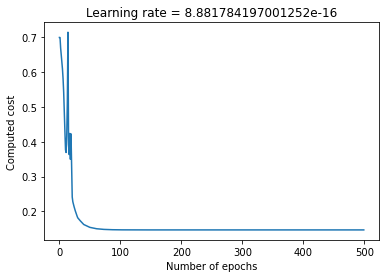

Accuracy
Accuracy: 0.9370629370629371


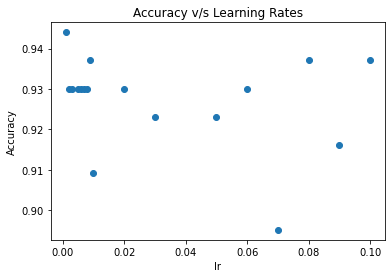

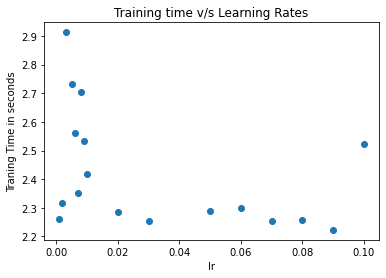

In [38]:
# Reporting Accuracy v/s Learning Rates, and Training time v/s Learning Rates using the follwing hyperparameters
lrs = [1e-1,1e-2,2e-2,3e-2,5e-2,6e-2,7e-2,8e-2,9e-2,1e-3,2e-3,3e-3,5e-3,6e-3,7e-3,8e-3,9e-3]
accs = []
times  = []
for lr1 in lrs:
    parameters = ann(X_train.T, y_train.T, [30,21,25,30,1], lr1, "y", 426, 500, "c", ["relu","relu","relu","sigmoid"], "b")
    print("Accuracy")
    predictions, acc = predict(X_test.T, y_test.T, parameters[0], parameters[2])
    accs.append(acc)
    times.append(parameters[6])
        
plt.scatter(lrs, accs)
plt.ylabel('Accuracy')
plt.xlabel('lr')
plt.title("Accuracy v/s Learning Rates")
plt.show()

plt.scatter(lrs, times)
plt.ylabel('Traning Time in seconds')
plt.xlabel('lr')
plt.title("Training time v/s Learning Rates")
plt.show()


Cost/error after epoch 0: 0.693075
Cost/error after epoch 10: 1.999049
Cost/error after epoch 20: 0.450881
Cost/error after epoch 30: 0.243746
Cost/error after epoch 40: 0.190398
Cost/error after epoch 50: 0.174295
Cost/error after epoch 60: 0.167552
Cost/error after epoch 70: 0.164449
Cost/error after epoch 80: 0.162975
Cost/error after epoch 90: 0.162241
Cost/error after epoch 100: 0.161878
Cost/error after epoch 110: 0.161698
Cost/error after epoch 120: 0.161609
Cost/error after epoch 130: 0.161564
Cost/error after epoch 140: 0.161542
Cost/error after epoch 150: 0.161531
Cost/error after epoch 160: 0.161525
Cost/error after epoch 170: 0.161522
Cost/error after epoch 180: 0.161521
Cost/error after epoch 190: 0.161520
Cost/error after epoch 200: 0.161520
Cost/error after epoch 210: 0.161520
Cost/error after epoch 220: 0.161520
Cost/error after epoch 230: 0.161520
Cost/error after epoch 240: 0.161519
Cost/error after epoch 250: 0.161519
Cost/error after epoch 260: 0.161519
Cost/error a

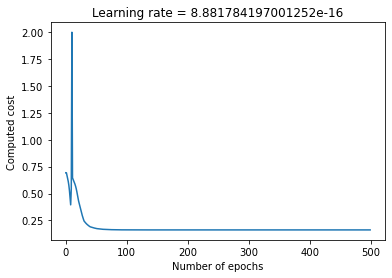

Accuracy
Accuracy: 0.9300699300699301
Cost/error after epoch 0: 0.692820
Cost/error after epoch 10: 0.553807
Cost/error after epoch 20: 0.395415
Cost/error after epoch 30: 0.192179
Cost/error after epoch 40: 0.161438
Cost/error after epoch 50: 0.150862
Cost/error after epoch 60: 0.146315
Cost/error after epoch 70: 0.144195
Cost/error after epoch 80: 0.143171
Cost/error after epoch 90: 0.142667
Cost/error after epoch 100: 0.142417
Cost/error after epoch 110: 0.142292
Cost/error after epoch 120: 0.142230
Cost/error after epoch 130: 0.142199
Cost/error after epoch 140: 0.142184
Cost/error after epoch 150: 0.142176
Cost/error after epoch 160: 0.142172
Cost/error after epoch 170: 0.142170
Cost/error after epoch 180: 0.142169
Cost/error after epoch 190: 0.142169
Cost/error after epoch 200: 0.142169
Cost/error after epoch 210: 0.142169
Cost/error after epoch 220: 0.142168
Cost/error after epoch 230: 0.142168
Cost/error after epoch 240: 0.142168
Cost/error after epoch 250: 0.142168
Cost/error 

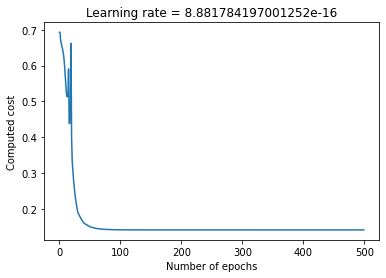

Accuracy
Accuracy: 0.9300699300699301
Cost/error after epoch 0: 0.693672
Cost/error after epoch 10: 0.555453
Cost/error after epoch 20: 0.226266
Cost/error after epoch 30: 0.161964
Cost/error after epoch 40: 0.143934
Cost/error after epoch 50: 0.136744
Cost/error after epoch 60: 0.133479
Cost/error after epoch 70: 0.131927
Cost/error after epoch 80: 0.131168
Cost/error after epoch 90: 0.130793
Cost/error after epoch 100: 0.130607
Cost/error after epoch 110: 0.130513
Cost/error after epoch 120: 0.130467
Cost/error after epoch 130: 0.130444
Cost/error after epoch 140: 0.130432
Cost/error after epoch 150: 0.130426
Cost/error after epoch 160: 0.130423
Cost/error after epoch 170: 0.130422
Cost/error after epoch 180: 0.130421
Cost/error after epoch 190: 0.130421
Cost/error after epoch 200: 0.130421
Cost/error after epoch 210: 0.130421
Cost/error after epoch 220: 0.130421
Cost/error after epoch 230: 0.130421
Cost/error after epoch 240: 0.130421
Cost/error after epoch 250: 0.130421
Cost/error 

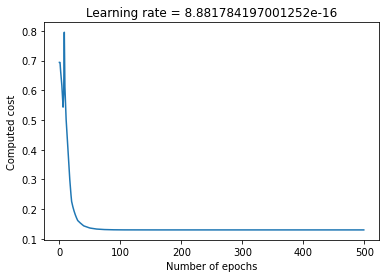

Accuracy
Accuracy: 0.916083916083916
Cost/error after epoch 0: 0.695124
Cost/error after epoch 10: 0.709020
Cost/error after epoch 20: 0.643636
Cost/error after epoch 30: 0.583058
Cost/error after epoch 40: 0.525679
Cost/error after epoch 50: 0.493204
Cost/error after epoch 60: 0.476450
Cost/error after epoch 70: 0.468085
Cost/error after epoch 80: 0.463933
Cost/error after epoch 90: 0.461860
Cost/error after epoch 100: 0.460823
Cost/error after epoch 110: 0.460304
Cost/error after epoch 120: 0.460045
Cost/error after epoch 130: 0.459915
Cost/error after epoch 140: 0.459850
Cost/error after epoch 150: 0.459818
Cost/error after epoch 160: 0.459802
Cost/error after epoch 170: 0.459794
Cost/error after epoch 180: 0.459790
Cost/error after epoch 190: 0.459788
Cost/error after epoch 200: 0.459787
Cost/error after epoch 210: 0.459786
Cost/error after epoch 220: 0.459786
Cost/error after epoch 230: 0.459786
Cost/error after epoch 240: 0.459786
Cost/error after epoch 250: 0.459786
Cost/error a

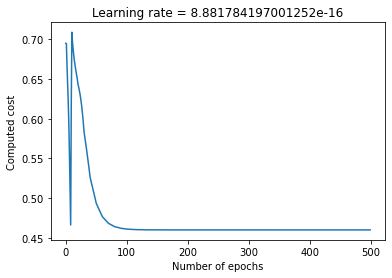

Accuracy
Accuracy: 0.6783216783216783
Cost/error after epoch 0: 0.687024
Cost/error after epoch 10: 0.727014
Cost/error after epoch 20: 0.563578
Cost/error after epoch 30: 0.439752
Cost/error after epoch 40: 0.350497
Cost/error after epoch 50: 0.306834
Cost/error after epoch 60: 0.286255
Cost/error after epoch 70: 0.276420
Cost/error after epoch 80: 0.271702
Cost/error after epoch 90: 0.269393
Cost/error after epoch 100: 0.268256
Cost/error after epoch 110: 0.267689
Cost/error after epoch 120: 0.267405
Cost/error after epoch 130: 0.267263
Cost/error after epoch 140: 0.267192
Cost/error after epoch 150: 0.267157
Cost/error after epoch 160: 0.267139
Cost/error after epoch 170: 0.267130
Cost/error after epoch 180: 0.267126
Cost/error after epoch 190: 0.267124
Cost/error after epoch 200: 0.267123
Cost/error after epoch 210: 0.267122
Cost/error after epoch 220: 0.267122
Cost/error after epoch 230: 0.267122
Cost/error after epoch 240: 0.267122
Cost/error after epoch 250: 0.267121
Cost/error 

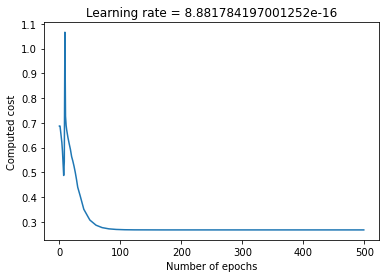

Accuracy
Accuracy: 0.9300699300699301
Cost/error after epoch 0: 0.701748
Cost/error after epoch 10: 0.453545
Cost/error after epoch 20: 0.345048
Cost/error after epoch 30: 0.191978
Cost/error after epoch 40: 0.167238
Cost/error after epoch 50: 0.157873
Cost/error after epoch 60: 0.153714
Cost/error after epoch 70: 0.151747
Cost/error after epoch 80: 0.150788
Cost/error after epoch 90: 0.150316
Cost/error after epoch 100: 0.150081
Cost/error after epoch 110: 0.149963
Cost/error after epoch 120: 0.149905
Cost/error after epoch 130: 0.149876
Cost/error after epoch 140: 0.149861
Cost/error after epoch 150: 0.149854
Cost/error after epoch 160: 0.149850
Cost/error after epoch 170: 0.149848
Cost/error after epoch 180: 0.149847
Cost/error after epoch 190: 0.149847
Cost/error after epoch 200: 0.149847
Cost/error after epoch 210: 0.149847
Cost/error after epoch 220: 0.149847
Cost/error after epoch 230: 0.149846
Cost/error after epoch 240: 0.149846
Cost/error after epoch 250: 0.149846
Cost/error 

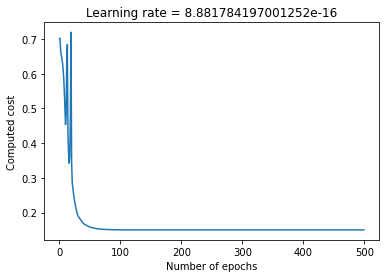

Accuracy
Accuracy: 0.909090909090909
Cost/error after epoch 0: 0.688555
Cost/error after epoch 10: 1.092373
Cost/error after epoch 20: 0.538023
Cost/error after epoch 30: 0.349148
Cost/error after epoch 40: 0.262290
Cost/error after epoch 50: 0.231736
Cost/error after epoch 60: 0.219317
Cost/error after epoch 70: 0.213728
Cost/error after epoch 80: 0.211070
Cost/error after epoch 90: 0.209775
Cost/error after epoch 100: 0.209136
Cost/error after epoch 110: 0.208818
Cost/error after epoch 120: 0.208659
Cost/error after epoch 130: 0.208580
Cost/error after epoch 140: 0.208541
Cost/error after epoch 150: 0.208521
Cost/error after epoch 160: 0.208511
Cost/error after epoch 170: 0.208506
Cost/error after epoch 180: 0.208504
Cost/error after epoch 190: 0.208503
Cost/error after epoch 200: 0.208502
Cost/error after epoch 210: 0.208502
Cost/error after epoch 220: 0.208501
Cost/error after epoch 230: 0.208501
Cost/error after epoch 240: 0.208501
Cost/error after epoch 250: 0.208501
Cost/error a

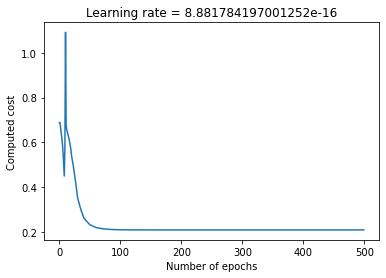

Accuracy
Accuracy: 0.9300699300699301
Cost/error after epoch 0: 0.699569
Cost/error after epoch 10: 0.405314
Cost/error after epoch 20: 0.643522
Cost/error after epoch 30: 0.191076
Cost/error after epoch 40: 0.168997
Cost/error after epoch 50: 0.159803
Cost/error after epoch 60: 0.155609
Cost/error after epoch 70: 0.153603
Cost/error after epoch 80: 0.152623
Cost/error after epoch 90: 0.152137
Cost/error after epoch 100: 0.151896
Cost/error after epoch 110: 0.151775
Cost/error after epoch 120: 0.151715
Cost/error after epoch 130: 0.151685
Cost/error after epoch 140: 0.151670
Cost/error after epoch 150: 0.151662
Cost/error after epoch 160: 0.151658
Cost/error after epoch 170: 0.151656
Cost/error after epoch 180: 0.151656
Cost/error after epoch 190: 0.151655
Cost/error after epoch 200: 0.151655
Cost/error after epoch 210: 0.151655
Cost/error after epoch 220: 0.151655
Cost/error after epoch 230: 0.151655
Cost/error after epoch 240: 0.151655
Cost/error after epoch 250: 0.151655
Cost/error 

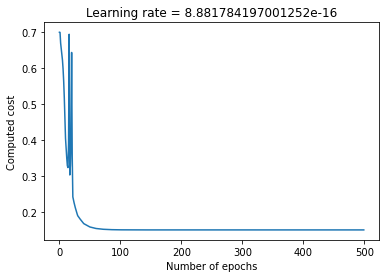

Accuracy
Accuracy: 0.9090909090909091
Cost/error after epoch 0: 0.704029
Cost/error after epoch 10: 0.651203
Cost/error after epoch 20: 0.476855
Cost/error after epoch 30: 0.256380
Cost/error after epoch 40: 0.203644
Cost/error after epoch 50: 0.186403
Cost/error after epoch 60: 0.179227
Cost/error after epoch 70: 0.175923
Cost/error after epoch 80: 0.174339
Cost/error after epoch 90: 0.173562
Cost/error after epoch 100: 0.173177
Cost/error after epoch 110: 0.172986
Cost/error after epoch 120: 0.172891
Cost/error after epoch 130: 0.172843
Cost/error after epoch 140: 0.172819
Cost/error after epoch 150: 0.172807
Cost/error after epoch 160: 0.172801
Cost/error after epoch 170: 0.172798
Cost/error after epoch 180: 0.172797
Cost/error after epoch 190: 0.172796
Cost/error after epoch 200: 0.172796
Cost/error after epoch 210: 0.172795
Cost/error after epoch 220: 0.172795
Cost/error after epoch 230: 0.172795
Cost/error after epoch 240: 0.172795
Cost/error after epoch 250: 0.172795
Cost/error 

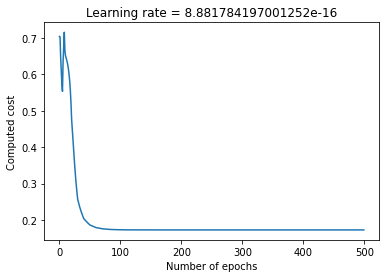

Accuracy
Accuracy: 0.9300699300699301
Cost/error after epoch 0: 0.686927
Cost/error after epoch 10: 0.638929
Cost/error after epoch 20: 0.496744
Cost/error after epoch 30: 0.316275
Cost/error after epoch 40: 0.232756
Cost/error after epoch 50: 0.202650
Cost/error after epoch 60: 0.190473
Cost/error after epoch 70: 0.185010
Cost/error after epoch 80: 0.182422
Cost/error after epoch 90: 0.181161
Cost/error after epoch 100: 0.180539
Cost/error after epoch 110: 0.180229
Cost/error after epoch 120: 0.180075
Cost/error after epoch 130: 0.179998
Cost/error after epoch 140: 0.179960
Cost/error after epoch 150: 0.179941
Cost/error after epoch 160: 0.179931
Cost/error after epoch 170: 0.179926
Cost/error after epoch 180: 0.179924
Cost/error after epoch 190: 0.179923
Cost/error after epoch 200: 0.179922
Cost/error after epoch 210: 0.179922
Cost/error after epoch 220: 0.179922
Cost/error after epoch 230: 0.179922
Cost/error after epoch 240: 0.179922
Cost/error after epoch 250: 0.179922
Cost/error 

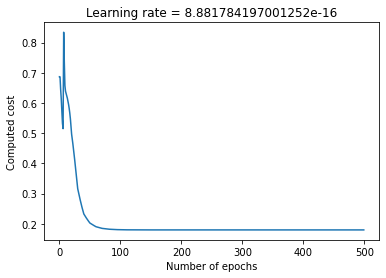

Accuracy
Accuracy: 0.9230769230769231
Cost/error after epoch 0: 0.690661
Cost/error after epoch 10: 0.599607
Cost/error after epoch 20: 0.708428
Cost/error after epoch 30: 0.192139
Cost/error after epoch 40: 0.161873
Cost/error after epoch 50: 0.151789
Cost/error after epoch 60: 0.147518
Cost/error after epoch 70: 0.145537
Cost/error after epoch 80: 0.144583
Cost/error after epoch 90: 0.144114
Cost/error after epoch 100: 0.143882
Cost/error after epoch 110: 0.143766
Cost/error after epoch 120: 0.143708
Cost/error after epoch 130: 0.143680
Cost/error after epoch 140: 0.143665
Cost/error after epoch 150: 0.143658
Cost/error after epoch 160: 0.143654
Cost/error after epoch 170: 0.143653
Cost/error after epoch 180: 0.143652
Cost/error after epoch 190: 0.143651
Cost/error after epoch 200: 0.143651
Cost/error after epoch 210: 0.143651
Cost/error after epoch 220: 0.143651
Cost/error after epoch 230: 0.143651
Cost/error after epoch 240: 0.143651
Cost/error after epoch 250: 0.143651
Cost/error 

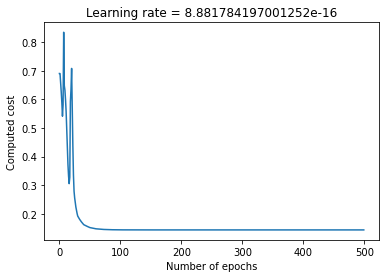

Accuracy
Accuracy: 0.9300699300699301
Cost/error after epoch 0: 0.697409
Cost/error after epoch 10: 0.369400
Cost/error after epoch 20: 0.226163
Cost/error after epoch 30: 0.150143
Cost/error after epoch 40: 0.132390
Cost/error after epoch 50: 0.125519
Cost/error after epoch 60: 0.122405
Cost/error after epoch 70: 0.120933
Cost/error after epoch 80: 0.120215
Cost/error after epoch 90: 0.119861
Cost/error after epoch 100: 0.119685
Cost/error after epoch 110: 0.119597
Cost/error after epoch 120: 0.119554
Cost/error after epoch 130: 0.119532
Cost/error after epoch 140: 0.119521
Cost/error after epoch 150: 0.119515
Cost/error after epoch 160: 0.119513
Cost/error after epoch 170: 0.119511
Cost/error after epoch 180: 0.119511
Cost/error after epoch 190: 0.119510
Cost/error after epoch 200: 0.119510
Cost/error after epoch 210: 0.119510
Cost/error after epoch 220: 0.119510
Cost/error after epoch 230: 0.119510
Cost/error after epoch 240: 0.119510
Cost/error after epoch 250: 0.119510
Cost/error 

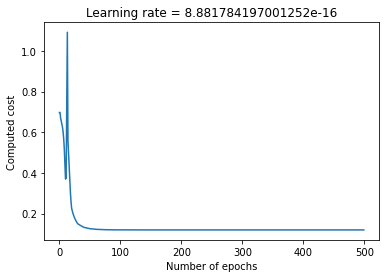

Accuracy
Accuracy: 0.9300699300699301


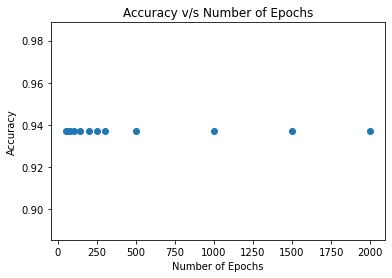

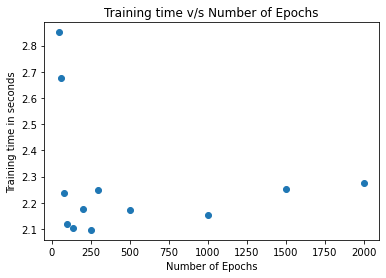

In [39]:
# Reporting Accuracy v/s Number of Epochs, and Training time v/s Number of Epochs using the follwing hyperparameters
epoch = [50,60,80,100,140,200,250,300,500,1000,1500,2000]
accs = []
times  = []
for epochs in epoch:
    parameters = ann(X_train.T, y_train.T, [30,21,25,30,1], lr1, "y", 426, 500, "c", ["relu","relu","relu","sigmoid"], "b")
    print("Accuracy")
    predictions = predict(X_test.T, y_test.T, parameters[0], parameters[2])
    accs.append(acc)
    times.append(parameters[6])
        
plt.scatter(epoch, accs)
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.title("Accuracy v/s Number of Epochs")
plt.show()

plt.scatter(epoch, times)
plt.ylabel('Training time in seconds')
plt.xlabel('Number of Epochs')
plt.title("Training time v/s Number of Epochs")
plt.show()